In [1]:
import re
import networkx as nx
import matplotlib.pyplot as plt

import tkinter
import customtkinter

## Variáveis fixas

In [2]:
database = {
    "usuario": ["idusuario", "nome", "logradouro", "número", "bairro", "cep", "uf", "datanascimento"],
    "contas": ["idconta", "descricao", "tipoconta_idtipoconta", "usuario_idusuario", "saldoinicial"],
    "movimentacao": ["idmovimentacao", "datamovimentacao", "descricao", "tipomovimento_idtipomovimento", "categoria_idcategoria", "contas_idconta", "valor"],
    "tipoconta": ["idtipoconta", "descrição"],
    "tipomovimento": ["idtipomovimento", "descmovimentacao"],
    "categoria": ["idcategoria", "desccategoria"]
}

operators = ['=', '>', '<', '<=', '>=', '<>', 'and', 'in', 'not In', '(', ')']
operatorsBasics = ['=', '>', '<', '<=', '>=', '<>', 'in', 'not in']

commands = ['sigma', 'pi', '|x|']

In [3]:
def clean_text(text):
    return " ".join(text.split()).strip().lower()

## Exemplos

In [4]:
#text = "select Nome, DataNascimento from usuario join contas on usuario.idUsuario = contas.Usuario_idUsuario where uf = 'ce' and saldoInicial = 200"
#text = "select * from usuario join contas on usuario.idUsuario = contas.Usuario_idUsuario where uf = 'ce' and saldoInicial = 200"
#text = "select Nome, DataNascimento from usuario join contas on usuario.idUsuario = contas.Usuario_idUsuario"
#text = "select * from usuario join contas on usuario.idUsuario = contas.Usuario_idUsuario"
#text = "select * from usuario join contas on usuario.idUsuario = contas.Usuario_idUsuario join tipoconta on tipoconta.idTipoConta = contas.TipoConta_idTipoConta"
#text = "select * from usuario join contas on usuario.idUsuario = contas.Usuario_idUsuario join tipoconta on tipoconta.idTipoConta = contas.TipoConta_idTipoConta join Movimentacao on movimentacao.contas_idconta = contas.idconta"
#text = "select * from usuario join contas on usuario.idUsuario = contas.Usuario_idUsuario where uf = 'ce' and saldoInicial = 200"
#text = "select * from usuario join contas on usuario.idUsuario = contas.Usuario_idUsuario join tipoconta on tipoconta.idTipoConta = contas.TipoConta_idTipoConta where uf = 'ce' and saldoInicial = 200"
#text = "select * from usuario join contas on usuario.idUsuario = contas.Usuario_idUsuario join tipoconta on tipoconta.idTipoConta = contas.TipoConta_idTipoConta join Movimentacao on movimentacao.contas_idconta = contas.idconta where uf = 'ce' and saldoInicial = 200"


#text = "select * from usuario where uf = 'ce' and saldoInicial = 200"
#text = "select Nome, DataNascimento from usuario where uf = 'ce' and saldoInicial = 200"
#text = "select idusuario, nome, datanascimento, descricao, saldoinicial, UF, Descrição from usuario join contas on usuario.idUsuario = contas.Usuario_idUsuario join tipoconta on tipoconta.idTipoConta = contas.TipoConta_idTipoConta join Movimentacao on movimentacao.contas_idconta = contas.idconta where saldoinicial < 3000 and uf = 'ce' and Descrição <> 'Conta Corrente' and idusuario > 3;"
text = "select idusuario, nome, datanascimento, descricao, saldoinicial, UF, Descrição from usuario join contas on usuario.idUsuario = contas.Usuario_idUsuario join tipoconta on tipoconta.idTipoConta = contas.TipoConta_idTipoConta"


## Exemplos para apresentação

In [5]:
## CERTOS
teste1 = "select * from usuario where uf = 'ce'"
teste2 = "select * from usuario join contas on usuario.idusuario = contas.usuario_idusuario"
teste3 = "select saldoinicial, usuario.nome, contas.idconta, bairro from usuario join contas on usuario.idusuario = contas.usuario_idusuario;"
teste4 = "select Número, logradouro from usuario join contas on idUsuario = Usuario_idUsuario where usuario.uf = 'ce' and contas.saldoInicial = 200"
teste5 = "select * from usuario join contas on usuario.idUsuario = contas.Usuario_idUsuario where usuario.uf = 'ce' and contas.saldoInicial = 200"
teste6 = "select * from usuario join contas on usuario.idUsuario = contas.Usuario_idUsuario join tipoconta on tipoconta.idTipoConta = contas.TipoConta_idTipoConta join Movimentacao on movimentacao.contas_idconta = contas.idconta where uf = 'ce' and saldoInicial = 200"
teste7 = "select Usuario.nome, datanascimento, descricao from usuario join contas on usuario.idUsuario = contas.Usuario_idUsuario where uf in ('ce','al','ba') and nome not in ('alex','jorge') and contas.saldoinicial = 10000"
teste8 = "select * from tipomovimento where idtipomovimento not in (1,2,3,4,5)"
## certos prof
teste9 = "Select nome, datanascimento, descricao, saldoinicial from usuario join contas on usuario.idUsuario = contas.Usuario_idUsuario where saldoinicial >= 235 and uf ='ce' and cep <> '62930000'"
teste10 = "Select idusuario, nome, datanascimento, descricao, saldoinicial, UF, Descrição from usuario join contas on usuario.idUsuario = contas.Usuario_idUsuario join tipoconta on tipoconta.idTipoConta = contas.TipoConta_idTipoConta where saldoinicial < 3000 and uf = 'ce' and Descrição <> 'Conta Corrente' and idusuario > 3"
## ---------
teste11 = "select idconta, idusuario from usuario join contas on idUsuario = Usuario_idUsuario where usuario.uf = 'ce' and contas.saldoInicial = 200"
teste12 = "select Datamovimentacao, valor, nome, logradouro from usuario join contas on usuario.idUsuario = contas.Usuario_idUsuario join tipoconta on tipoconta.idTipoConta = contas.TipoConta_idTipoConta join Movimentacao on contas_idconta = contas.idconta where uf = 'ce' and saldoInicial = 200 and movimentacao.datamovimentacao <> '2000'"
teste13 = "select Usuario.nome, datanascimento, descricao from usuario join contas on usuario.idUsuario = contas.Usuario_idUsuario where uf in ('ce', 'al', 'ba') and nome not in ('alex', 'jorge') and saldoinicial = 10000"
teste14 = "select nome, datanascimento, descricao, saldoinicial from usuario join contas on usuario.idUsuario = contas.Usuario_idUsuario where saldoinicial >= 235 and uf ='ce' and cep <> '62930000' and nome in ('alex', 'joelma') and saldoinicial not in (250, 270)"

# ERRADOS
testeErrado1 = "select * from tiipomovimento"
testeErrado2 = "select Tipomovimento.idtipomovimento, contas.descmovimentacao from tipomovimento"
testeErrado3 = "select as from usuario where uf = 'ce'"
testeErrado4 = "select from usuario join contas on idUsuario = Usuario_idUsuario where usuario.uf = 'ce' and contas.saldoInicial = 200"
testeErrado5 = "select * from usuario joiin contas on usuario.idUsuario = contas.Usuario_idUsuario where usuario.uf = 'ce' and contas.saldoInicial = 200"
testeErrado6 = "select * from usuario join contaas on usuario.idUsuario = contas.Usuario_idUsuario join tipoconta on tipoconta.idTipoConta = contas.TipoConta_idTipoConta join Movimentacao on movimentacao.contas_idconta = contas.idconta where uf = 'ce' and saldoInicial = 200"
testeErrado7 = "select Usuario.nome, datanascimento, descricao from usuario join contas on usuario.idUsuario = contas.Usuario_idUsuario wheree contas.saldoinicial = 10000"
## errados de acordo com exemplo do prof
testeErrado9 = "Select nome, datanascimento, descricao, saldoinicial, sassassa from usuario join contas on usuario.idUsuario = contas.Usuario_idUsuario where saldoinicial >= 235 and uf ='ce' and cep <> '62930000'"
testeErrado10 = "Select idusuario, nome, datanascimento, descricao, saldoinicial, UF, Descrição, idCategoria from usuario join contas on usuario.idUsuario = contas.Usuario_idUsuario join tipoconta on tipoconta.idTipoConta = contas.TipoConta_idTipoConta where saldoinicial < 3000 and uf = 'ce' and Descrição <> 'Conta Corrente' and idusuario > 3"
## ---------
testeErrado11 = "select idconta, idusuario from usuario join contas on idUsuario = Usuario_idUsuario where .uf = 'ce' and contas.saldoInicial = 200"
testeErrado12 = "select * from usuario wheree usuario.uf = 'ce' and contas.saldoInicial = 200"
testeErrado13 = "select * from usuario where usuario.uf = 'ce' and contas.saldoInicial = 200"
testeErrado14 = "select * from usuario where usuario.uf = 'ce' and contas.saldoInicial = 200 joiin contas on usuario.idUsuario = contas.Usuario_idUsuario"

## Parser

In [6]:
def parser(database,string):
    string = string.lower()
    todas_colecoes = []

    #selecionando o select from
    pattern_select_from = r"^\bSelect\b\s(.*?)\s\bFrom\b\s(.*?)(($|\bjoin\b|\bwhere\b)(.*?)$)"
    matches = re.findall(pattern_select_from, string, re.IGNORECASE)
    matches_select_from = matches
    
    if len(matches_select_from) == 0:
        return False
    valores_chamados = matches_select_from[0][0].strip()
    colecao_chamada = matches_select_from[0][1].strip()
    outros_valores = matches_select_from[0][2].strip()


    todas_colecoes.append(colecao_chamada)
    if not colecao_chamada in database:
        return False
    
    
    pattern_select_from = r"(?:(.*?)\bwhere\s\b(.*?))$"
    matches = re.findall(pattern_select_from, outros_valores, re.IGNORECASE)
    matches_where = matches

    

    if len(matches_where) > 0:
        leitura_join_on = matches_where[0][0]
    else:
        leitura_join_on = outros_valores

    if leitura_join_on.count("(") != leitura_join_on.count(")"):
        return False
    leitura_join_on = leitura_join_on.replace("(","")
    leitura_join_on = leitura_join_on.replace(")","")

    #checagem e tratamento do join on
    pattern_join_on = r"(?:\bjoin\b(.*?)(?:\bon\b|$)(.*?)(?=\bJoin\b|$|\bon\b))"
    matches = list(filter(lambda x: x != ("", "",""), re.findall(pattern_join_on, leitura_join_on, re.IGNORECASE)))
    matches_join_on = matches

    for i in matches_join_on:
        colecao = i[0].strip()
        if colecao not in database:
            return False
        todas_colecoes.append(colecao)
        caracteres = list(filter(bool,re.split(r'<=|>=|=|<|>|<>' ,i[1].strip())))

        for valor in caracteres:

            valor = valor.strip()
            if '.' in valor:
                
                colecao_valor = valor.split(".")

                try:

                    if not (colecao_valor[1].strip() in database[colecao_valor[0].strip()] and colecao_valor[0].strip() in todas_colecoes):

                        return False
                except:
                    return False
            
            else:
                colecao_inexistente = True
                for colecao in todas_colecoes:

                    if valor in database[colecao]:
                        colecao_inexistente = False
                
                if colecao_inexistente:
                    return False
    
    if len(matches_where) > 0:
        catacteres_where = matches_where[0][1].split("and")
        for i in catacteres_where:
            
            caracteres = list(filter(bool,re.split(r'<=|>=|=|<|>|<>|\bin\b|\bnot in\b' ,i.strip())))

            valor = caracteres[0].strip()

            if '.' in valor:
                
                colecao_valor = valor.split(".")
                
                try:

                    if not (colecao_valor[1].strip() in database[colecao_valor[0].strip()] and colecao_valor[0].strip() in todas_colecoes):

                        return False

                except:
                    return False
            
            else:
                colecao_inexistente = True
                for colecao in todas_colecoes:

                    if valor in database[colecao]:
                        colecao_inexistente = False

                if colecao_inexistente:
                    return False
                
    valores_chamados = valores_chamados.split(",")

    if len(valores_chamados) == 1 and valores_chamados[0] == "*":
        return string
    else:
        for valor in valores_chamados:
            valor = valor.strip()

            if '.' in valor:
                colecao_valor = valor.split(".")
                try:

                    if not (colecao_valor[1].strip() in database[colecao_valor[0].strip()] and colecao_valor[0].strip() in todas_colecoes):

                        return False
                except:
                    return False
            else:
                valor_inexistente = True
                for i in todas_colecoes:
                    if valor in database[i]:
                        valor_inexistente = False
                
                if valor_inexistente:
                    return False


        return string

## Transformação do SQL em Álgebra Relacional

In [7]:
def transform_alg_relac(text):
    columns = [col.strip() for col in text[text.index("select")+6:text.index("from")].split(",")]

    justTheWhere = None
    if "where" in text.lower():
        justTheWhere = text[text.lower().index("where")+5:].strip()

    table = None
    if "from" in text.lower():
        table = text[text.lower().index("from")+4:].split()[0]

    tableJoin, condition = [], []
    if "join" in text.lower():
        justTheJoin = text[text.lower().index("join")+4:].strip() # pra pular o join e pegar o restante
        #tableJoin = justTheJoin[:justTheJoin.index(" on ")].strip()

        justTheJoinSplitted = justTheJoin.split('where')[0].split()

        array_index_on = [i for i in range(0, len(justTheJoinSplitted)) if justTheJoinSplitted[i].lower() == 'on']

        for x in array_index_on:
            condition.append(f'{justTheJoinSplitted[x + 1]} {justTheJoinSplitted[x + 2]} {justTheJoinSplitted[x + 3]} {justTheJoinSplitted[x - 1]}')

        # print(condition)
    if "*" not in text:
        if justTheWhere and len(condition) > 0:
            if len(condition) <= 1:
                return f"PI {' , '.join(columns)} ( Sigma {justTheWhere} ( {table} |X| {' '.join(condition)} ) )"
                #print(f"PI {' , '.join(columns)} ( Sigma {justTheWhere} ( {table} |X| {' '.join(condition)} ) )")
            else:
                for i in range(0, len(condition) - 1):
                    condition[i] += ' )'

                #print(f"PI {' , '.join(columns)} ( Sigma {justTheWhere} ( {' ( ' * (len(condition) - 1) } {table} |X| {' |X| '.join(condition)} ) )")
                return f"PI {' , '.join(columns)} ( Sigma {justTheWhere} ( {' ( ' * (len(condition) - 1) } {table} |X| {' |X| '.join(condition)} ) )"
        elif justTheWhere:
            #print(f"PI {' , '.join(columns)} ( Sigma {justTheWhere} ( {table} ) )")
            return f"PI {' , '.join(columns)} ( Sigma {justTheWhere} ( {table} ) )"
        elif len(condition) > 0:
            if len(condition) <= 1:
                # print(f"PI {' , '.join(columns)} ( {table} |X| {' '.join(condition)} )")
                return f"PI {' , '.join(columns)} ( {table} |X| {' '.join(condition)} )"
            else:
                for i in range(0, len(condition) - 1):
                    condition[i] += ' )'

                #print(f"PI {' , '.join(columns)} ( {' ( ' * (len(condition) - 1) } {table} |X| {' |X| '.join(condition)} )")
                return f"PI {' , '.join(columns)} ( {' ( ' * (len(condition) - 1) } {table} |X| {' |X| '.join(condition)} )"
        else:
            #print(f"PI {' , '.join(columns)} ( {table} )")
            return f"PI {' , '.join(columns)} ( {table} )"
    else:
        if justTheWhere and len(condition) > 0:
            if len(condition) <= 1:
                #print(f"Sigma {justTheWhere} ( {table} |X| {' '.join(condition)} )")
                return f"Sigma {justTheWhere} ( {table} |X| {' '.join(condition)} )"
            else:
                for i in range(0, len(condition) - 1):
                    condition[i] += ' )'
                #print(f"Sigma {justTheWhere} ( {' ( ' * (len(condition) - 1) } {table} |X| {' |X| '.join(condition)} )")
                return f"Sigma {justTheWhere} ( {' ( ' * (len(condition) - 1) } {table} |X| {' |X| '.join(condition)} )"
        elif justTheWhere:
            #print(f"Sigma {justTheWhere} ( {table} )")
            return f"Sigma {justTheWhere} ( {table} )"
        elif len(condition) > 0:
            if len(condition) <= 1:
                #print(f"{table} |X| {' '.join(condition)}")
                return f"{table} |X| {' '.join(condition)}"
            else:
                for i in range(0, len(condition) - 1):
                    condition[i] += ' )'
                #print(f"{' ( ' * (len(condition) - 1) } {table} |X| {' |X| '.join(condition)}")
                return f"{' ( ' * (len(condition) - 1) } {table} |X| {' |X| '.join(condition)}"
        else:
            # print(table)
            return table

## Optimização da Álgebra Relacional

In [8]:
def optimization_alg_rel(text):
    text_lower_case = text.lower()
    
    # ----------- heuristica 1 --------------
    splited_text = text_lower_case.split()
    
    array_fields = []
    index_parentense = -1
    index_sigma = -1
                
    if 'sigma' in text_lower_case:
        index_sigma = text_lower_case.index('sigma')
        
        quant_in_and_not_in = len([i for i in splited_text if i == 'in']) ## pois o in vai pegar o do not in tb
        # print(quant_in_and_not_in)
        cont_quant_in_and_not_in = 0
        
        for i in range(index_sigma + 1, len(text_lower_case)):
            
            if text_lower_case[i].find('(') != -1 and cont_quant_in_and_not_in == quant_in_and_not_in:
                index_parentense = i
                break
                
            if text_lower_case[i].find('(') != -1:
                cont_quant_in_and_not_in += 1
                
    if index_sigma != -1:
        aux_text_lower_case = text_lower_case[index_sigma:index_parentense].replace('sigma', '')
        substring_sigma_text = re.split("and", aux_text_lower_case)
        substring_sigma_text = [sentence.strip() for sentence in substring_sigma_text]
                
        # print(substring_sigma_text)
        for substring in substring_sigma_text:
            array_fields.append(substring)
    
    dict_tables_aux = { 
        "usuario": [],
        "contas": [],
        "movimentacao": [],
        "tipoconta": [],
        "tipomovimento": [],
        "categoria": []
    }
    
    dict_sigma_in_table = {
        "usuario": False,
        "contas": False,
        "movimentacao": False,
        "tipoconta": False,
        "tipomovimento": False,
        "categoria": False
    }
    
    for sentence in array_fields:
        for table in database.keys():
            # achou = dict_field.get('field').lower() in [x.lower() for x in database.get(table)]
            
            value = sentence.split()[0].lower()
            
            value_split_dot = value.split('.') 
            
            if len(value_split_dot) >= 2:
                value = value_split_dot[1]
            
            achou = value in [x.lower() for x in database.get(table)]
            
            if achou:
                dict_tables_aux.get(table).append(sentence)   
    # print(dict_tables_aux)
    
    text_lower_case = text_lower_case.replace("sigma", '')
    text_lower_case = text_lower_case.replace('and', '')
    
    for table in dict_tables_aux.keys():
        cont = 0
        array_aux = dict_tables_aux.get(table)
                
        if len(array_aux) > 0:
            # verificação se nessa tabela tem sigma pros valores
            dict_sigma_in_table[table] = True
            
            textTransformed = 'sigma'
            
            for value_aux in array_aux:      
                
                # textBase = dict_aux.get('field') + " " + dict_aux.get('operator') + " " + dict_aux.get('value')
                textBase = value_aux

                text_lower_case = text_lower_case.replace(textBase, '')
                
                #if cont > 0:
                 #   textTransformed = textTransformed + " ( " + textBase 
                #else:
                    
                cont += 1
                
                if cont >= 2:
                    textTransformed = textTransformed + " and " + textBase 
                else:
                    textTransformed = textTransformed + " " + textBase 
                
                if cont >= len(array_aux):
                    # textTransformed += " ( " + table + " ) " + " ".join([")" for i in range(cont)])
                    textTransformed += " ( " + table + " ) "
                    
            text_lower_case = re.sub(r"(\(|\b)" + table.lower() + r"(\)|\b)(?!\.\w)", textTransformed, text_lower_case)
            # text_lower_case = text_lower_case.replace(textBase, textTransformed)

    text_lower_case = " ".join(text_lower_case.split())
    
    # ----------- heuristica 2 --------------
    
    array_fields_must_need = []
    text_lower_case = " " + text_lower_case.lower() + " " # pra dar certo quando for exemplos de usuario |X| usuario.idUsuario = contas.Usuario_idUsuario contas

    splited_text = text_lower_case.split()
    
    for i in range(0, len(splited_text) - 1):
        if splited_text[i] == 'pi':
            for j in range(i + 1, len(splited_text)): # ajeitar dps
                if splited_text[j] == '(':
                    break
                array_fields_must_need.append(splited_text[j])
            break
                
    for i in range(0, len(splited_text)):
        if splited_text[i] == '|x|':
            chave1 = splited_text[i + 1].split('.')
            chave2 = splited_text[i + 3].split('.')
            
            aux_chave1 = splited_text[i + 1]
            aux_chave2 = splited_text[i + 3]
            
            if len(chave1) > 1:
                aux_chave1 = chave1[1]
            
            if len(chave2) > 1:
                aux_chave2 = chave2[1]
            
            if not(aux_chave1 in array_fields_must_need):
                array_fields_must_need.append(aux_chave1)
                
            if not(aux_chave2 in array_fields_must_need):
                array_fields_must_need.append(aux_chave2)
            #break
    
    dict_tables_aux_fields_must_need = { 
        "usuario": [],
        "contas": [],
        "movimentacao": [],
        "tipoconta": [],
        "tipomovimento": [],
        "categoria": []
    }        
    
    for field in array_fields_must_need:
        for table in database.keys():
            value = field.split()[0].lower()
            
            value_split_dot = value.split('.') 
            
            if len(value_split_dot) >= 2:
                value = value_split_dot[1]
                
            achou = value in [x.lower() for x in database.get(table)]
           # print(field.lower())
           # print(achou)
           # print()
            if achou:
                dict_tables_aux_fields_must_need.get(table).append(field)  
    # print(dict_sigma_in_table)
    # print(dict_tables_aux_fields_must_need)
    for table in dict_tables_aux_fields_must_need.keys():
        cont = 0
        array_aux = dict_tables_aux_fields_must_need.get(table)
        
        if len(array_aux) > 0:
            
            if len(array_aux) >= 2:
                textTransformed = ' ( pi ' + " , ".join(array_aux) + " ( "
            else:
                textTransformed = ' ( pi ' + " ".join(array_aux) + " ( "
            
            if table.lower() in splited_text:
                #index_sigma = splited_text.index('sigma') # trocar isso, pois praticamente tem q ter sigma para funcionar
                index_table = splited_text.index(table.lower())
                # print(index_table)
                
                if dict_sigma_in_table.get(table) == True:
                    for k in range(index_table, 0, -1):
                        if splited_text[k] == 'sigma':
                            index_sigma = k
                            break
                    textBase = " ".join([splited_text[i] for i in range(index_sigma, index_table + 1)])
                else:
                    textBase = " " + splited_text[index_table] + " "
                
                text_lower_case = text_lower_case.lower()
                
                textTransformed += textBase + " ) ) "

                text_lower_case = text_lower_case.replace(textBase, textTransformed)
                text_lower_case = " ".join(text_lower_case.split()) + " " # pra dar certo quando for exemplos de usuario |X| usuario.idUsuario = contas.Usuario_idUsuario contas
            #print(text_lower_case)
            
            
                
    #print(dict_tables_aux_fields_must_need)
    
    return text_lower_case

## Construção do Grafo

In [9]:
class Vertice:
    
    def __init__(self, text, n_order):
        self.text = text
        self.n_order = n_order

    def add_adjacente(self, adjacente):
        self.adjacentes.append(adjacente)
        
    def __str__(self):
        return f'{self.text} | ordem: {self.n_order}'

In [10]:
def remover_parenteses_aninhados(texto):
    pilha = []
    novo_texto = ""
    for caractere in texto:
        if caractere == "(":
            pilha.append(caractere)
        elif caractere == ")":
            if pilha:
                pilha.pop()
            else:
                novo_texto += caractere
        elif not pilha:
            novo_texto += caractere
    return novo_texto

In [11]:
def remover_parenteses_aninhados_special_sigma(texto):
    pilha = []
    novo_texto = ""
    passed_in = False
    
    for i, caractere in enumerate(texto):
        
        if texto[i] == 'i' and i < len(texto): ## ver se antes tem o in para nao ignorar os parenteses
            if texto[i:i+2] == 'in' and texto[i-1] == ' ' and texto[i+2] == ' ':
                passed_in = True
            
        if caractere == "(" and passed_in == False:
            pilha.append(caractere)
        elif caractere == ")":
            if pilha:
                pilha.pop()
            else:
                novo_texto += caractere
                
            passed_in = False
        elif not pilha:
            novo_texto += caractere
            
    return novo_texto

In [12]:
def call_remover_parenteses_aninhados(texto):
    splitted_text = texto.split()
    if splitted_text[0] == 'sigma':
        return remover_parenteses_aninhados_special_sigma(texto)
    else:
        return remover_parenteses_aninhados(texto)
    

In [13]:
def create_grafo(alg_rel_optimized):
    G = nx.MultiGraph() # grafo
    
    splitted_text = alg_rel_optimized.split()
    
    array_parenteses = []
    nivel_parentese = 0
    
    stack = []
    
    for index in range(0, len(splitted_text)):
        if splitted_text[index] == '(':
            nivel_parentese += 1
            dict_aux_abrir = { "indexAbrir": index, "nivelParentese": nivel_parentese }
            
            stack.append(dict_aux_abrir)
            #array_parenteses.append(dict_aux)
        if splitted_text[index] == ')':
            dict_join_abrir_fechar = stack.pop()
            dict_aux_fechar = { "indexFechar": index, "nivelParentese": nivel_parentese }
            dict_join_abrir_fechar.update(dict_aux_fechar)
            
            array_parenteses.append(dict_join_abrir_fechar)
            
            nivel_parentese -= 1
    
    
    array_parenteses_clean = []
    text_aux_anterior = None
    
    ## tudo que estiver entre parentenses é removido
    for i in array_parenteses:
        text_aux = " ".join(splitted_text[i['indexAbrir']+1:i['indexFechar']])
        #print(text_aux)
        
        if text_aux_anterior != None:
            
            text_aux = call_remover_parenteses_aninhados(text_aux).strip()
        #print(text_aux)
            
        array_parenteses_clean.append(text_aux)
        
        text_aux_anterior = " ".join(splitted_text[i['indexAbrir']+1:i['indexFechar']])
    
    text_aux = " ".join(splitted_text) # pegar string toda devido ao pi que pode ter no começo
    text_aux = remover_parenteses_aninhados(text_aux).strip()
    array_parenteses_clean.append(text_aux)
    
    array_parenteses_clean = [x for x in array_parenteses_clean if len(x) > 0]
    #for i in array_parenteses_clean:
     #   print(i)
    
    cont_order = 0
    array_nodes_order_exec = []
    
    for text in array_parenteses_clean:
        text_aux = text
        #print(text_aux)
        node = Vertice(text_aux, cont_order)
        
        array_nodes_order_exec.append(node)
        G.add_node(node)
        cont_order += 1   
    
    node_anterior = None
    array_node_join = []
    
    print(array_parenteses_clean)
    
    for node_atual in array_nodes_order_exec:
        
        if len(array_node_join) >= 1 and '|x|' in node_atual.text:
                G.add_edge(array_node_join[0], node_atual)
                G.add_edge(node_anterior, node_atual)
                
                array_node_join = []
    
        is_only_table = node_atual.text.lower() in [x.lower() for x in database.keys()]
        if is_only_table and node_anterior != None:        
            array_node_join.append(node_anterior)
            
            node_anterior = None

        if node_anterior != None:
            G.add_edge(node_anterior, node_atual)

        node_anterior = node_atual
        
    
    return G

In [14]:
def draw_grafo(grafo_ord_exec):
    plt.figure(figsize=(30,25))

    pos = nx.spring_layout(grafo_ord_exec)
    nx.draw_networkx(grafo_ord_exec, pos, with_labels=True)
    plt.savefig('grafo-sql')
    plt.show()

In [15]:
global mensagem

In [16]:
def steps_execution(sql_sentence):
    try:
        text_parser = parser(database, sql_sentence)

        if parser != False:
            text_parser = text_parser.replace(';', '')
            
            text_alg_relacional = clean_text(transform_alg_relac(text_parser))

            alg_relac_optimized = clean_text(optimization_alg_rel(text_alg_relacional))

            grafo_ord_exec = create_grafo(alg_relac_optimized)

            draw_grafo(grafo_ord_exec)
            
            return "Árvore gerada!"
        else:
            print("Deu erro!")
            return "Deu erro!"
    except:
        print("Deu erro!")
        return "Deu erro!"
    

## Front da Aplicação

Deu erro!
Deu erro!
Deu erro!
Deu erro!
['usuario', "sigma uf = 'ce'"]


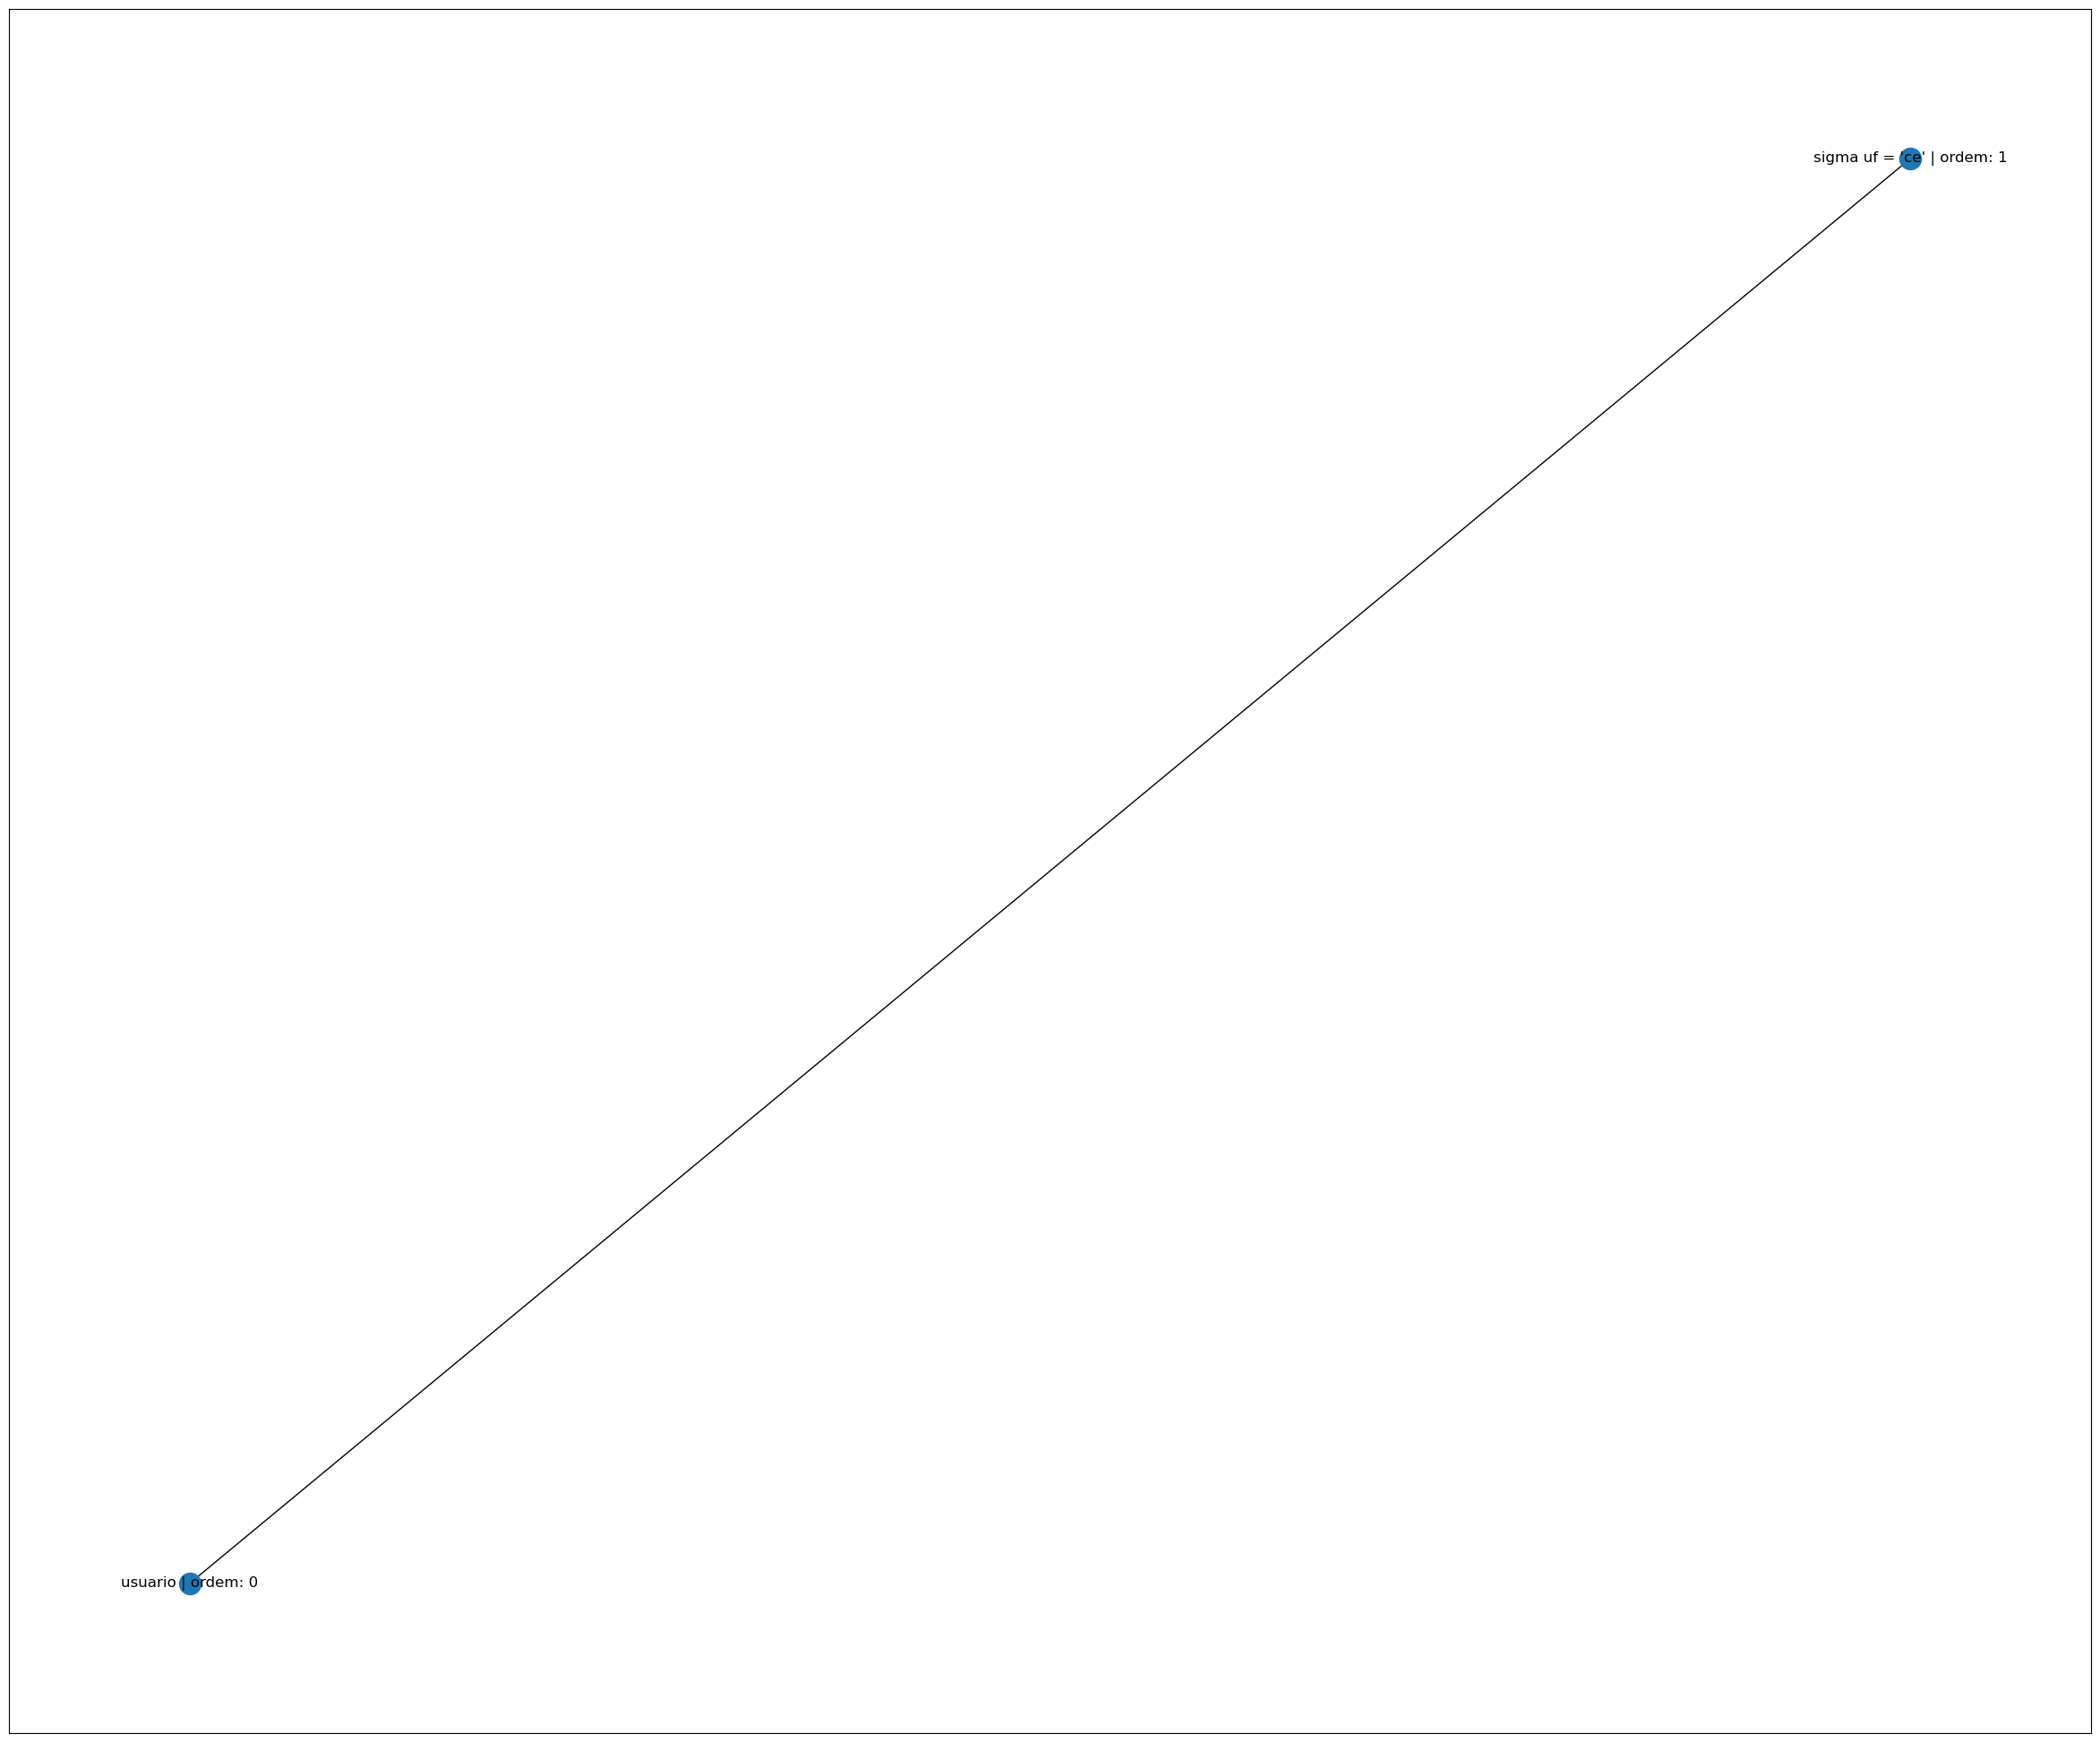

Deu erro!
Deu erro!
['usuario', "sigma uf = 'ce'"]


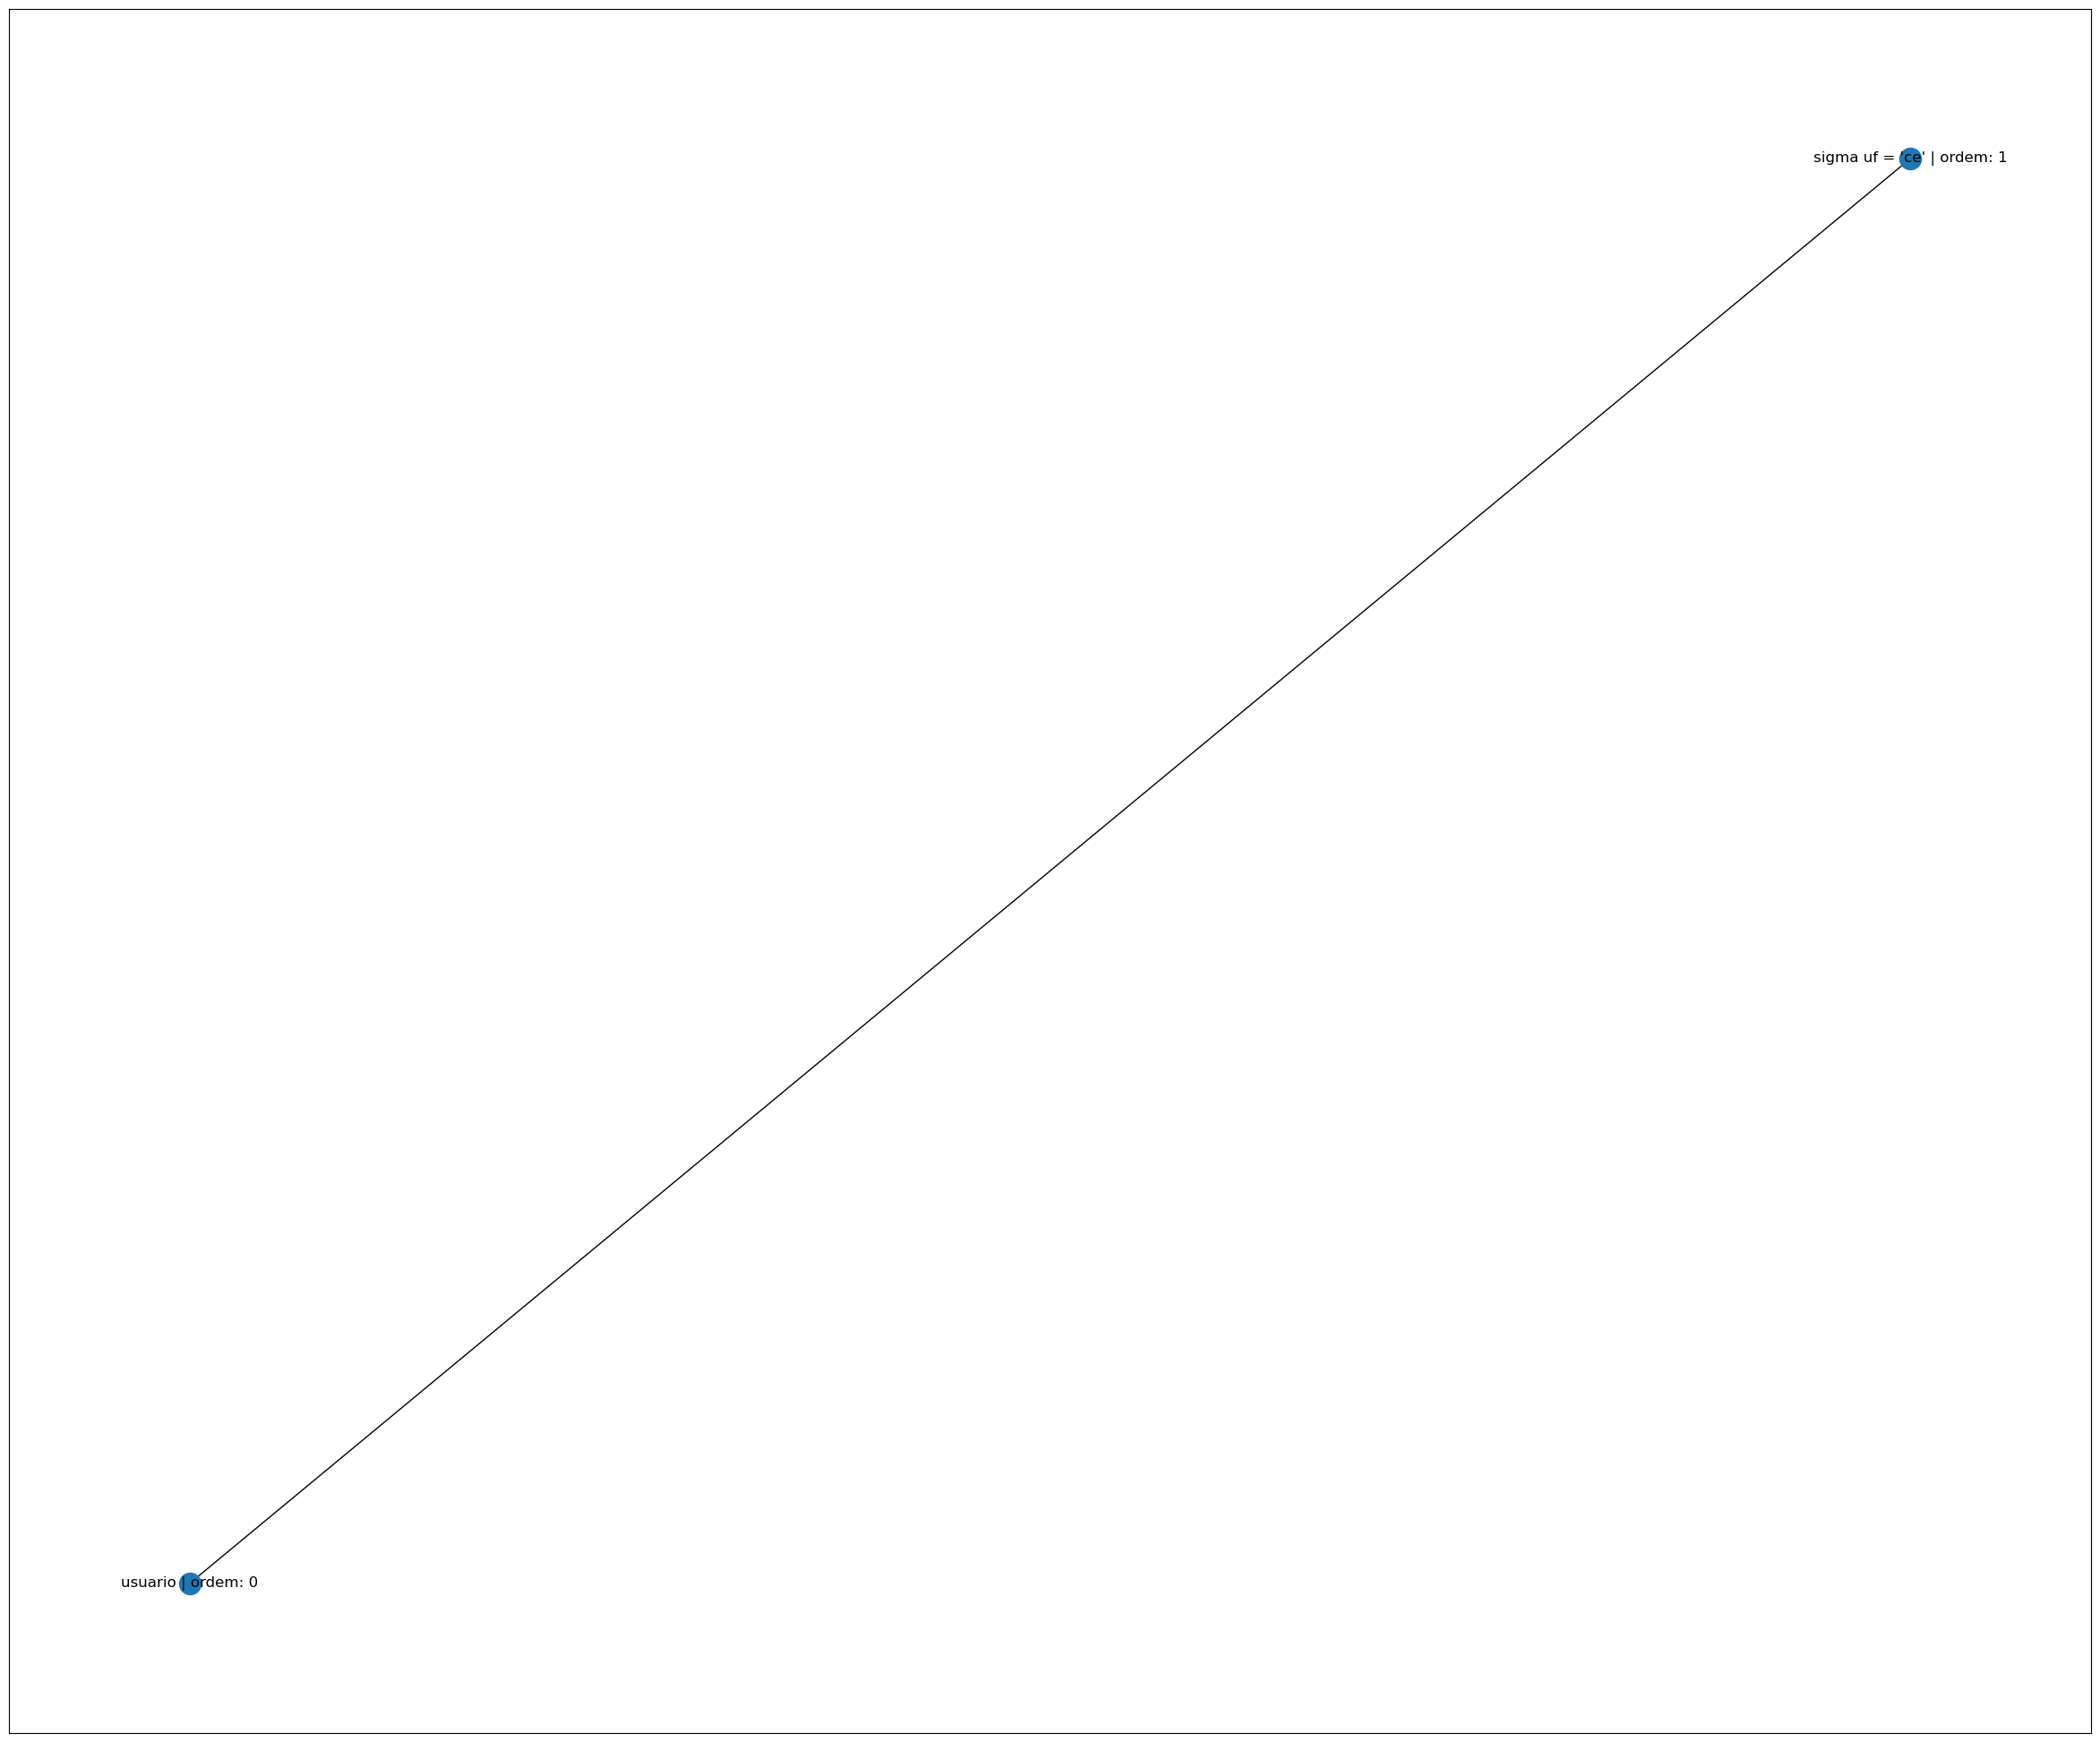

Deu erro!
['usuario', "sigma uf = 'ce'"]


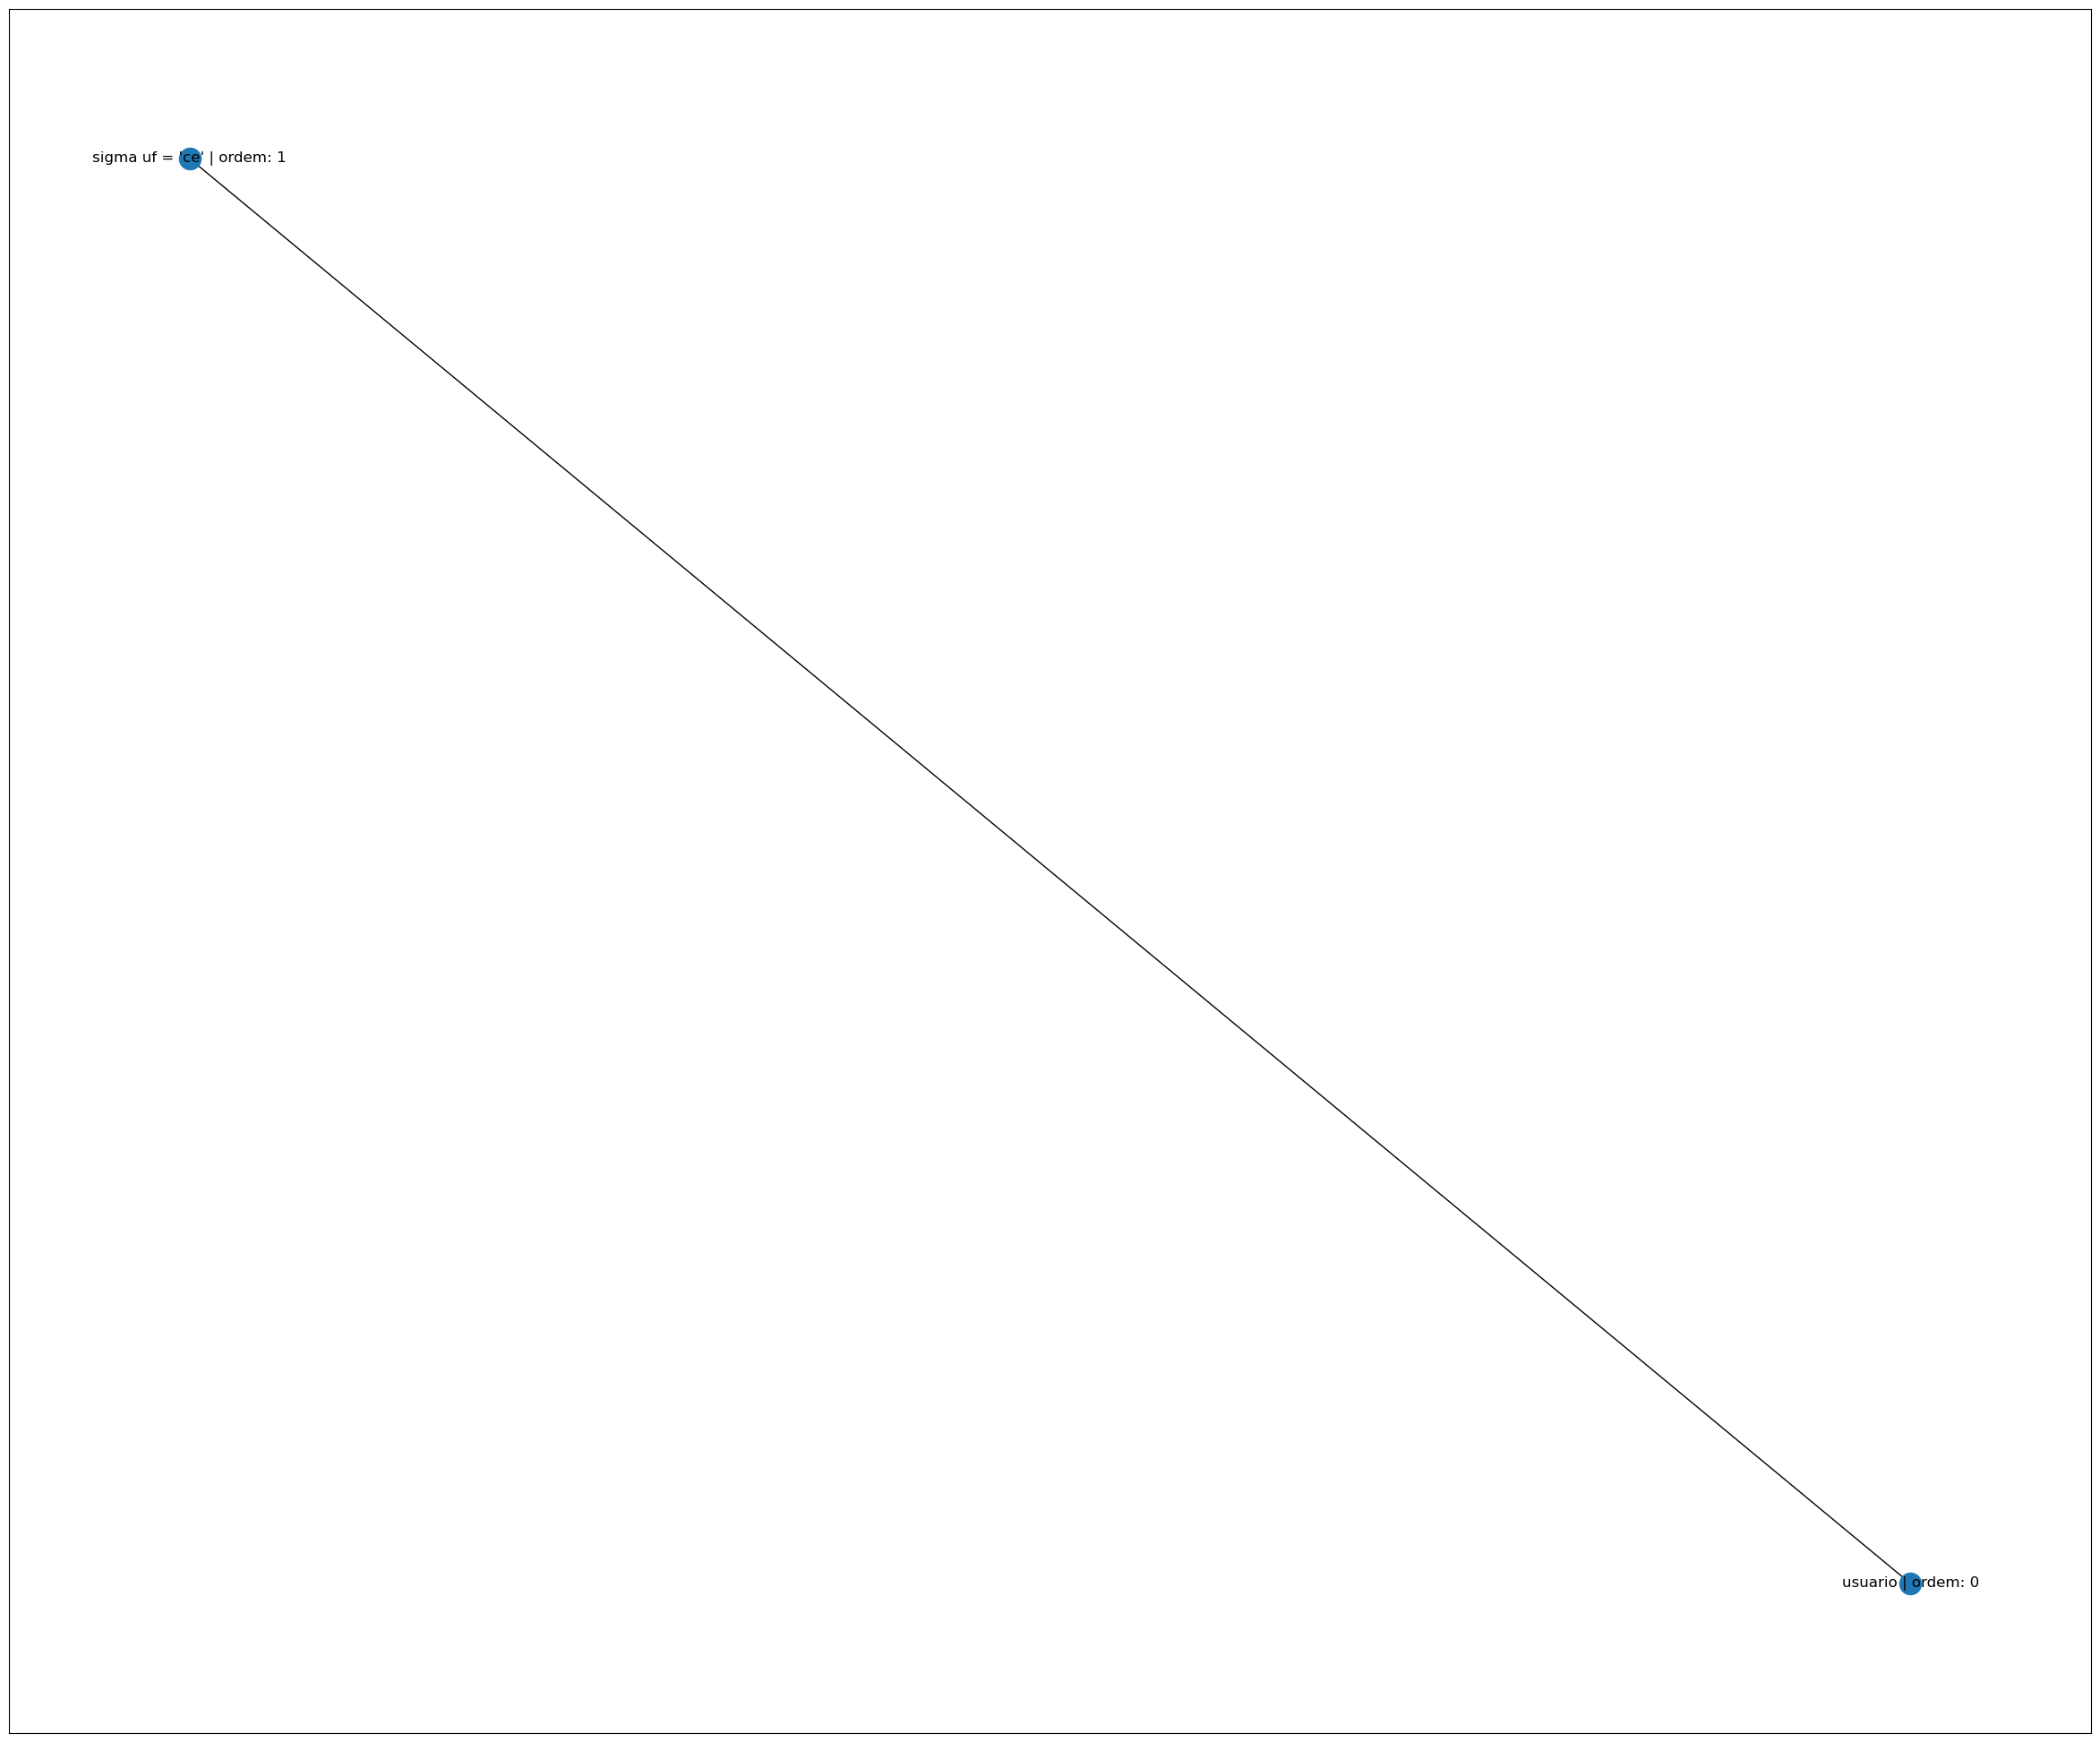

Deu erro!
Deu erro!
Deu erro!
Deu erro!
Deu erro!
Deu erro!
['usuario', "sigma uf = 'ce'"]


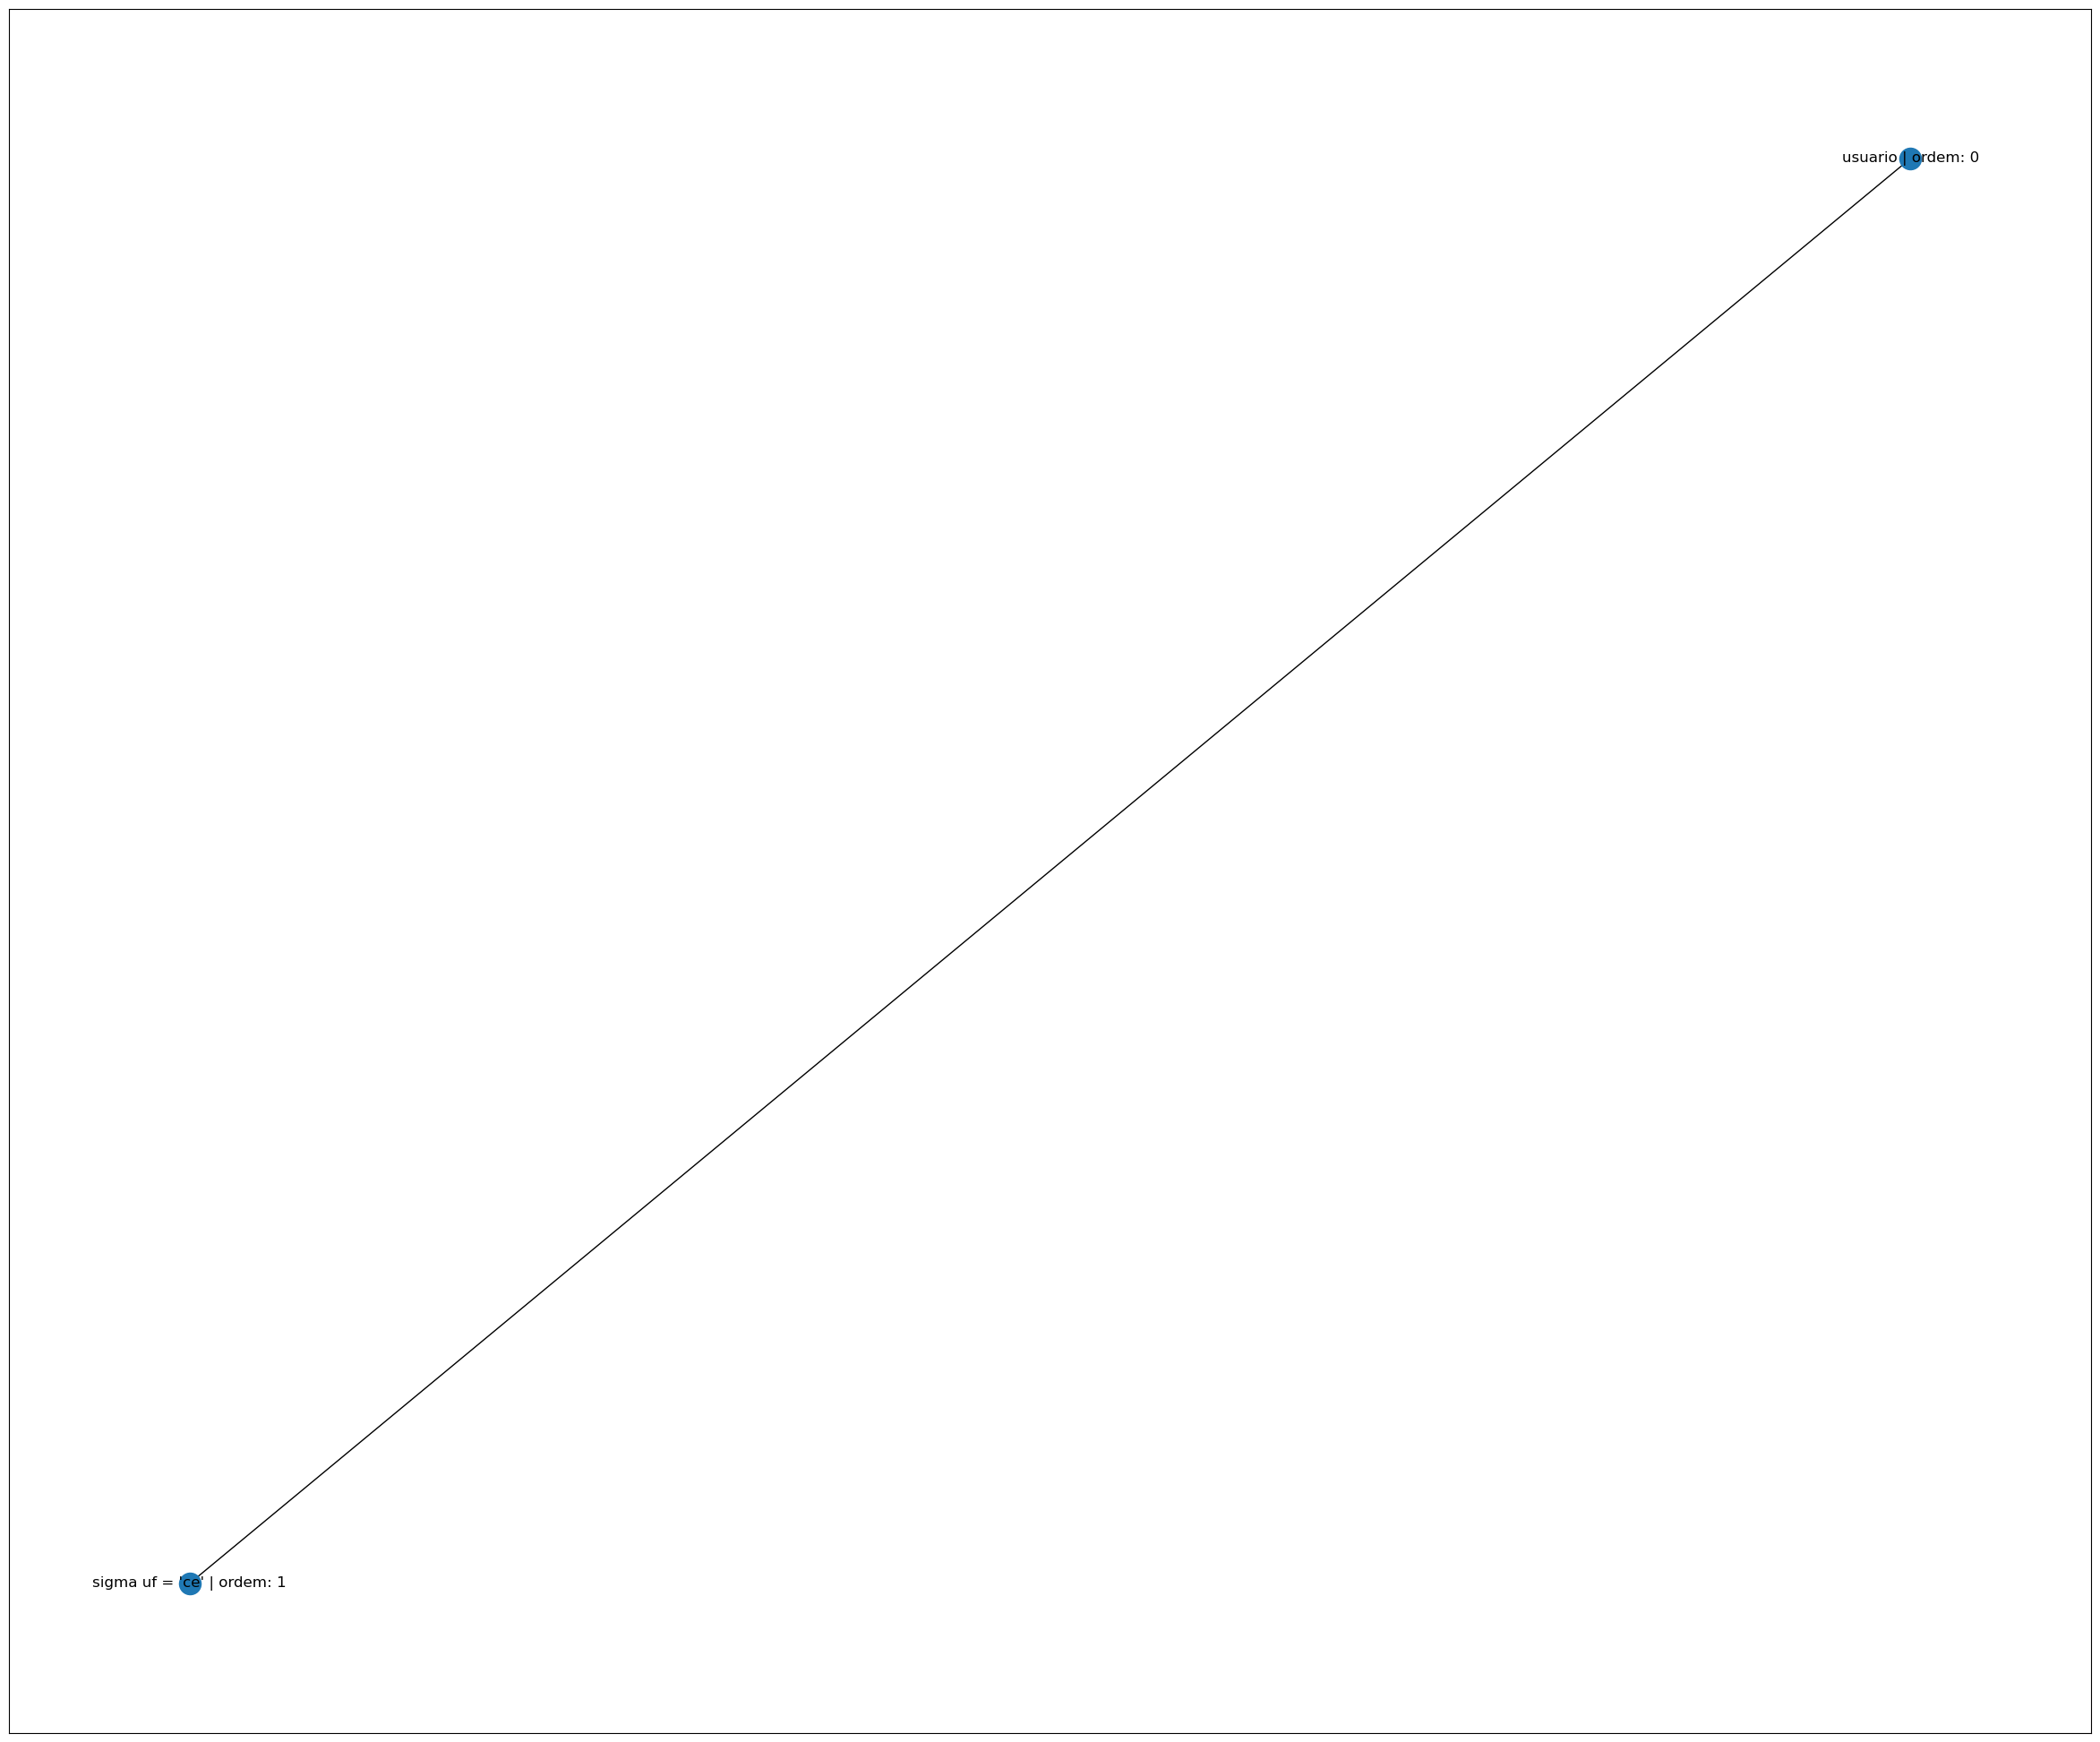

Deu erro!
['usuario', "sigma uf = 'ce'"]


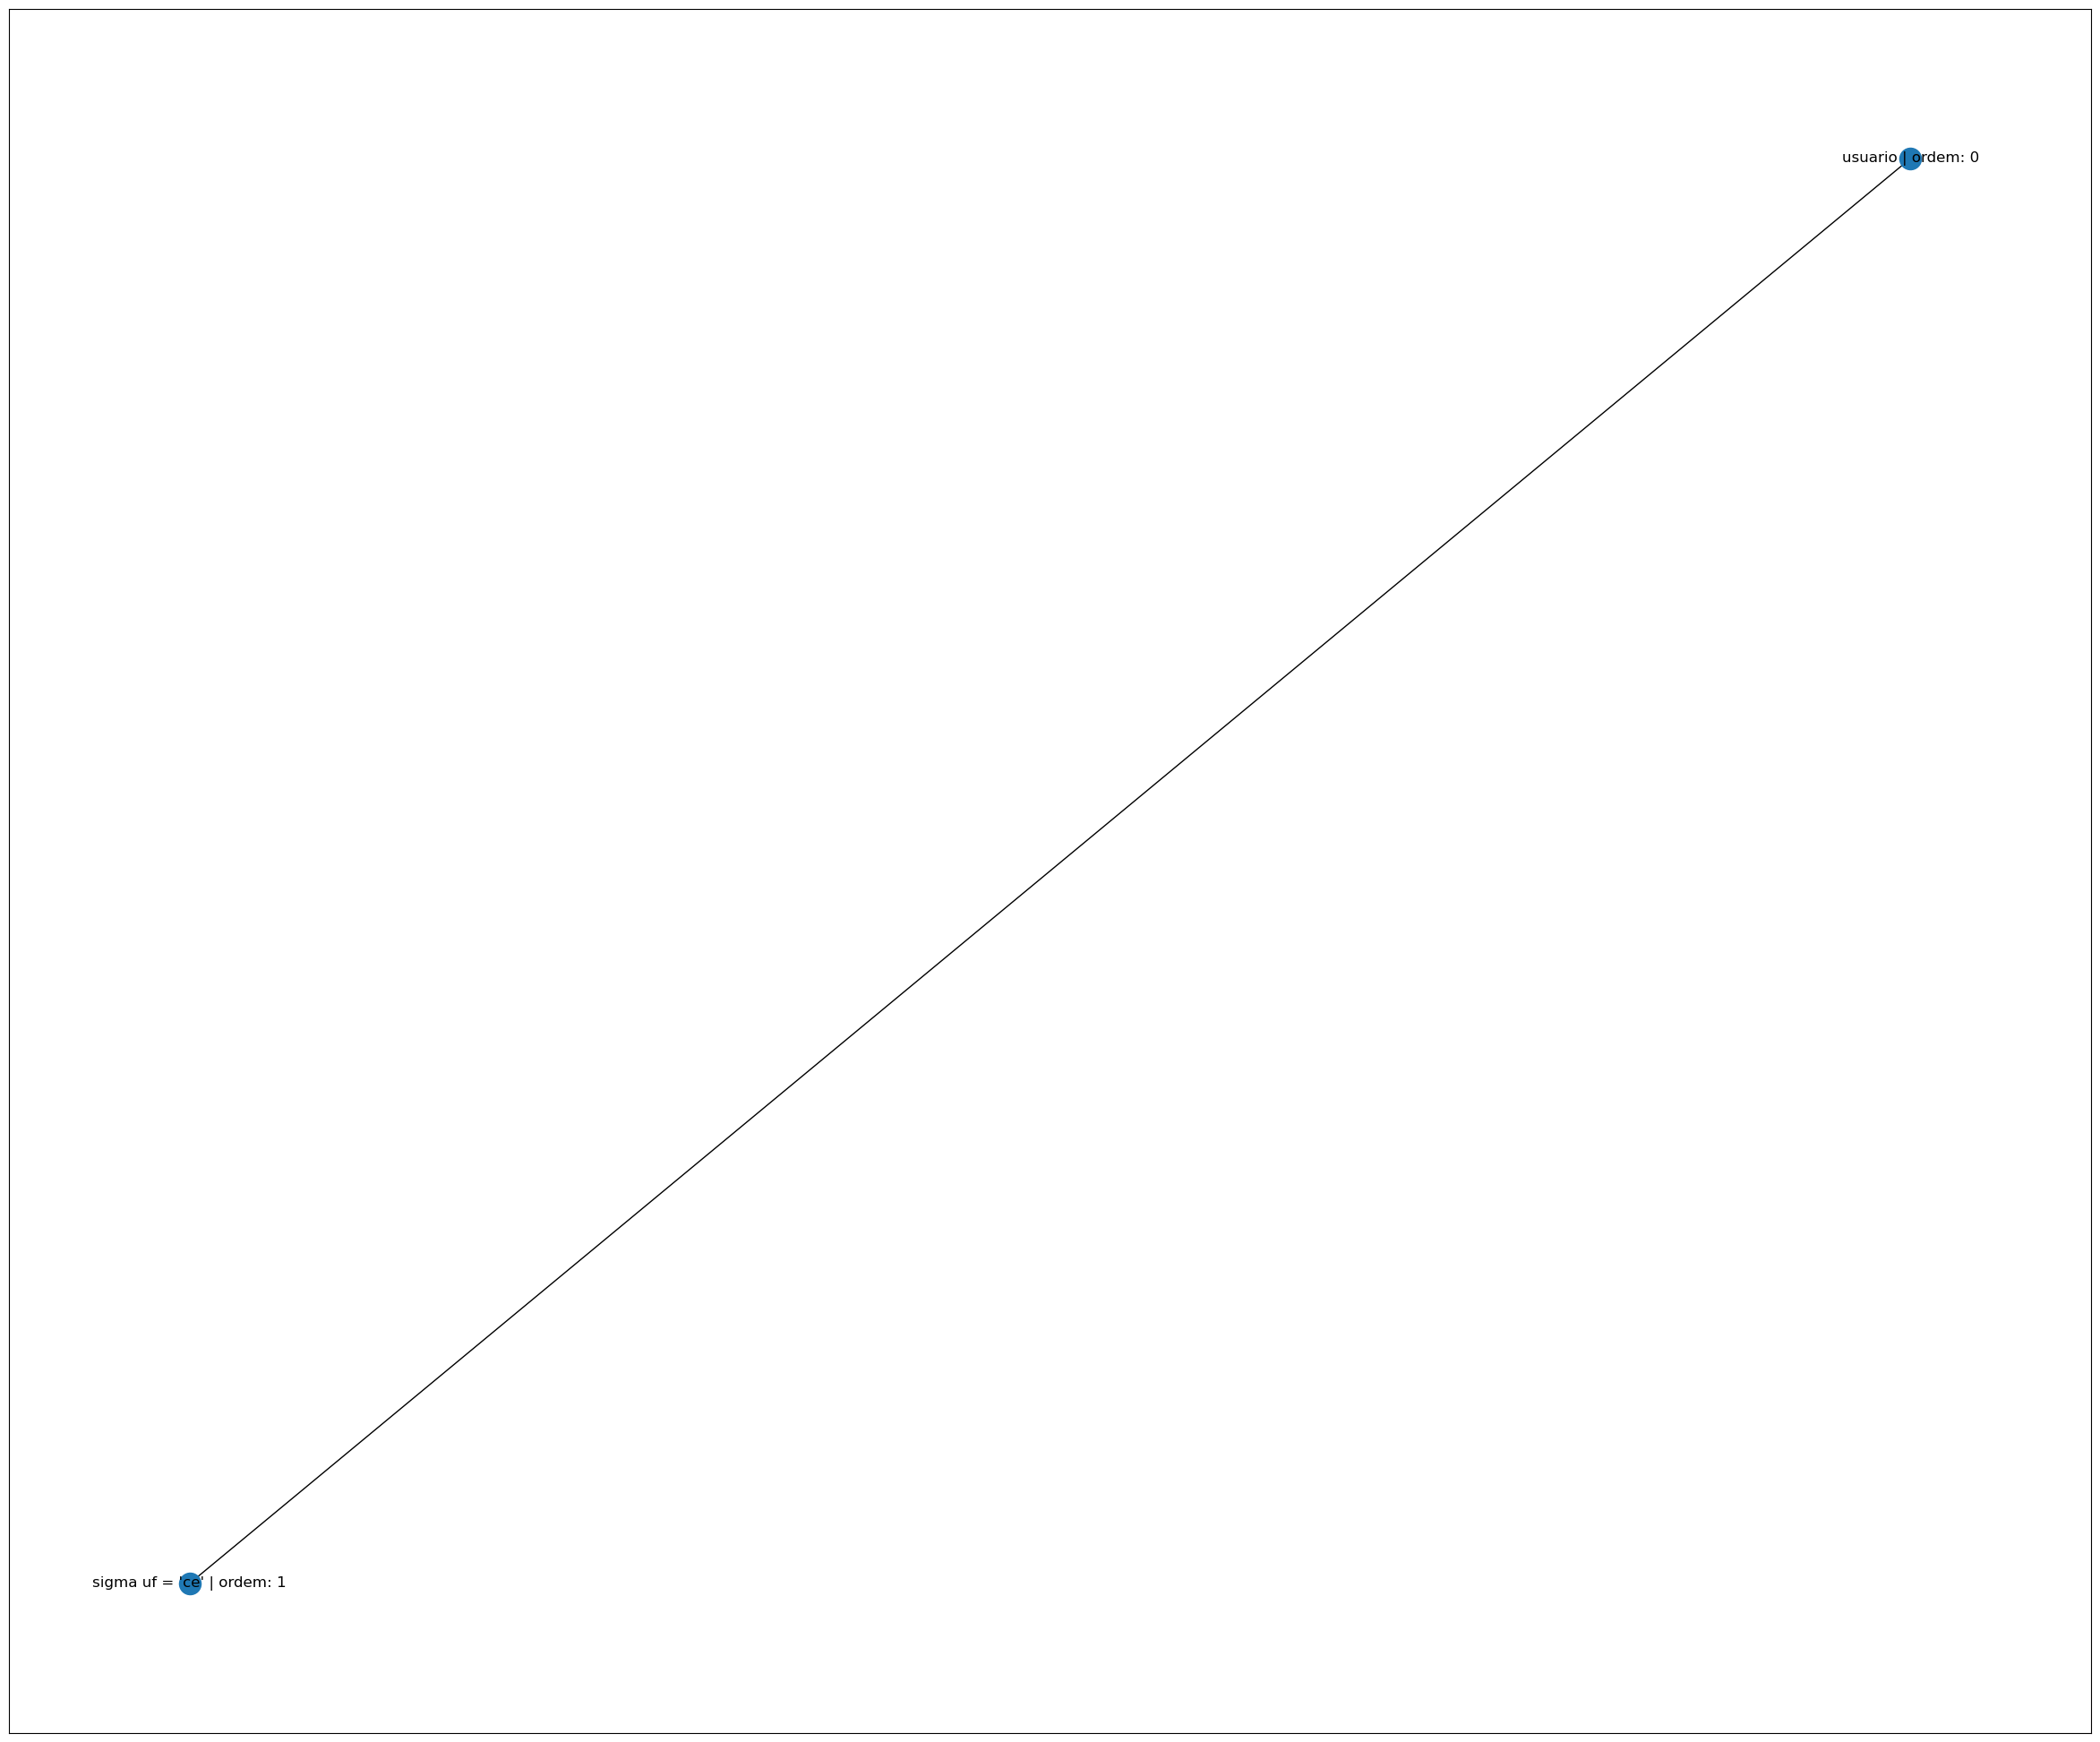

Deu erro!
['usuario', "sigma uf = 'ce'"]


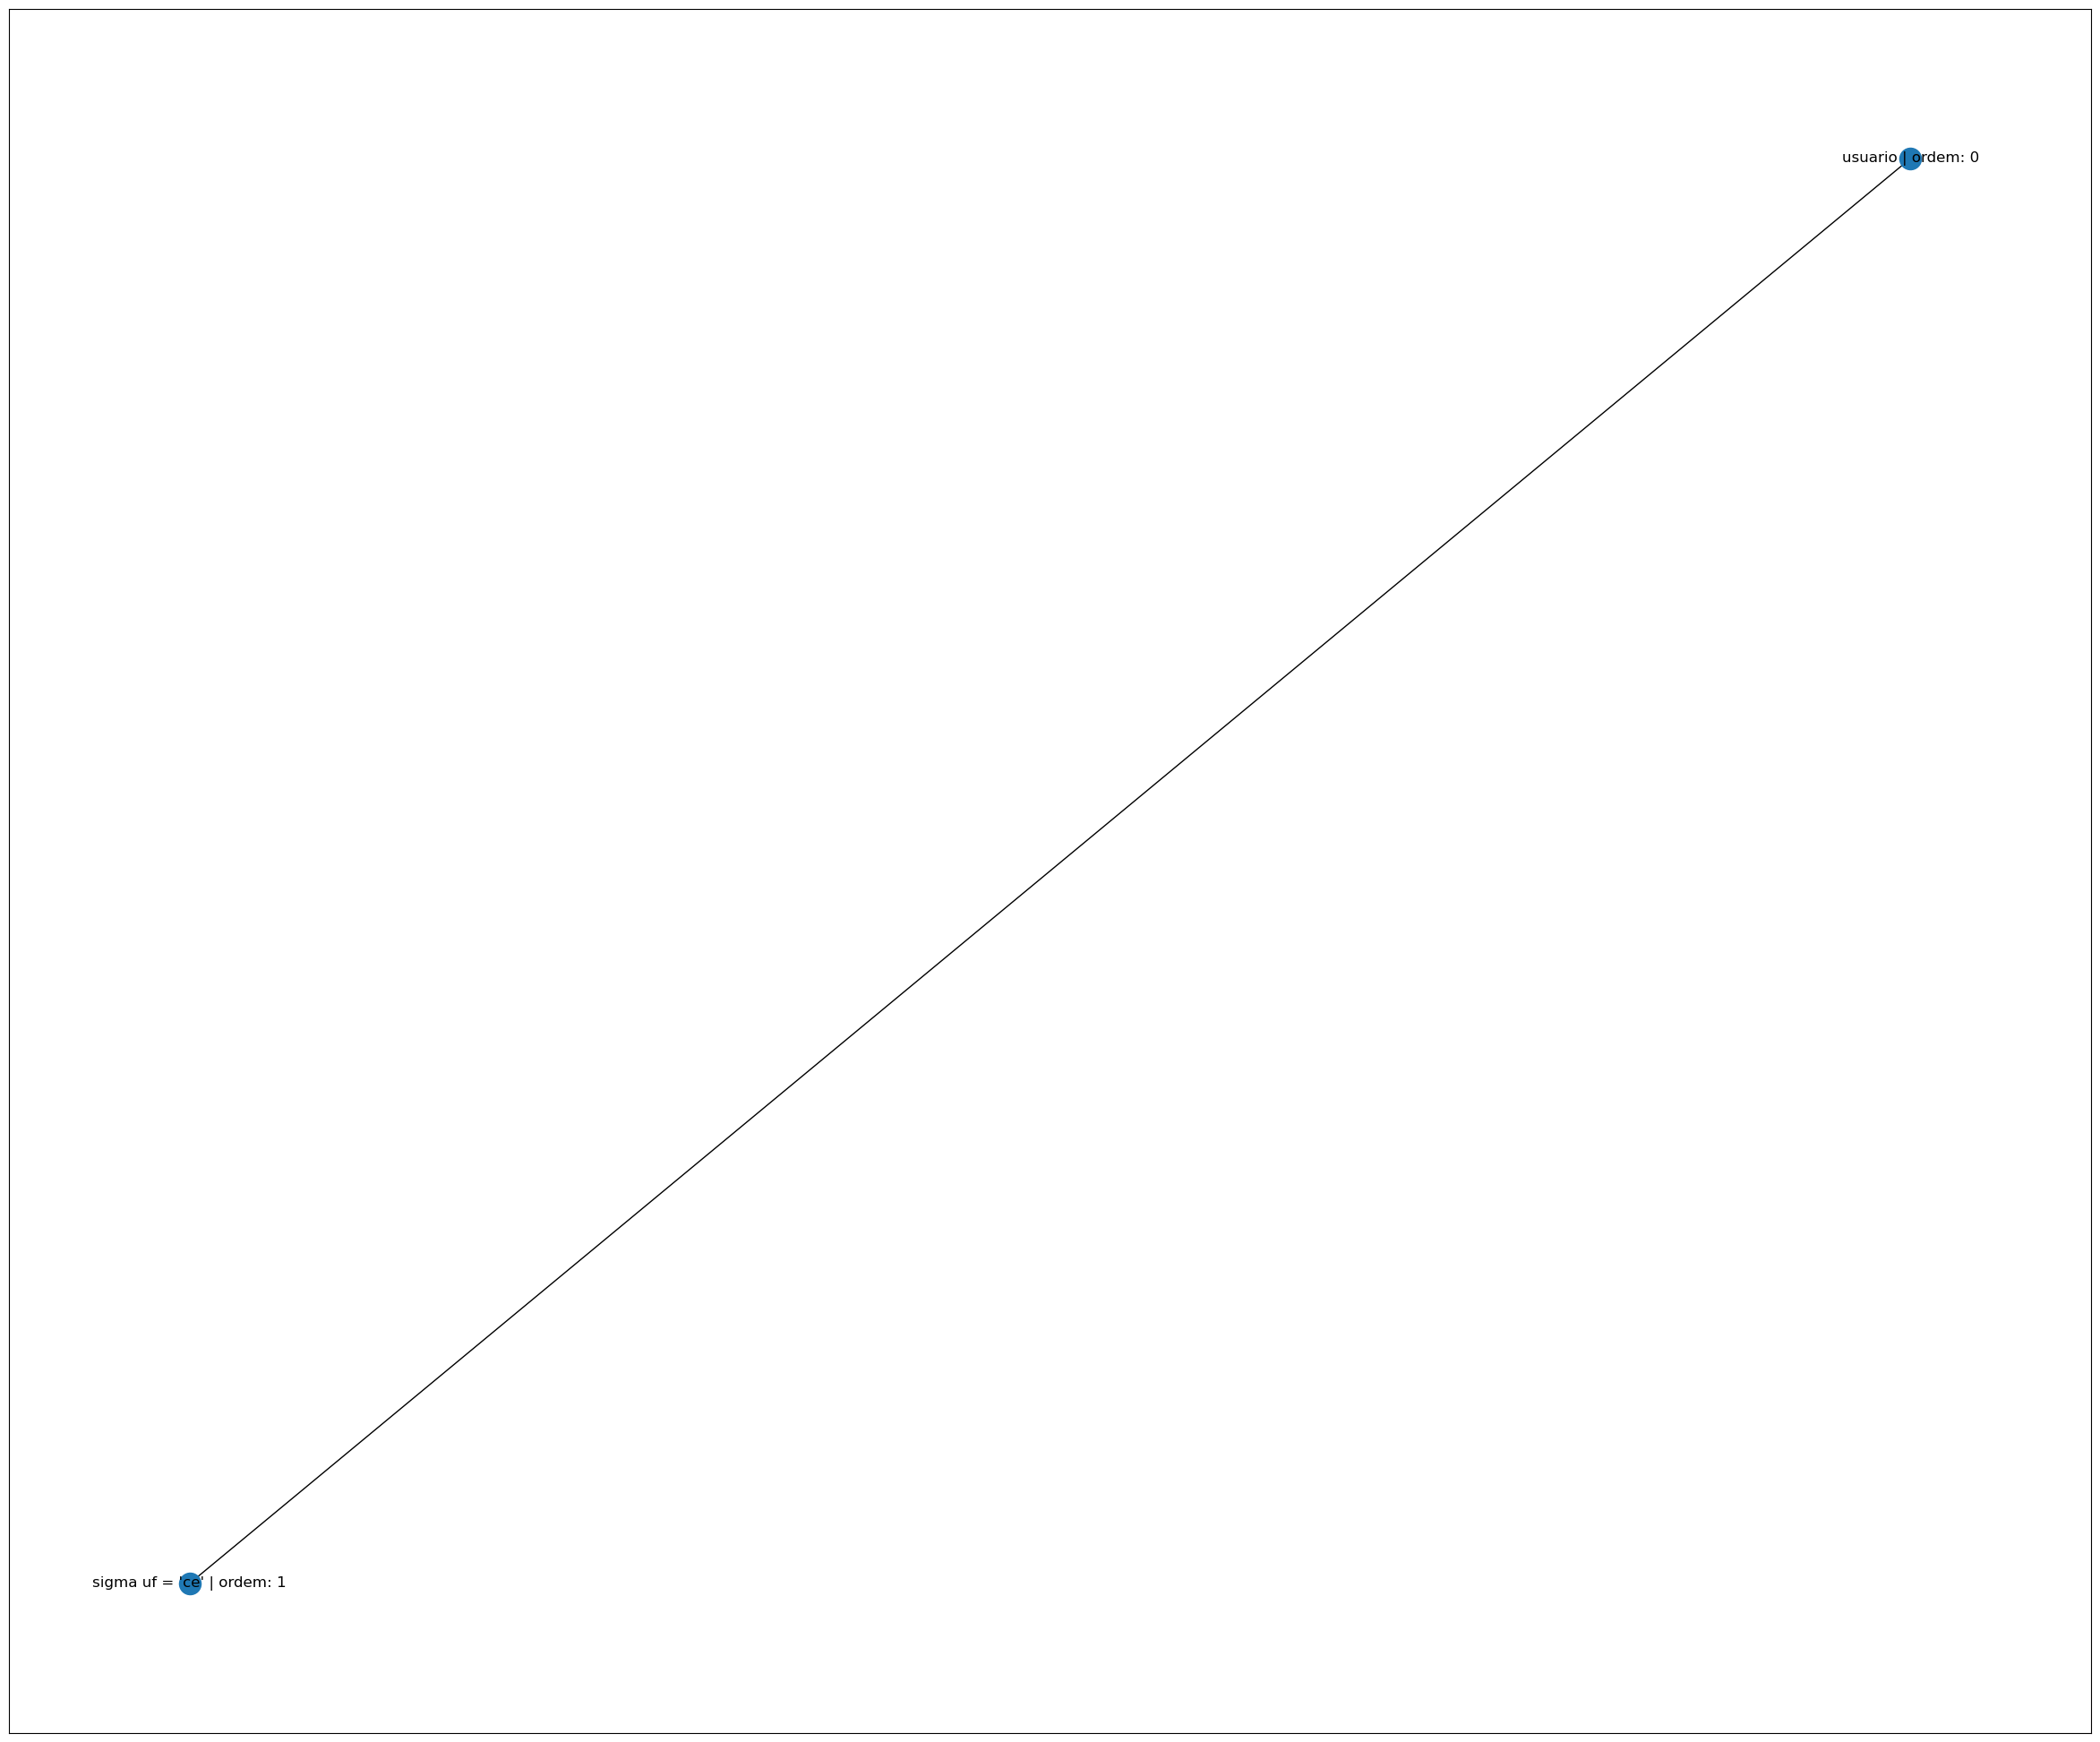

Deu erro!
Deu erro!
['usuario', "sigma usuario.uf = 'ce'", 'pi idusuario', 'contas', 'sigma contas.saldoinicial = 200', 'pi usuario_idusuario', '|x| usuario.idusuario = contas.usuario_idusuario']


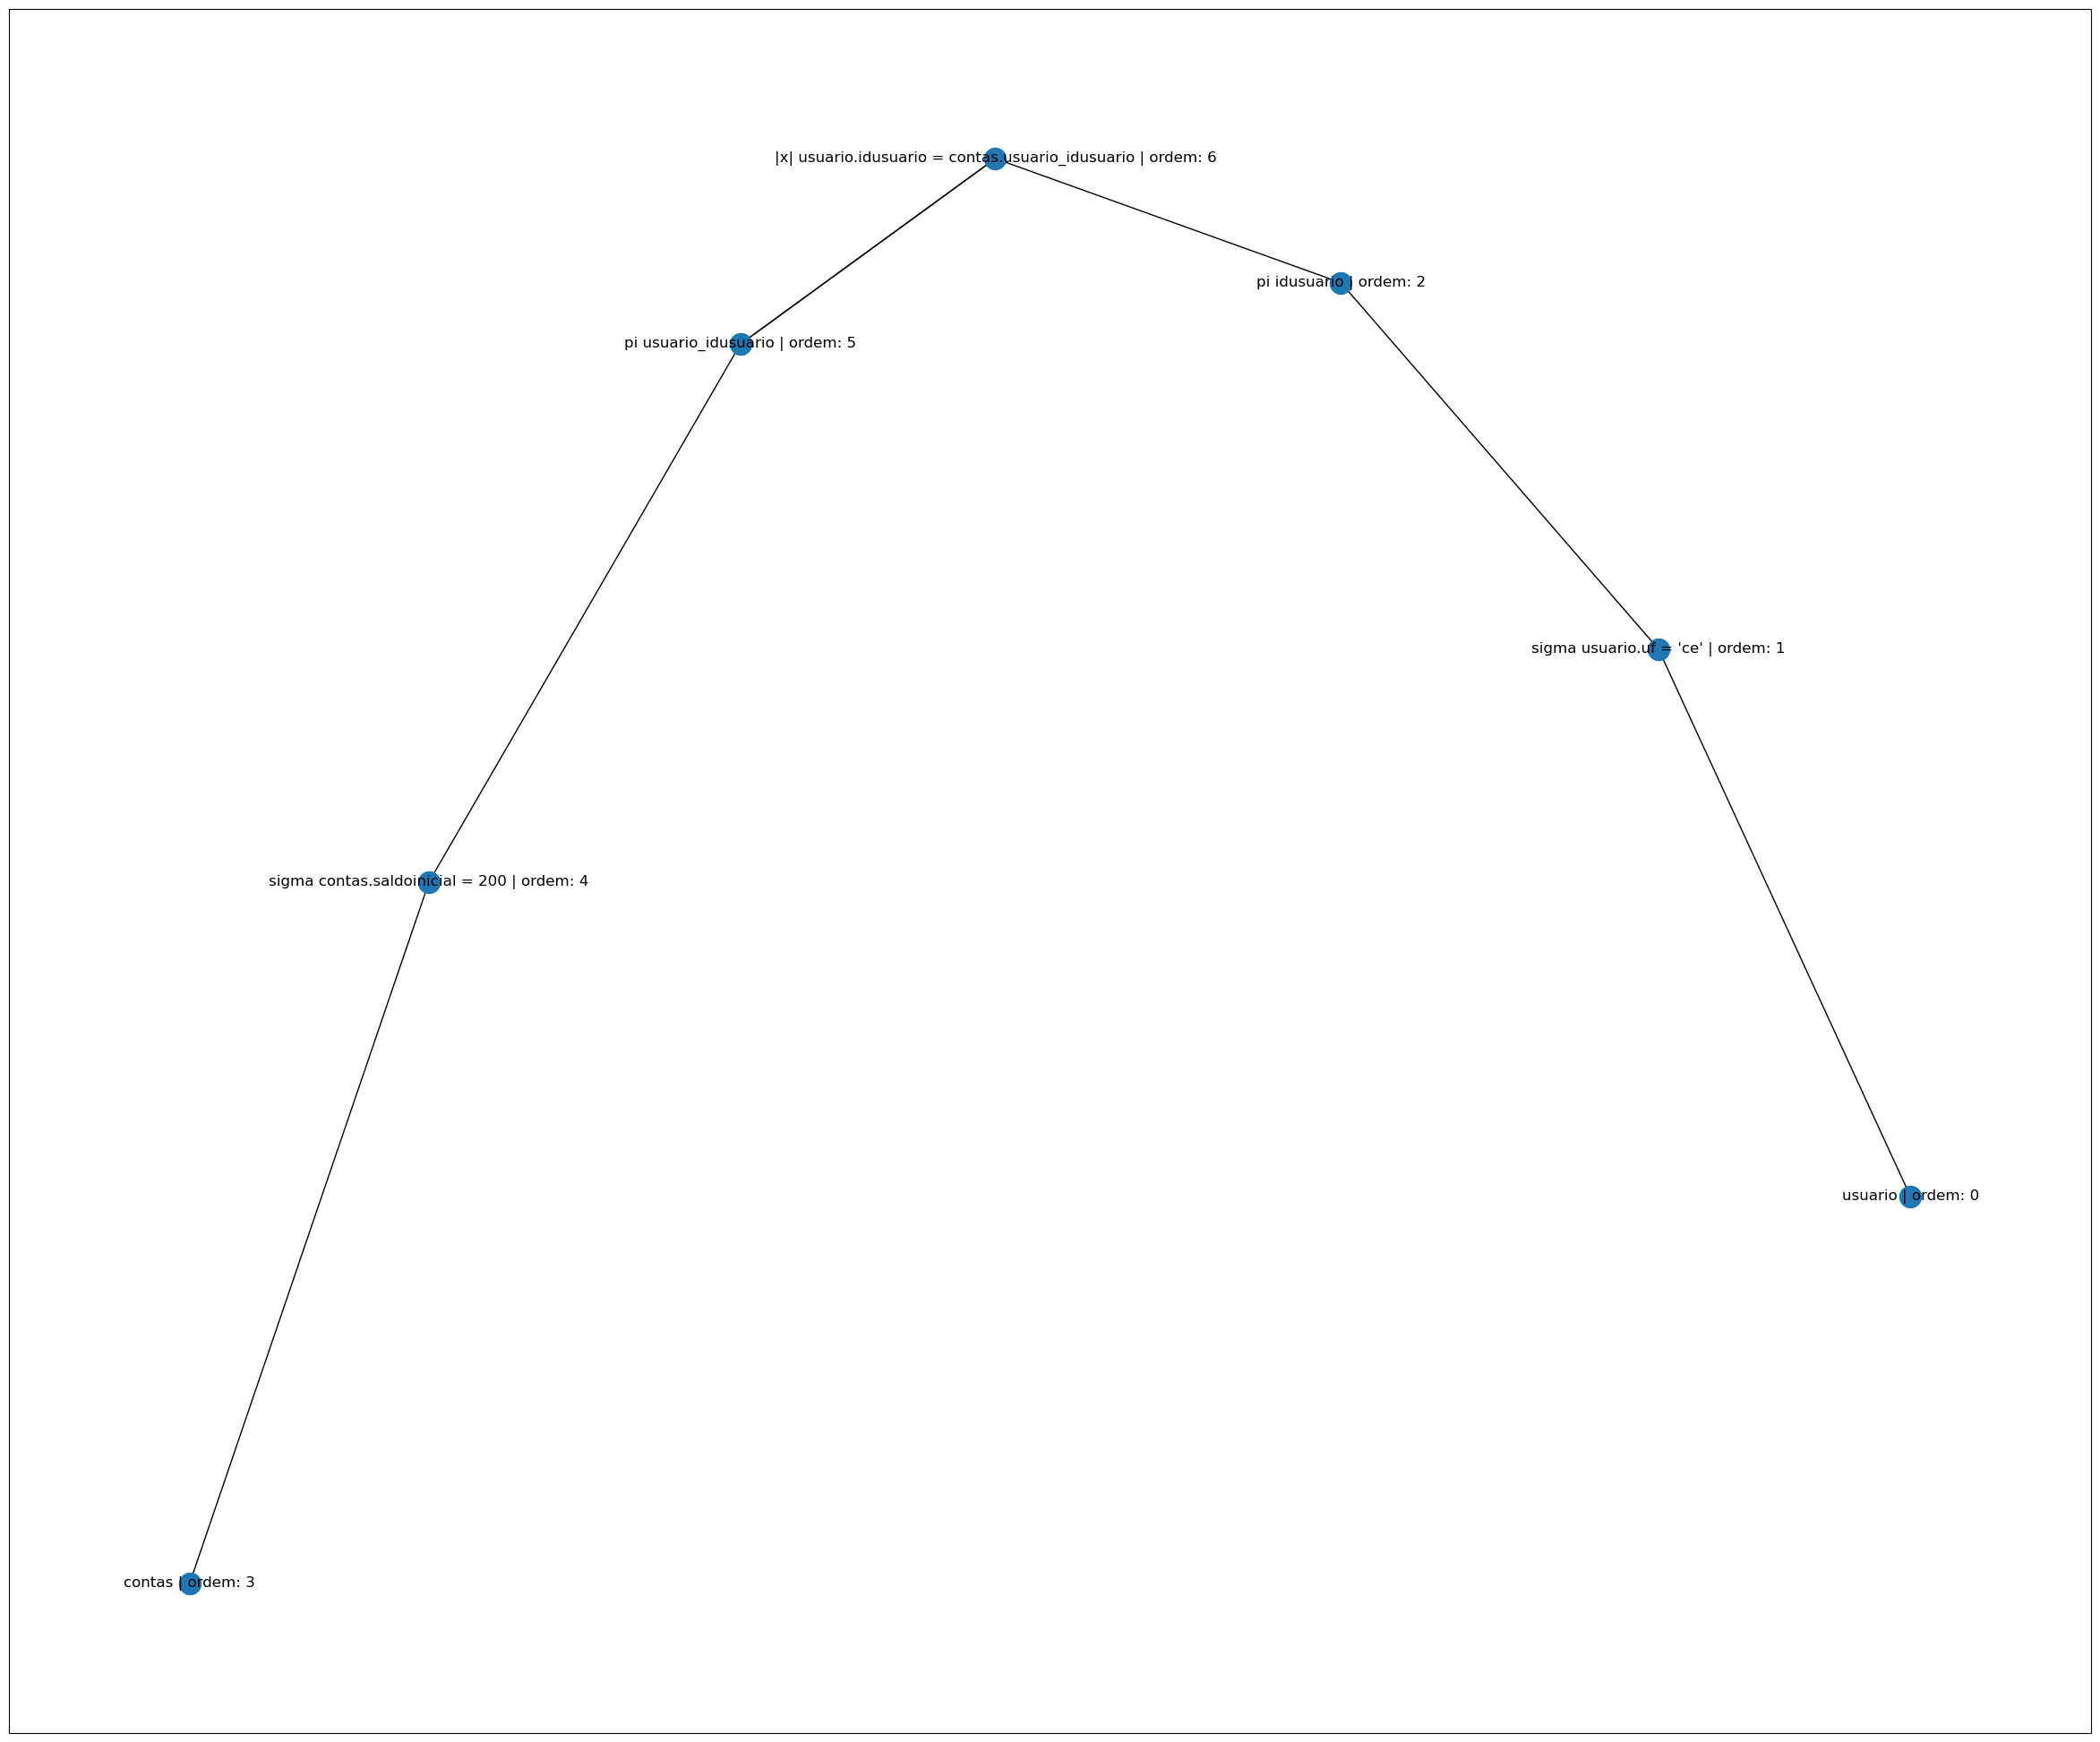

Deu erro!
['usuario', "sigma usuario.uf = 'ce'", 'pi idusuario', 'contas', 'sigma contas.saldoinicial = 200', 'pi usuario_idusuario', '|x| usuario.idusuario = contas.usuario_idusuario']


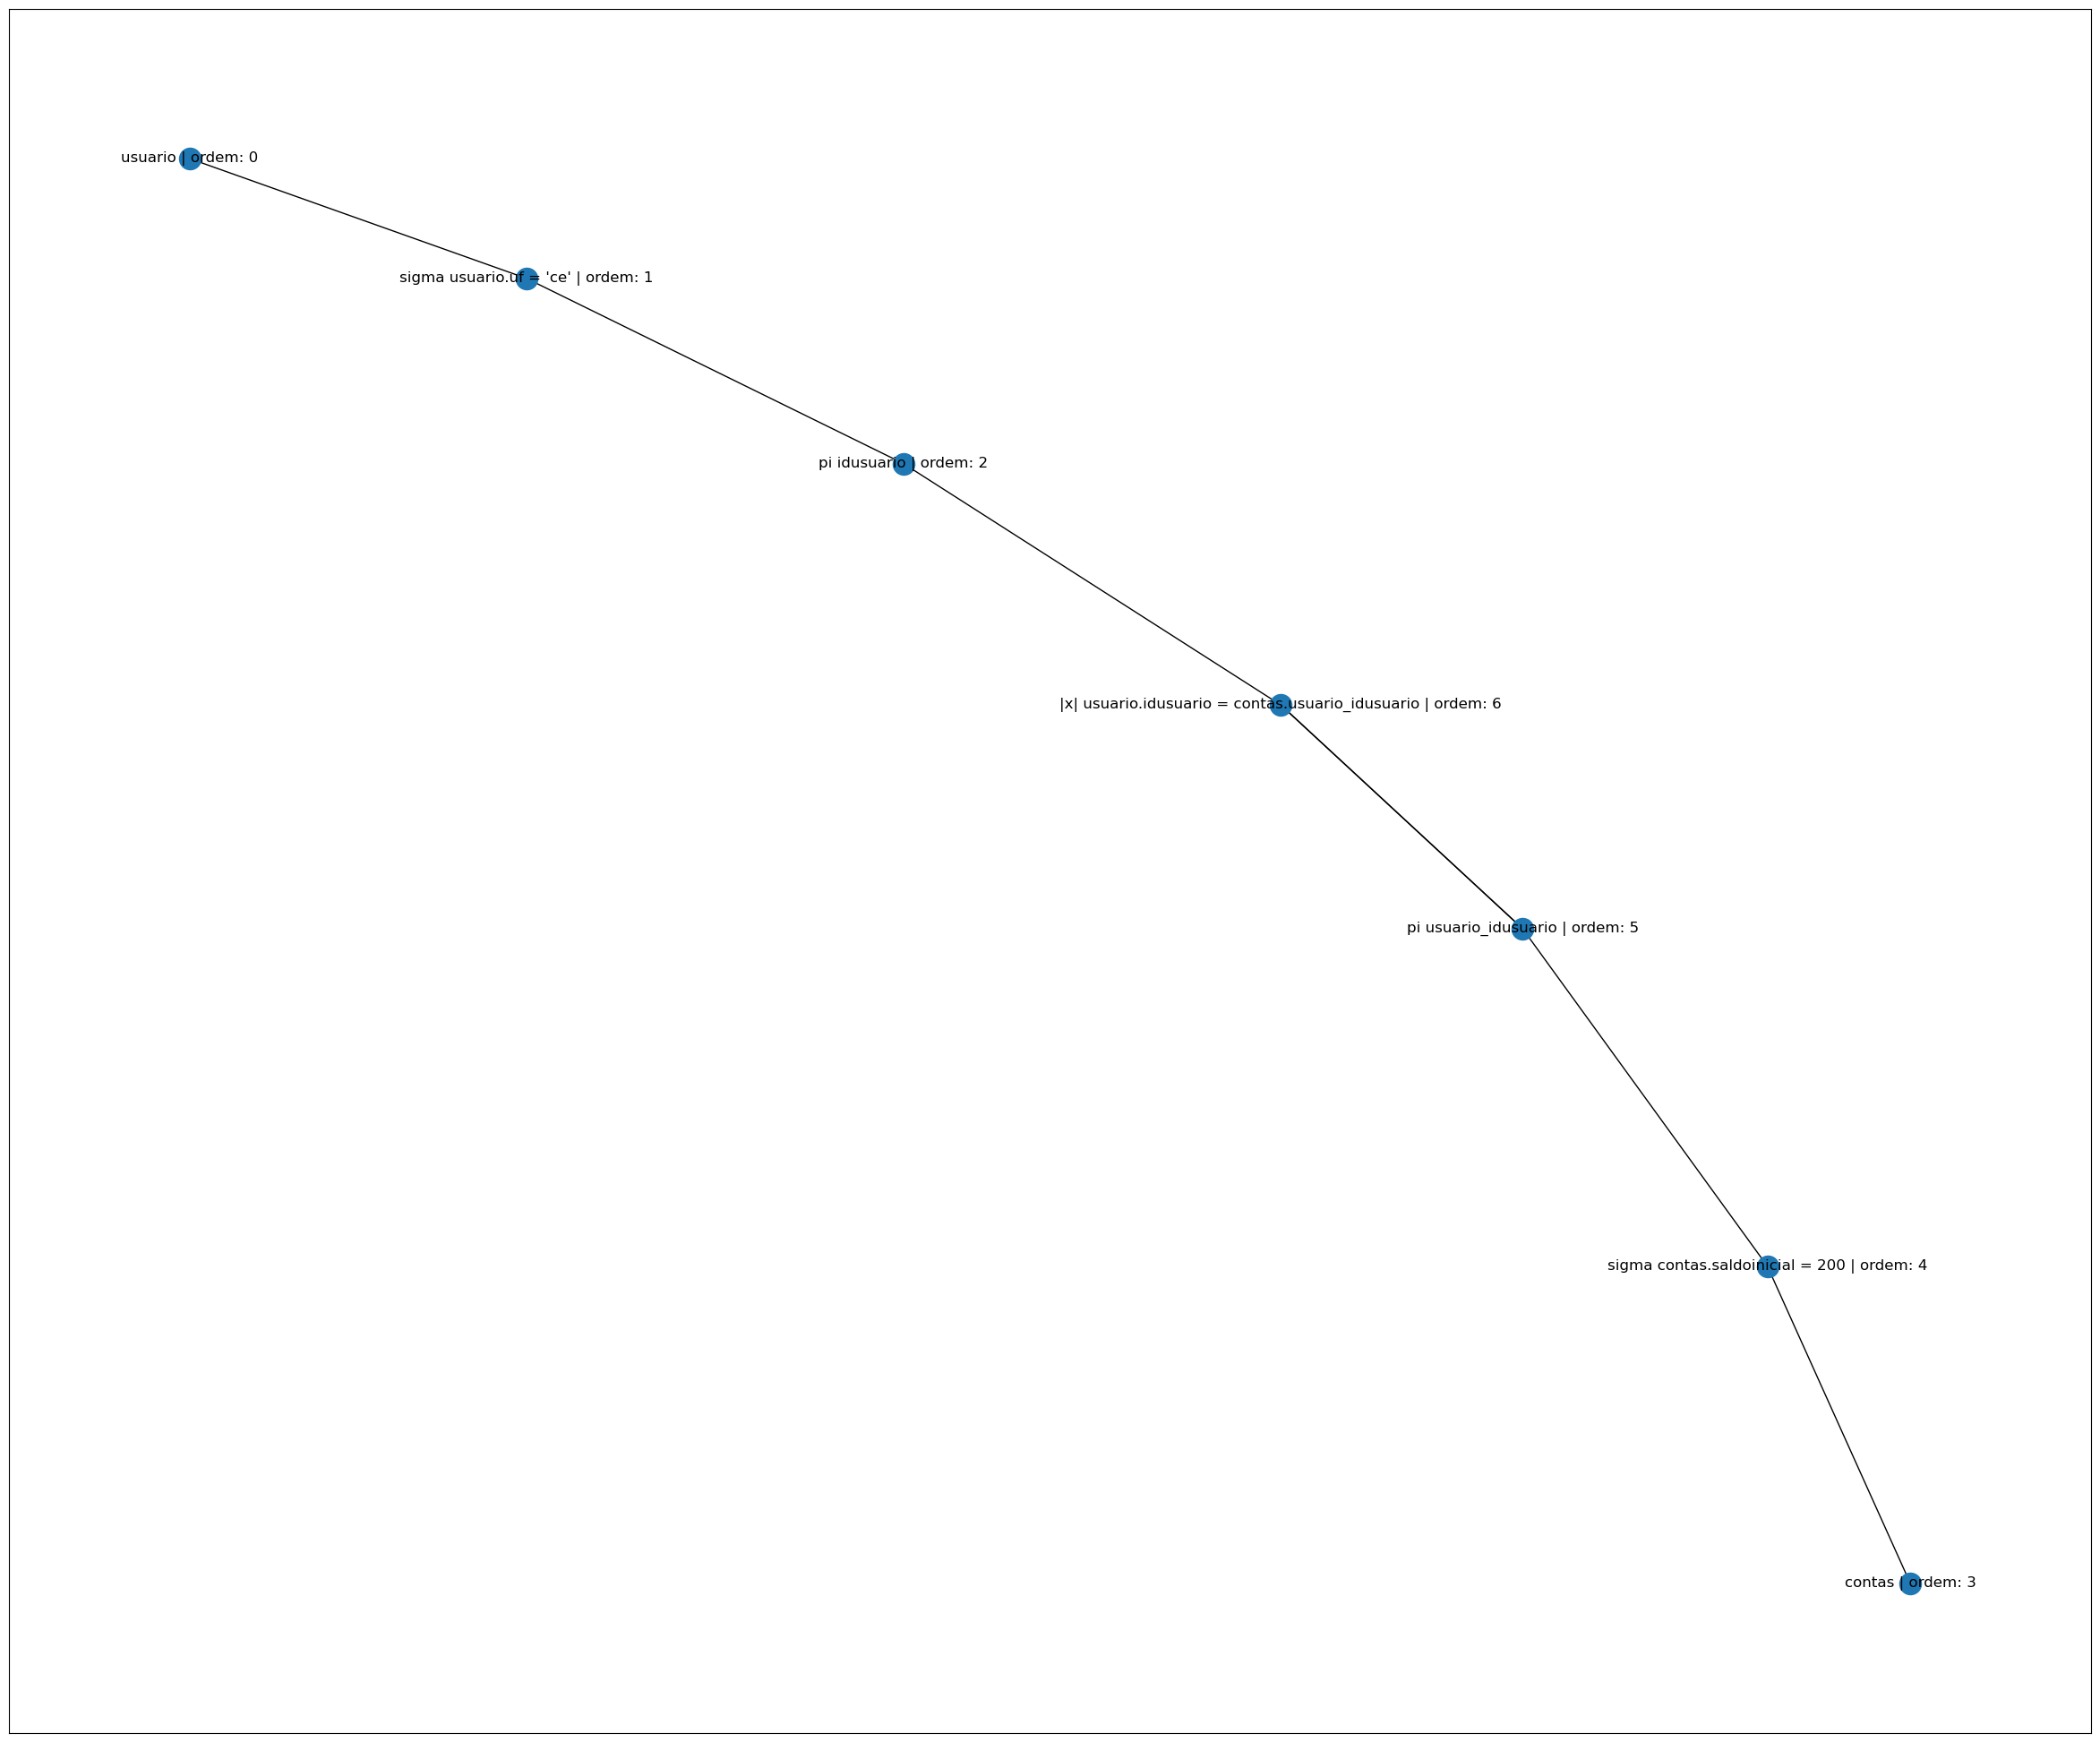

Deu erro!
['usuario', "sigma usuario.uf = 'ce'", 'pi idusuario', 'contas', 'sigma contas.saldoinicial = 200', 'pi usuario_idusuario', '|x| usuario.idusuario = contas.usuario_idusuario']


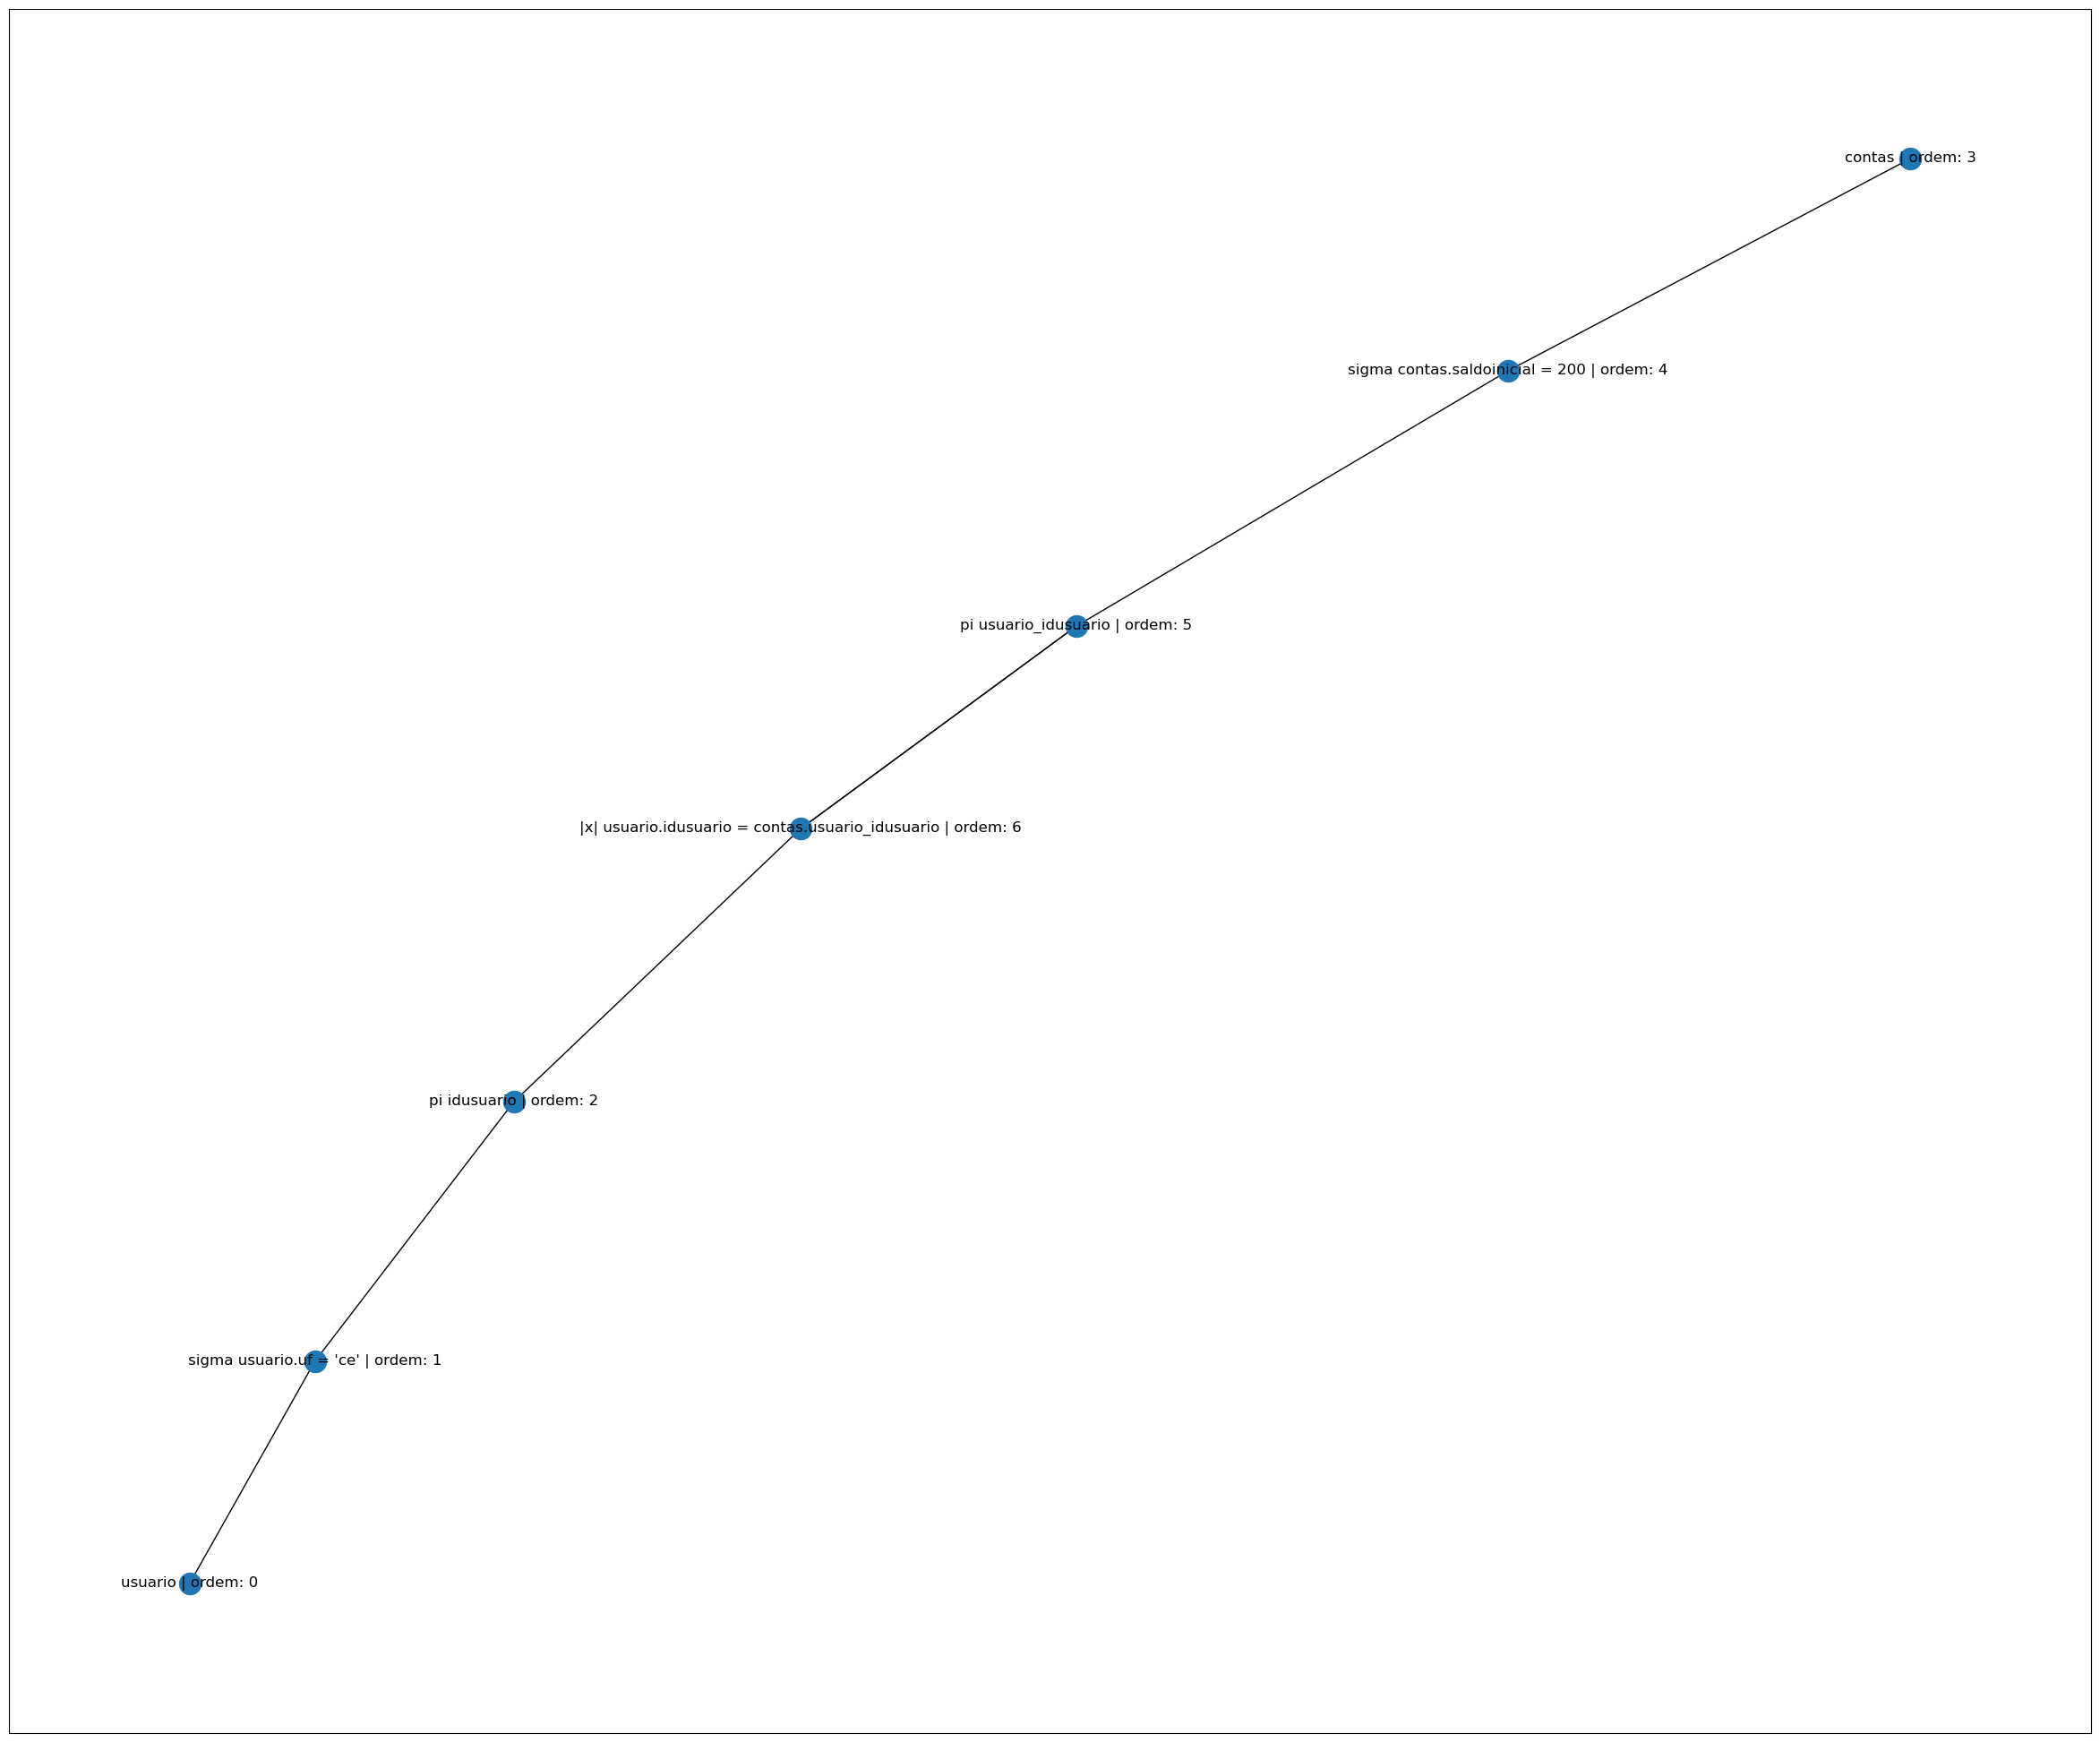

Deu erro!
['usuario', "sigma usuario.uf = 'ce'", 'pi idusuario', 'contas', 'sigma contas.saldoinicial = 200', 'pi usuario_idusuario', '|x| usuario.idusuario = contas.usuario_idusuario']


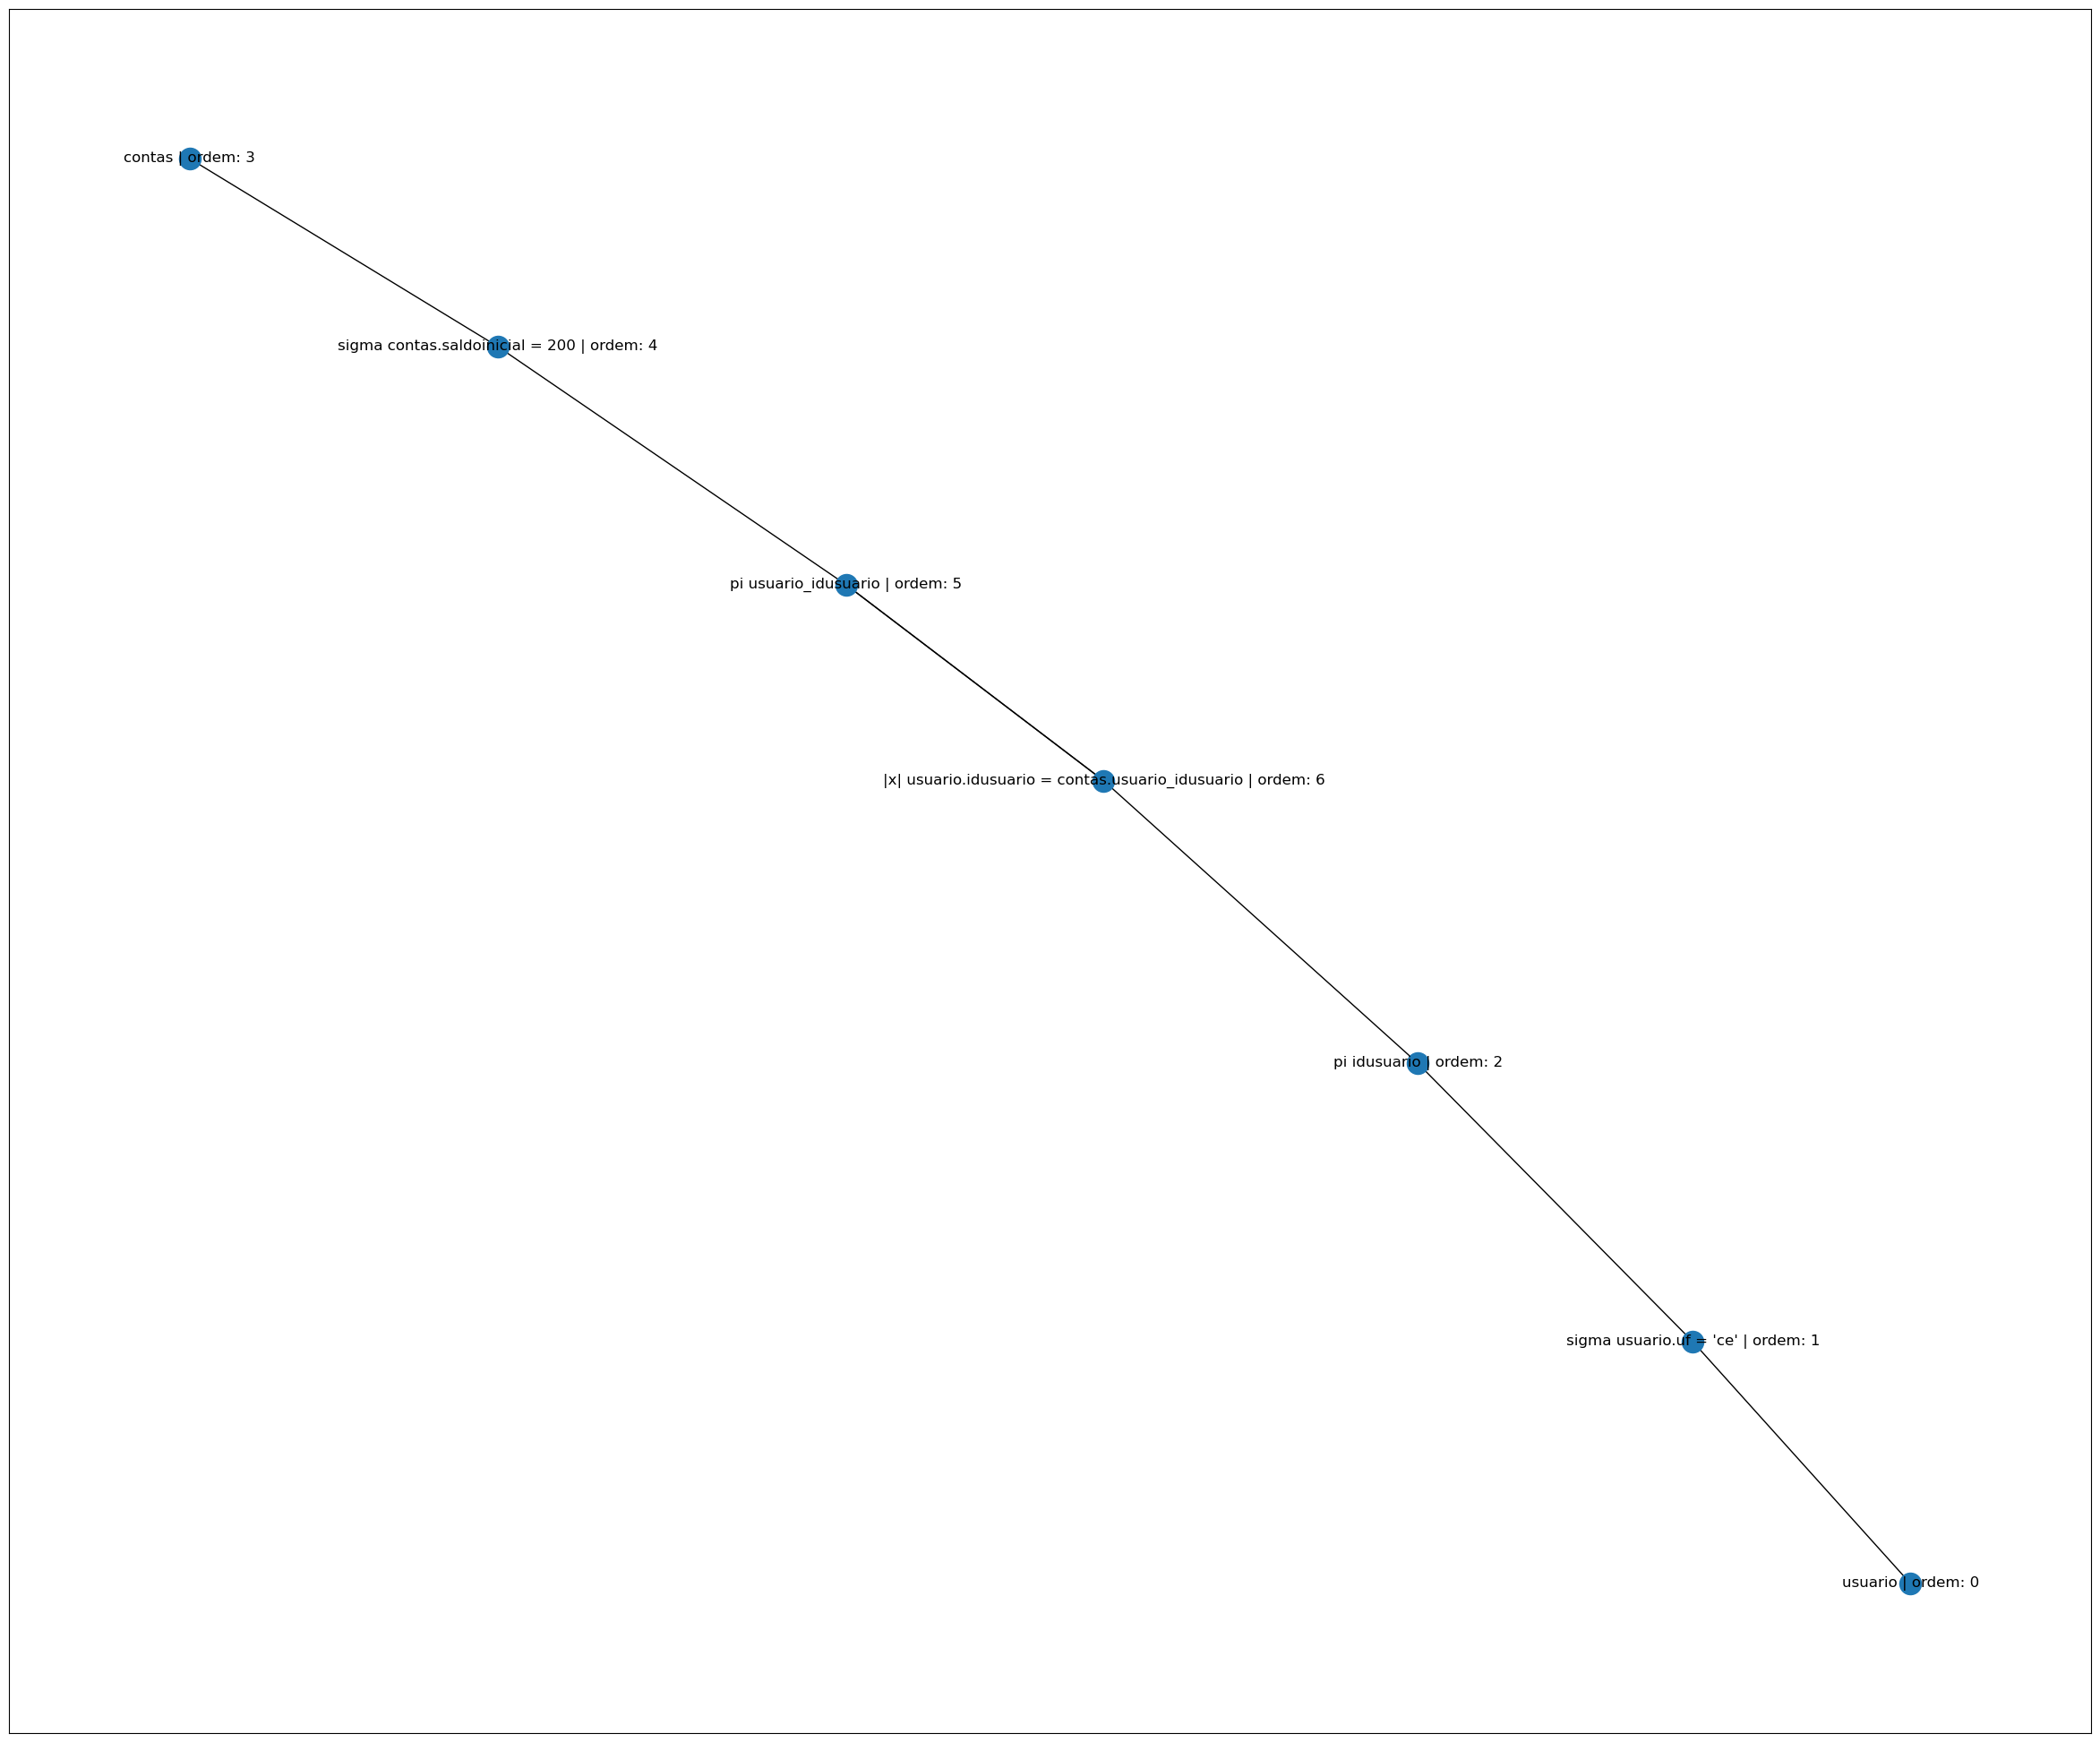

Deu erro!
Deu erro!
['usuario', "sigma usuario.uf = 'ce'", 'pi idusuario', 'contas', 'sigma contas.saldoinicial = 200', 'pi usuario_idusuario', '|x| usuario.idusuario = contas.usuario_idusuario']


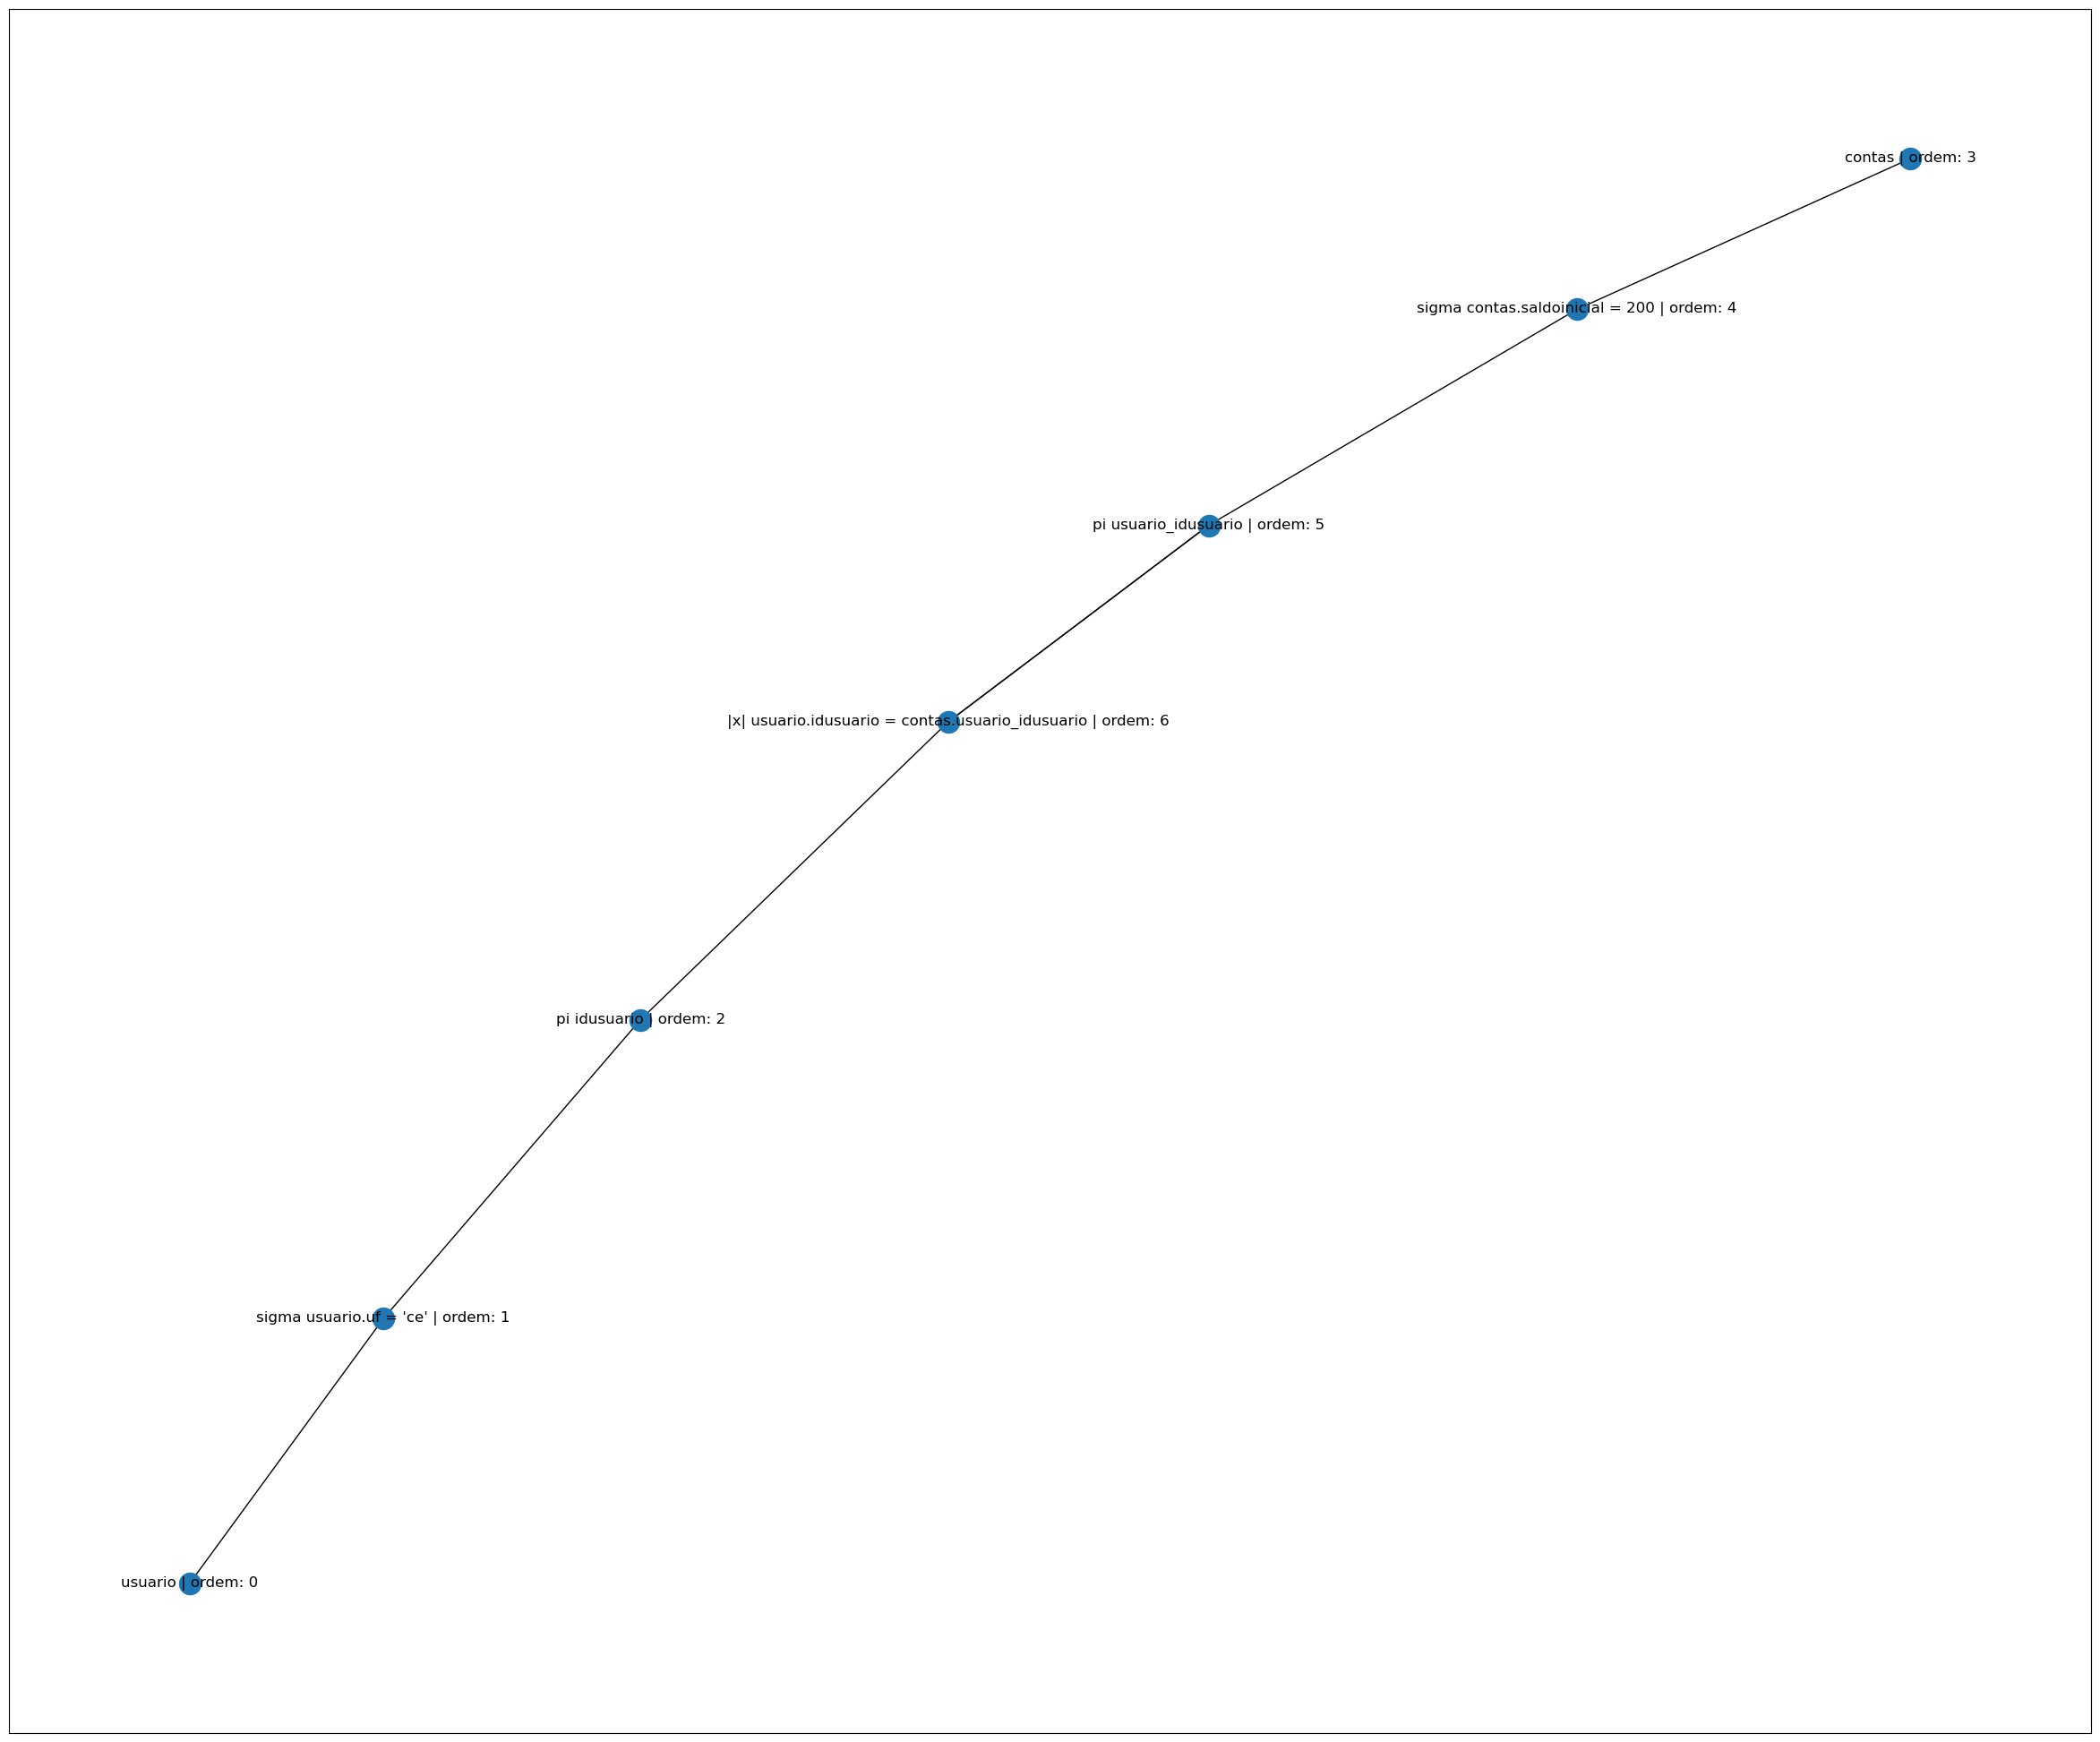

Deu erro!
['usuario', "sigma usuario.uf = 'ce'", 'pi idusuario', 'contas', 'sigma contas.saldoinicial = 200', 'pi usuario_idusuario', '|x| usuario.idusuario = contas.usuario_idusuario']


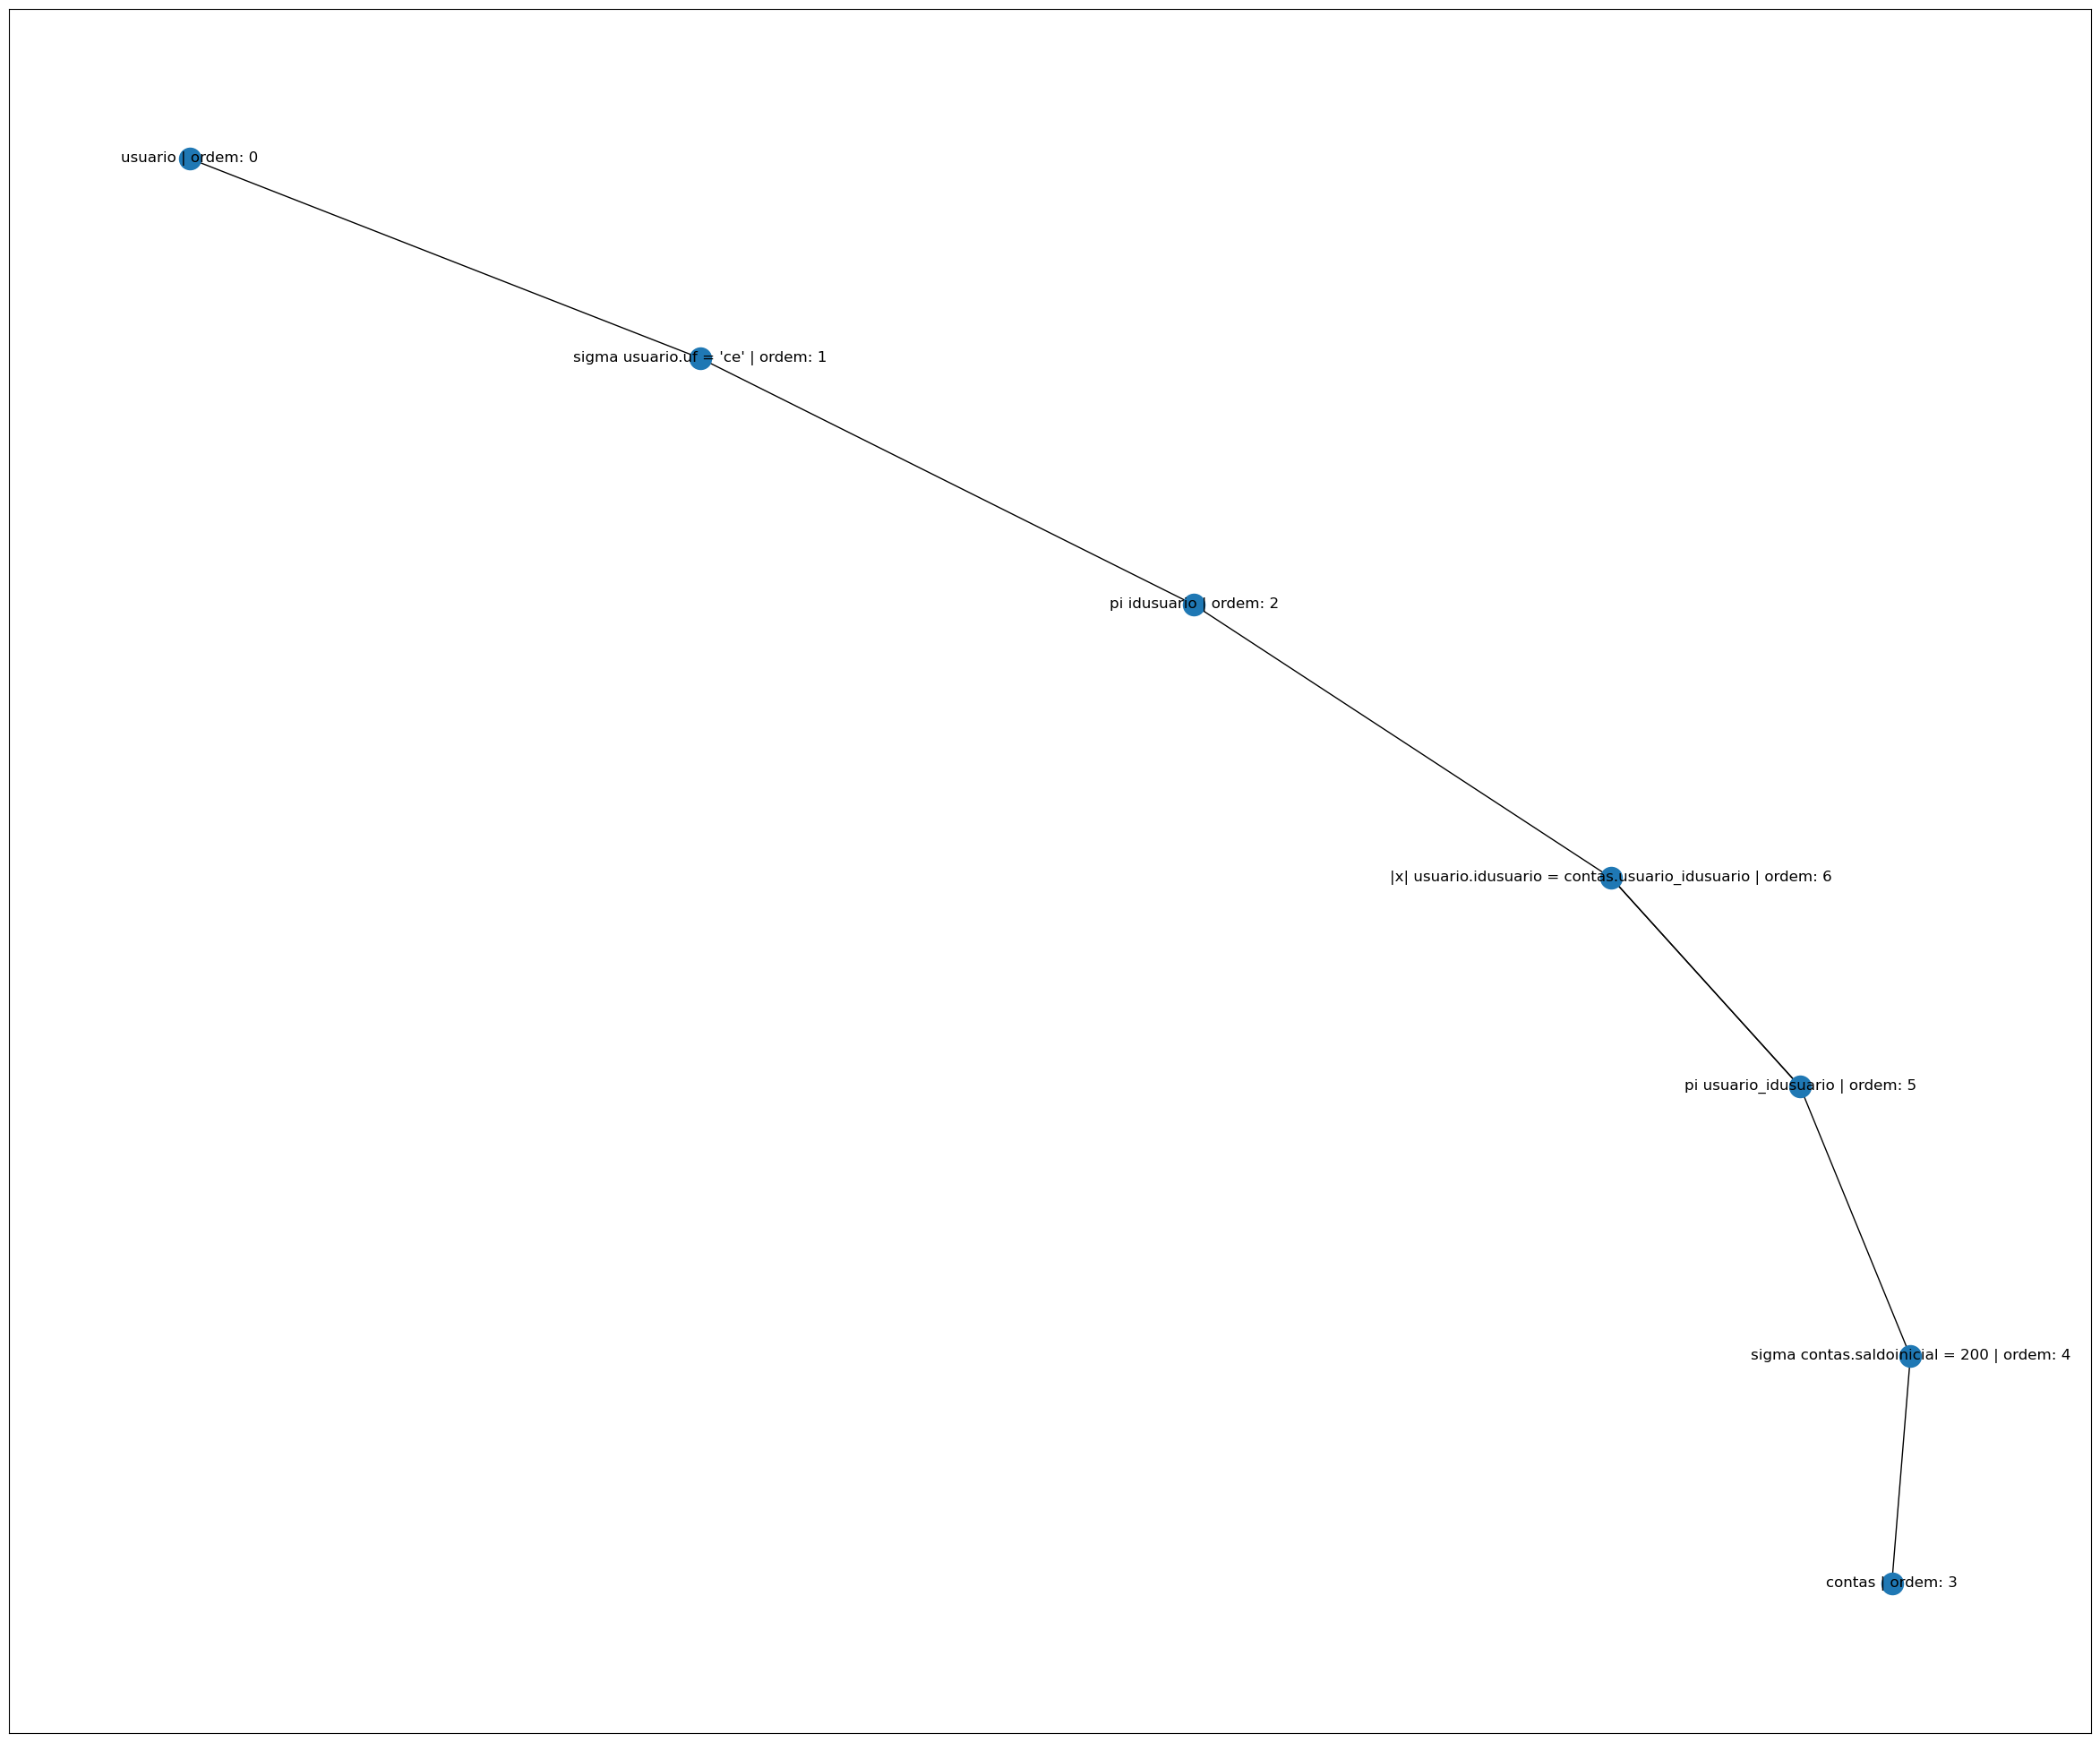

Deu erro!
Deu erro!
['usuario', "sigma uf = 'ce'", 'pi idusuario', 'contas', 'sigma saldoinicial = 200', 'pi usuario_idusuario , tipoconta_idtipoconta , idconta', '|x| usuario.idusuario = contas.usuario_idusuario', 'tipoconta', 'pi idtipoconta', '|x| tipoconta.idtipoconta = contas.tipoconta_idtipoconta', 'movimentacao', 'pi contas_idconta', '|x| movimentacao.contas_idconta = contas.idconta']


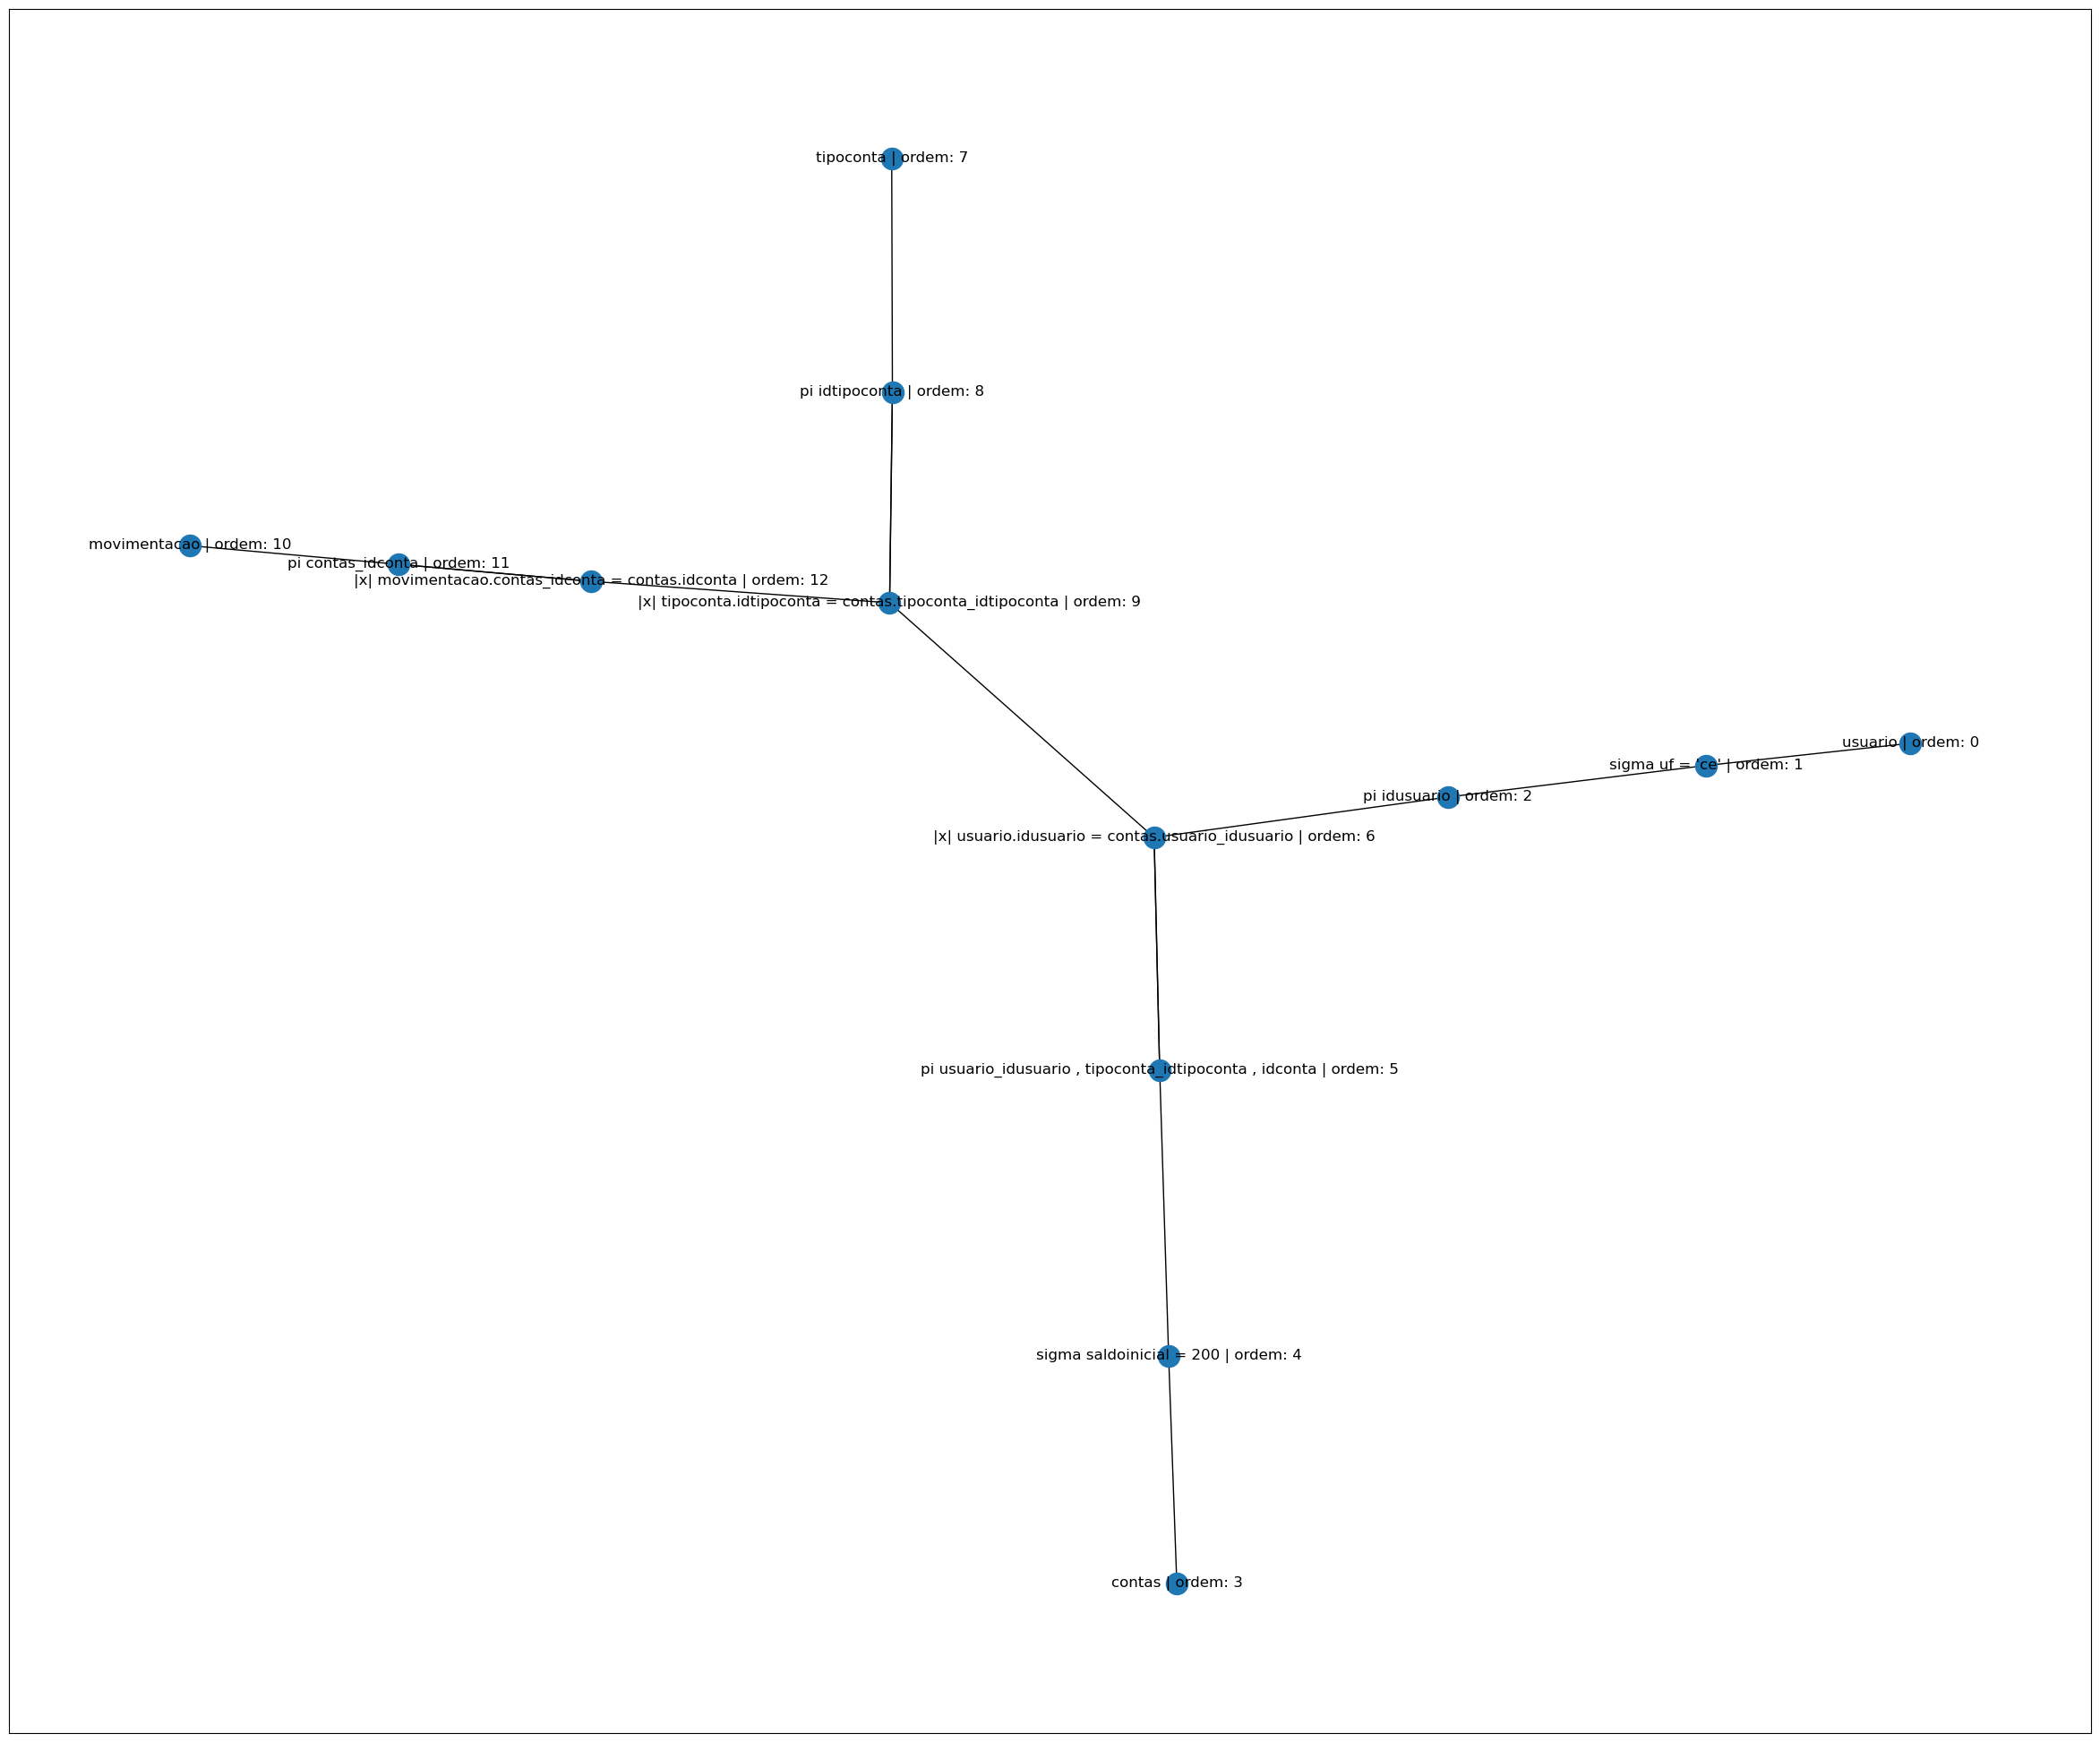

Deu erro!
Deu erro!
Deu erro!
Deu erro!
Deu erro!
['usuario', "sigma uf = 'ce'", 'pi idusuario', 'contas', 'sigma contas.saldoinicial = 200', 'pi idconta , usuario_idusuario', '|x| idusuario = usuario_idusuario', 'pi idconta , idusuario']


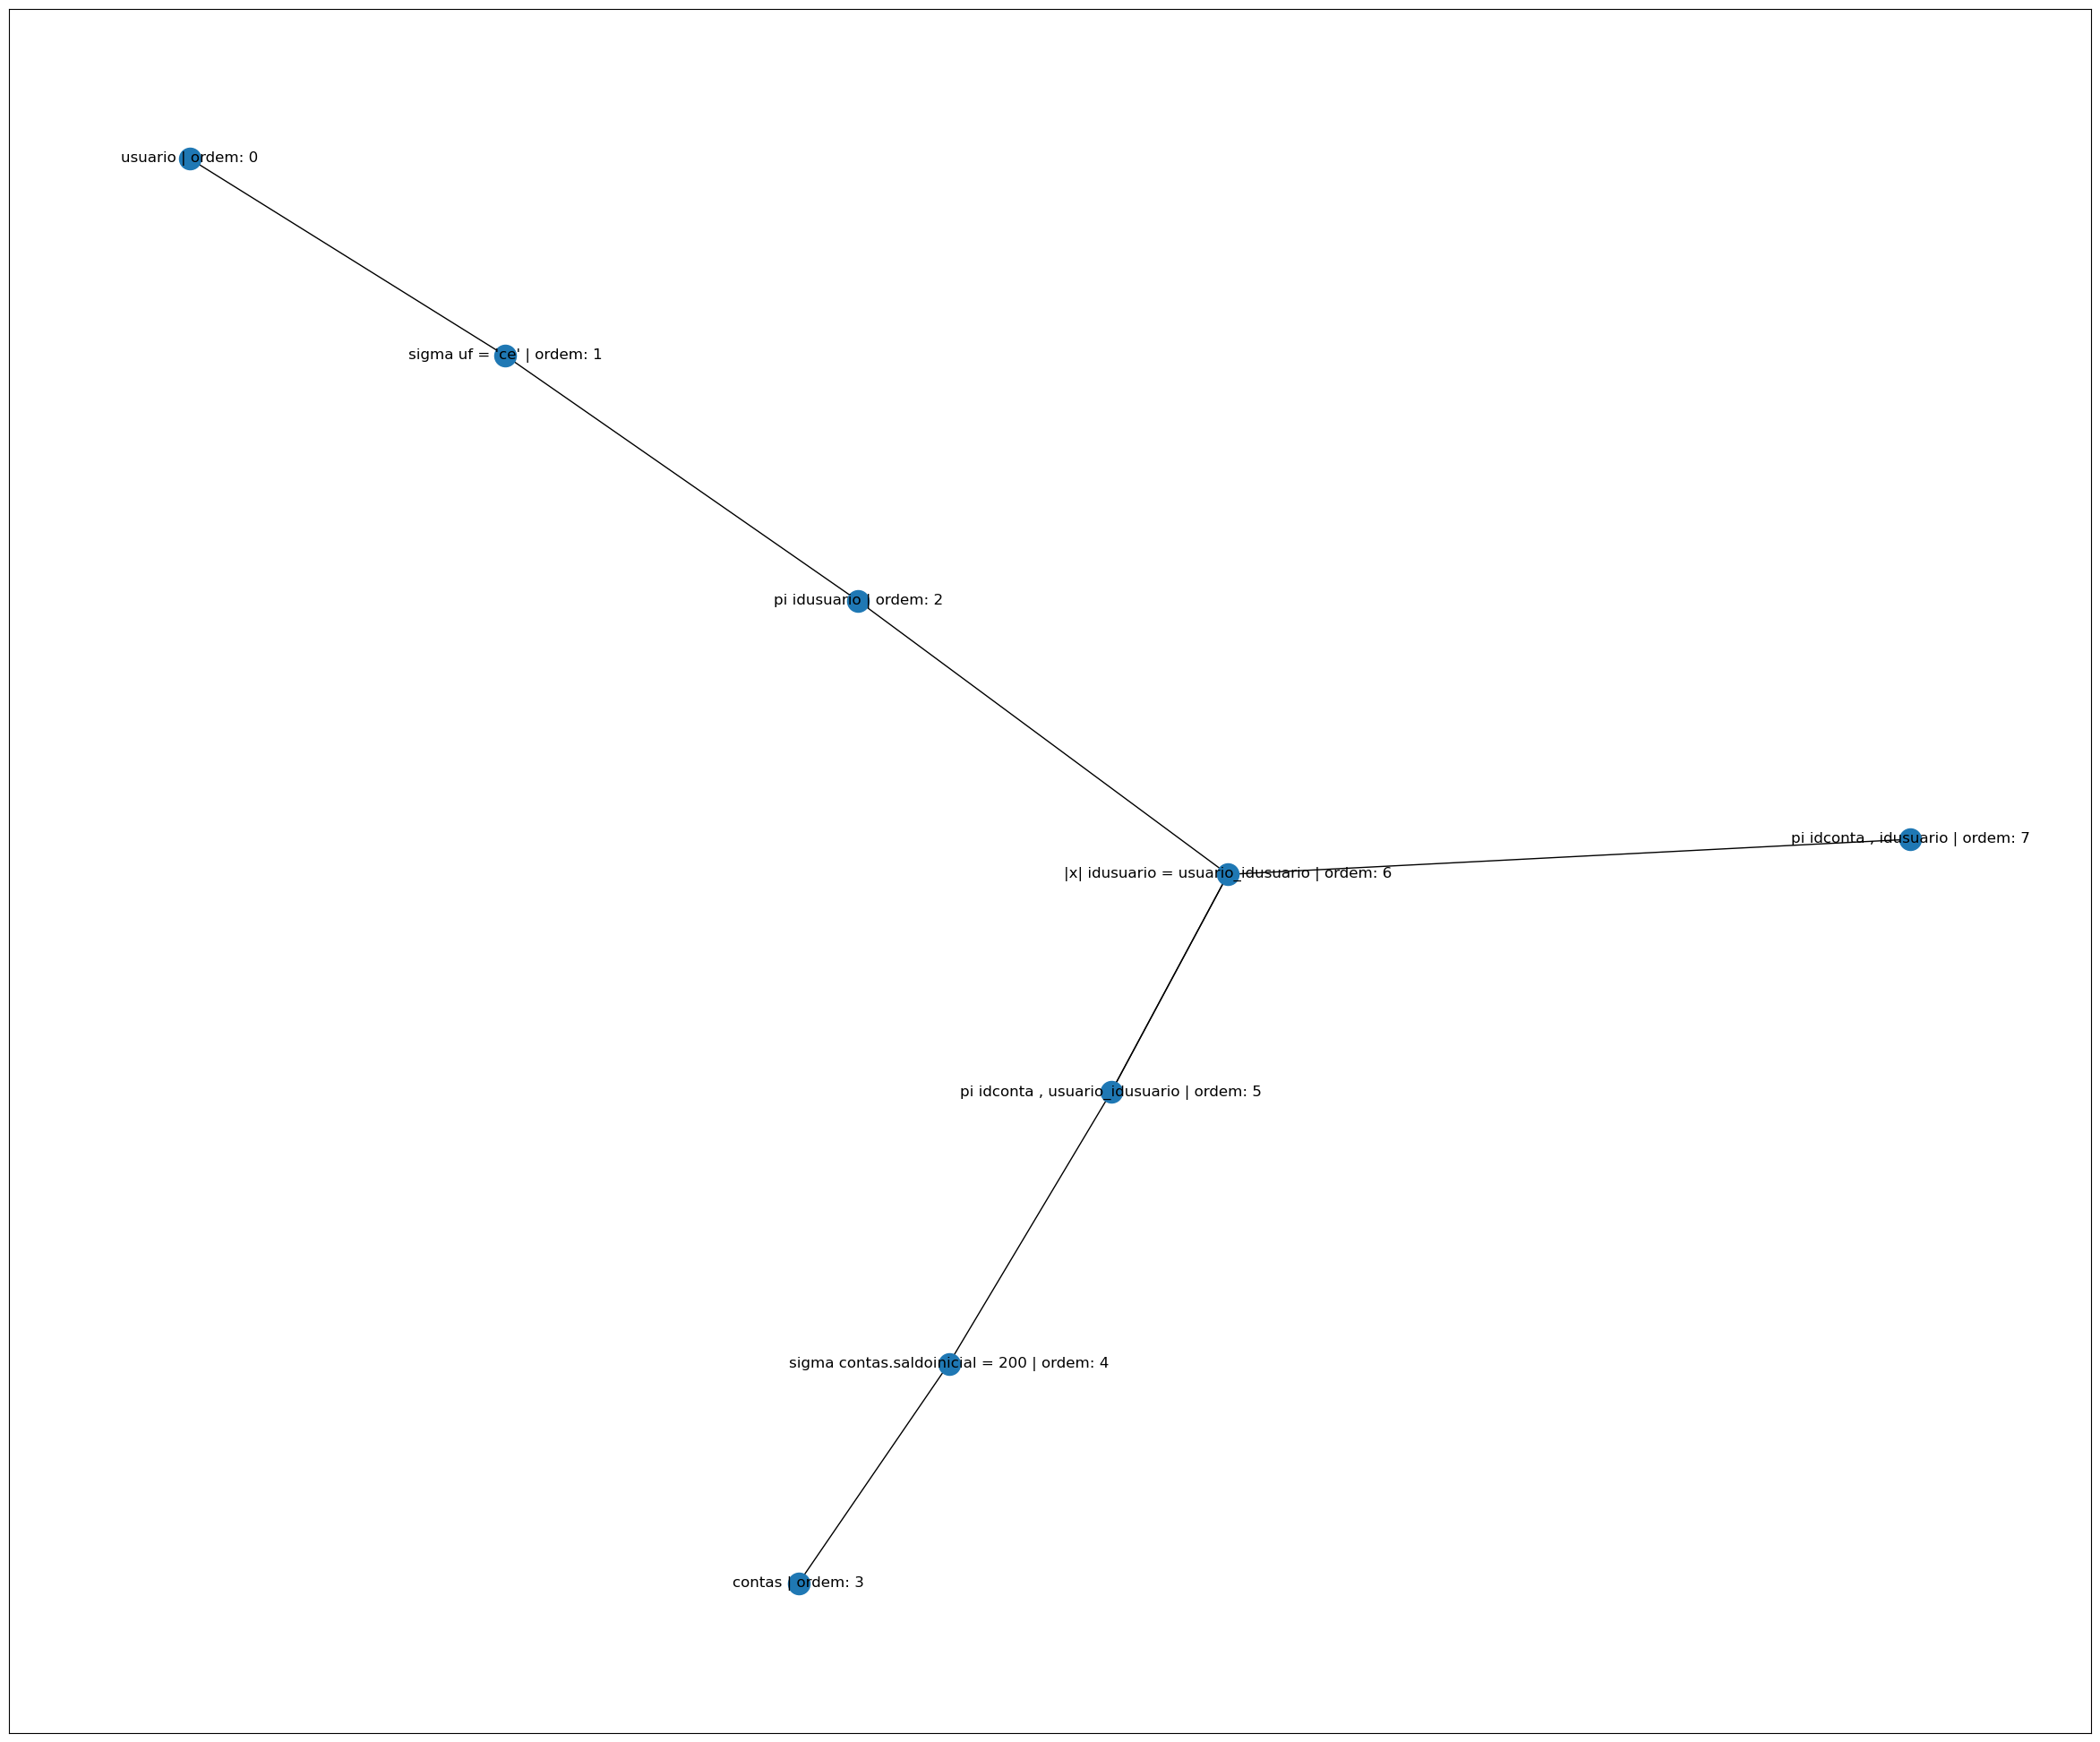

Deu erro!
Deu erro!
Deu erro!
Deu erro!
Deu erro!
['usuario', "sigma uf in 'ce' ( usuario )", 'pi idusuario', 'usuario |x| idusuario = usuario_idusuario contas', 'sigma contas.saldoinicial = 200', 'pi idconta , usuario_idusuario', 'contas', '|x| idusuario = usuario_idusuario', 'contas.saldoinicial = 200', 'pi idconta , idusuario']


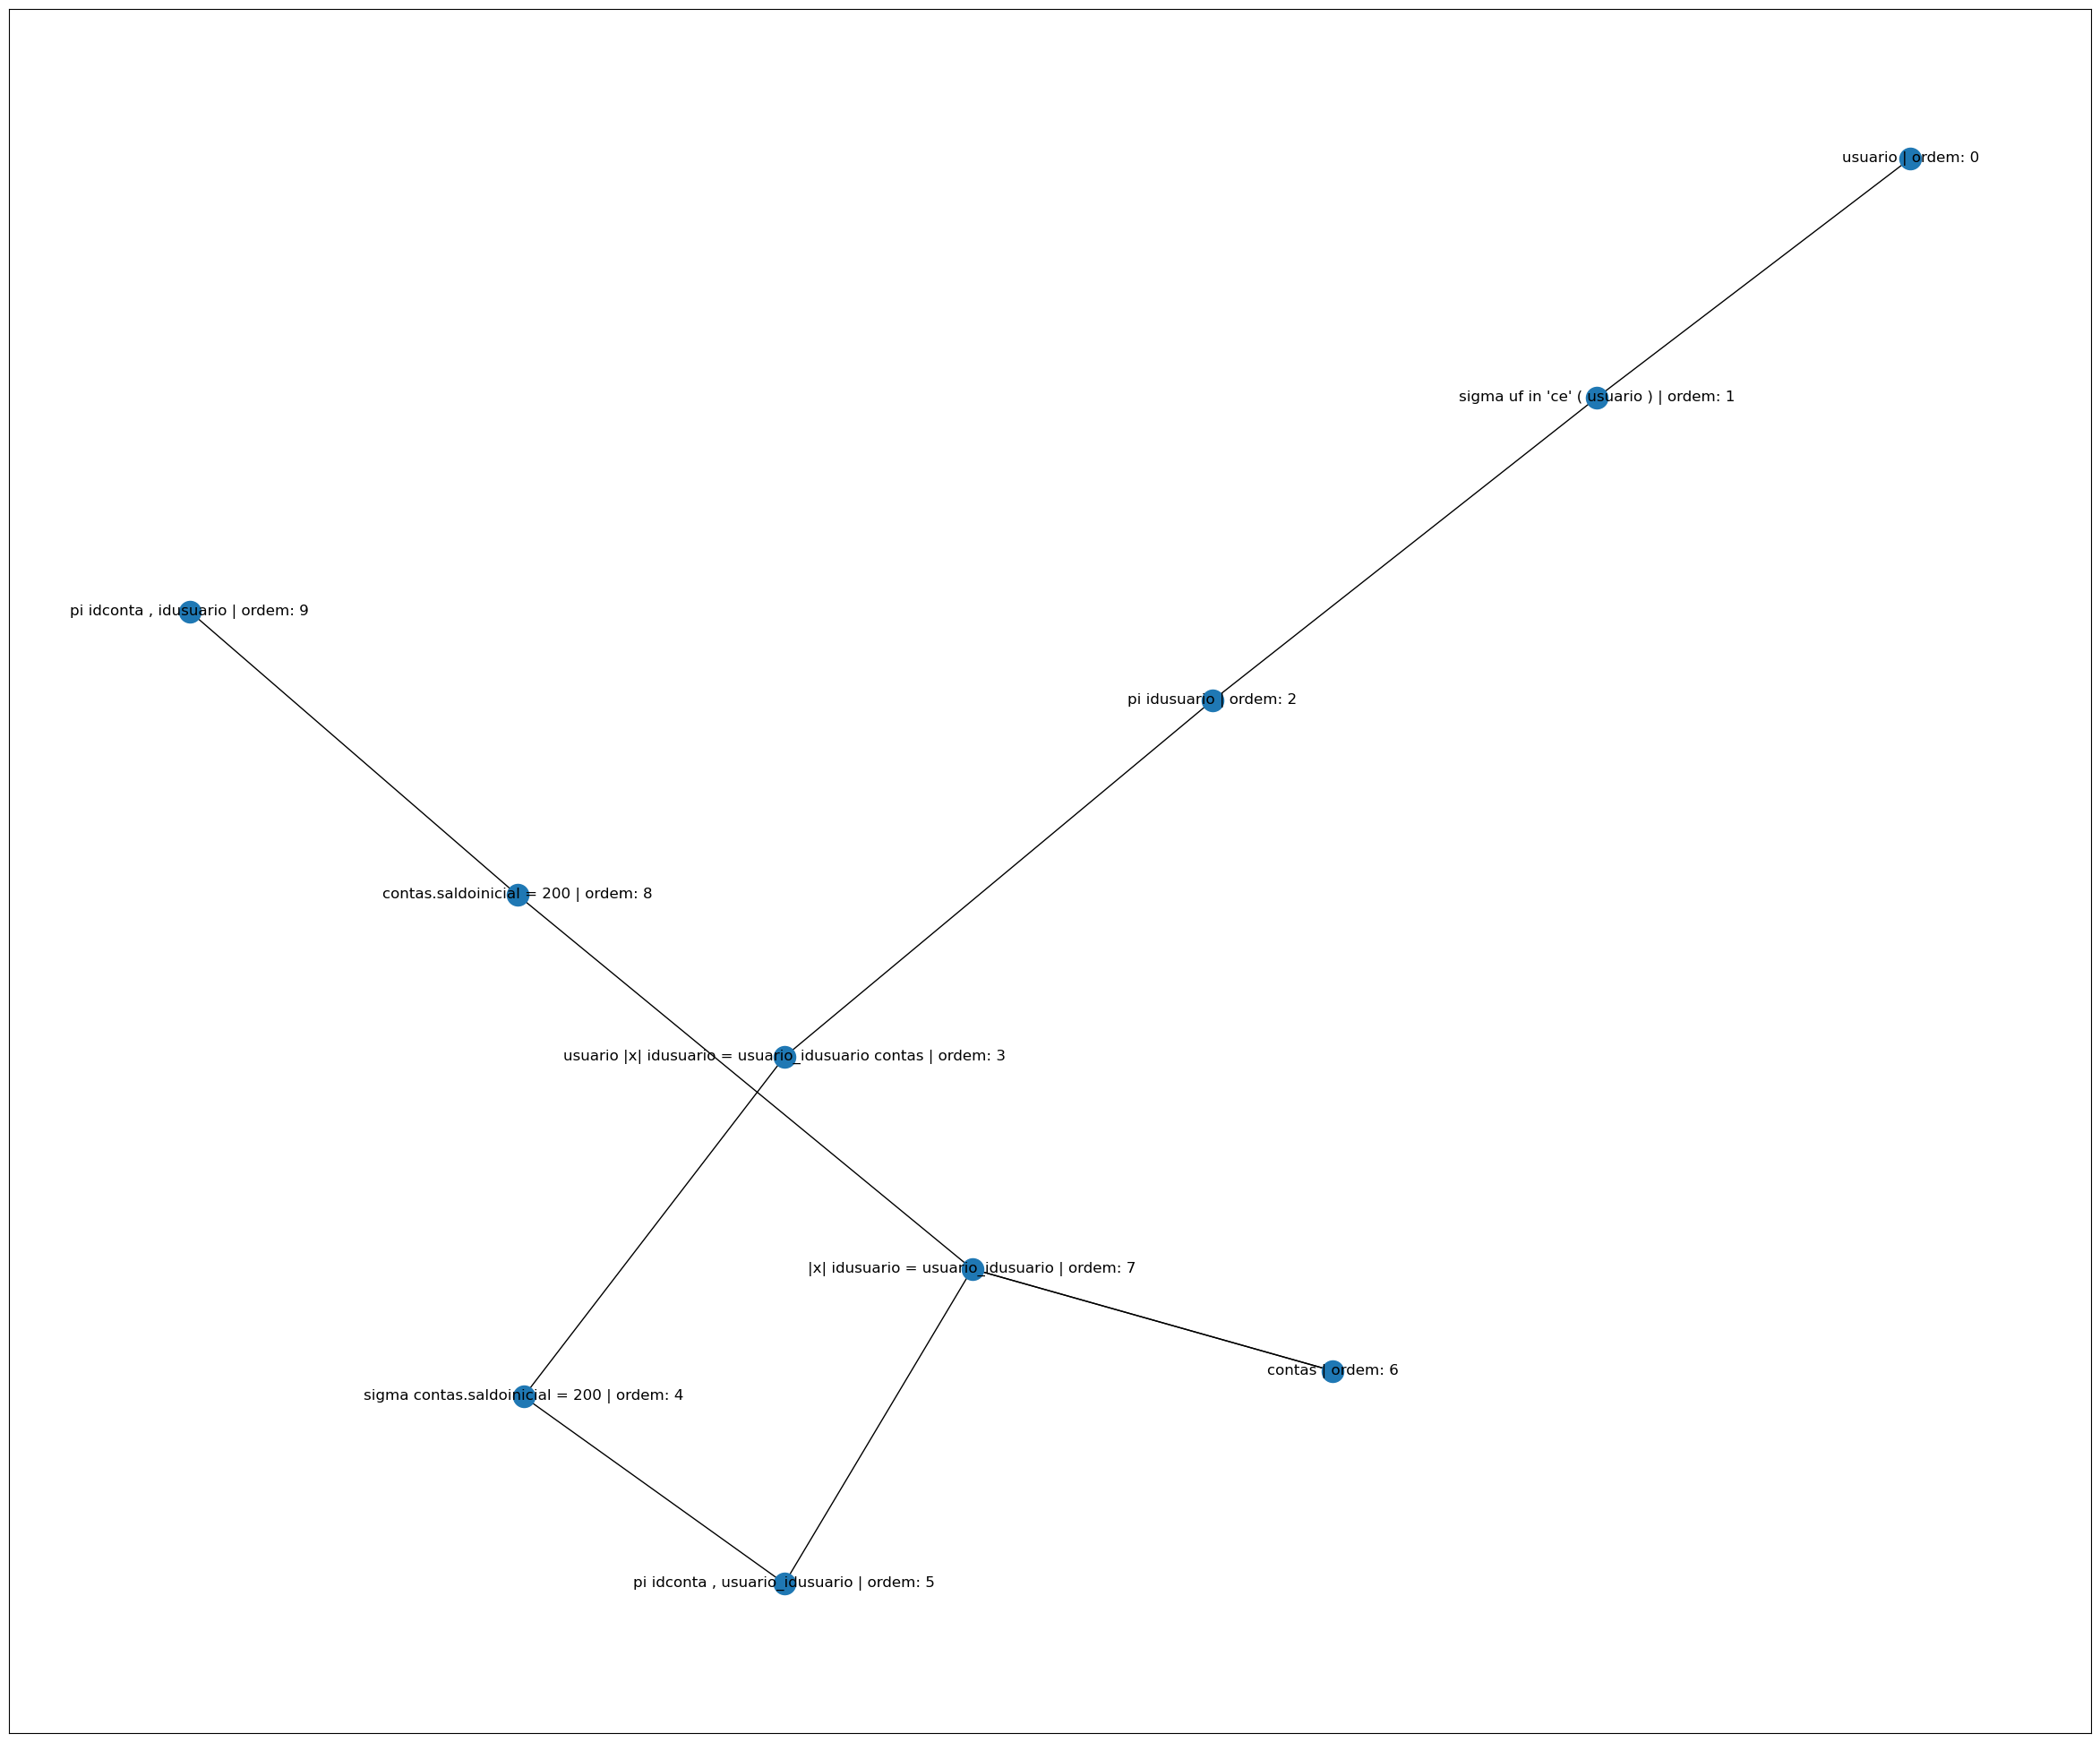

Deu erro!
Deu erro!
Deu erro!
Deu erro!
Deu erro!
Deu erro!
Deu erro!
['usuario', "sigma usuario.uf = 'ce' a"]


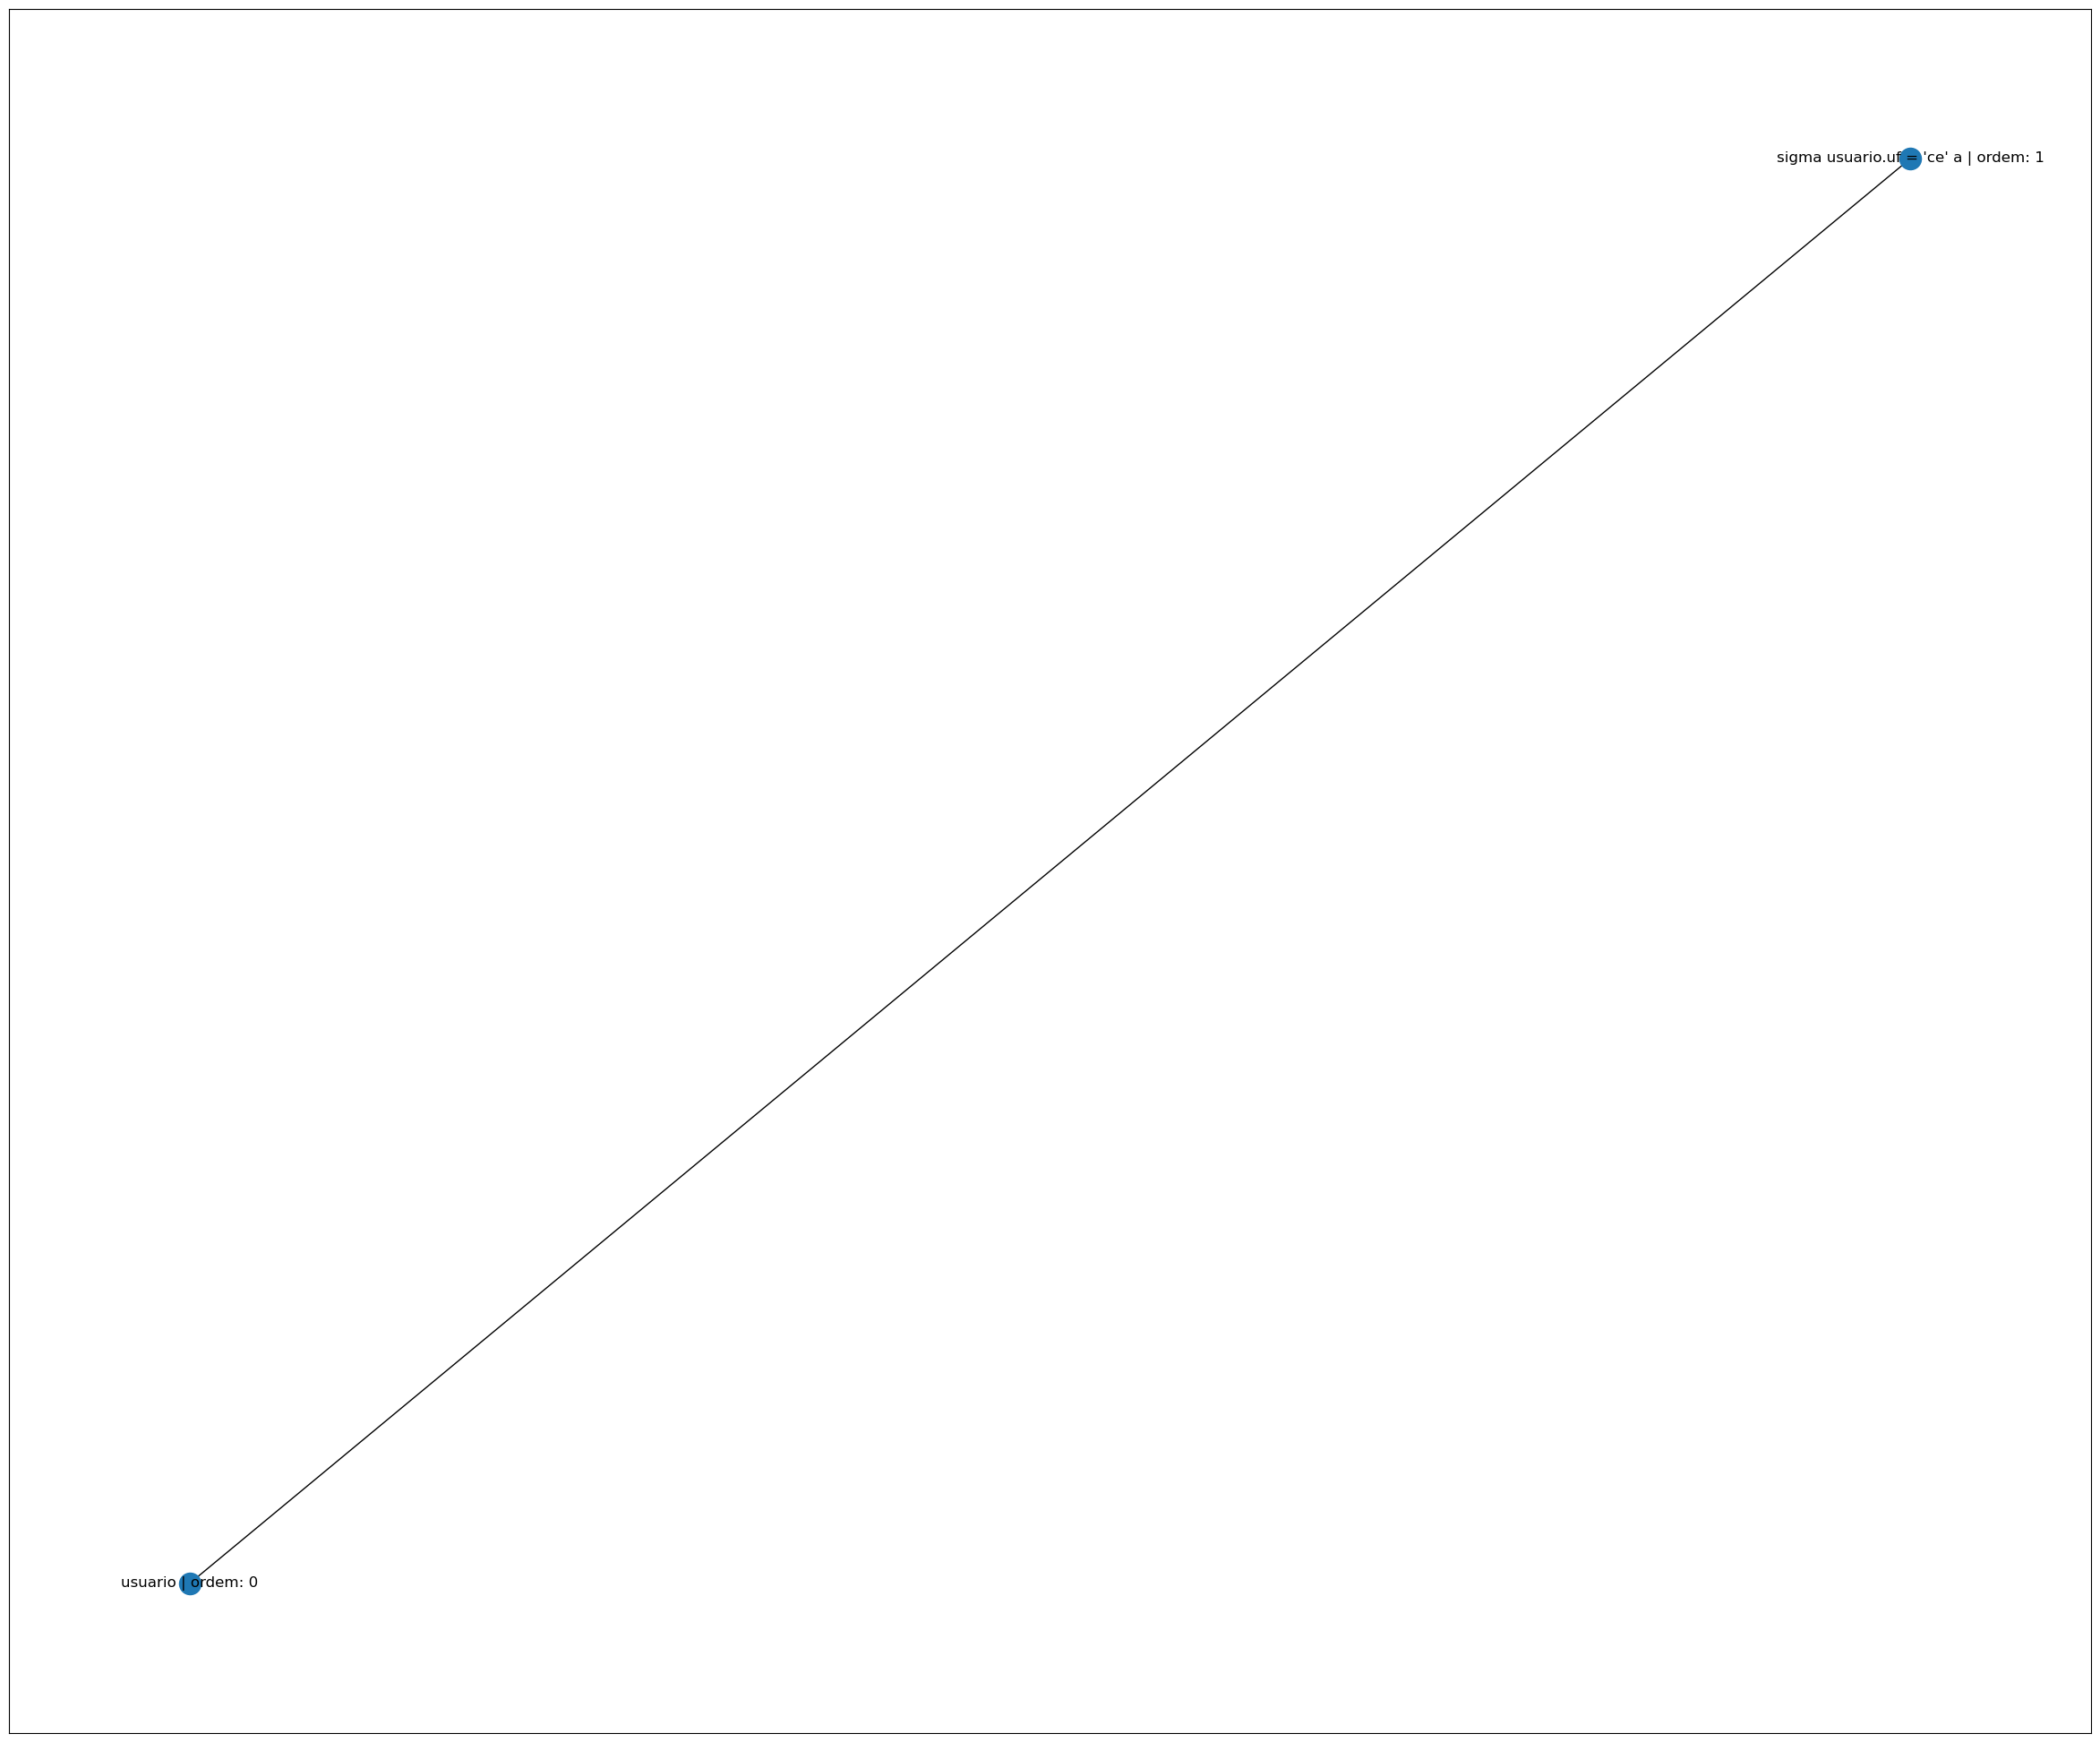

['usuario', "sigma usuario.uf = 'ce'"]


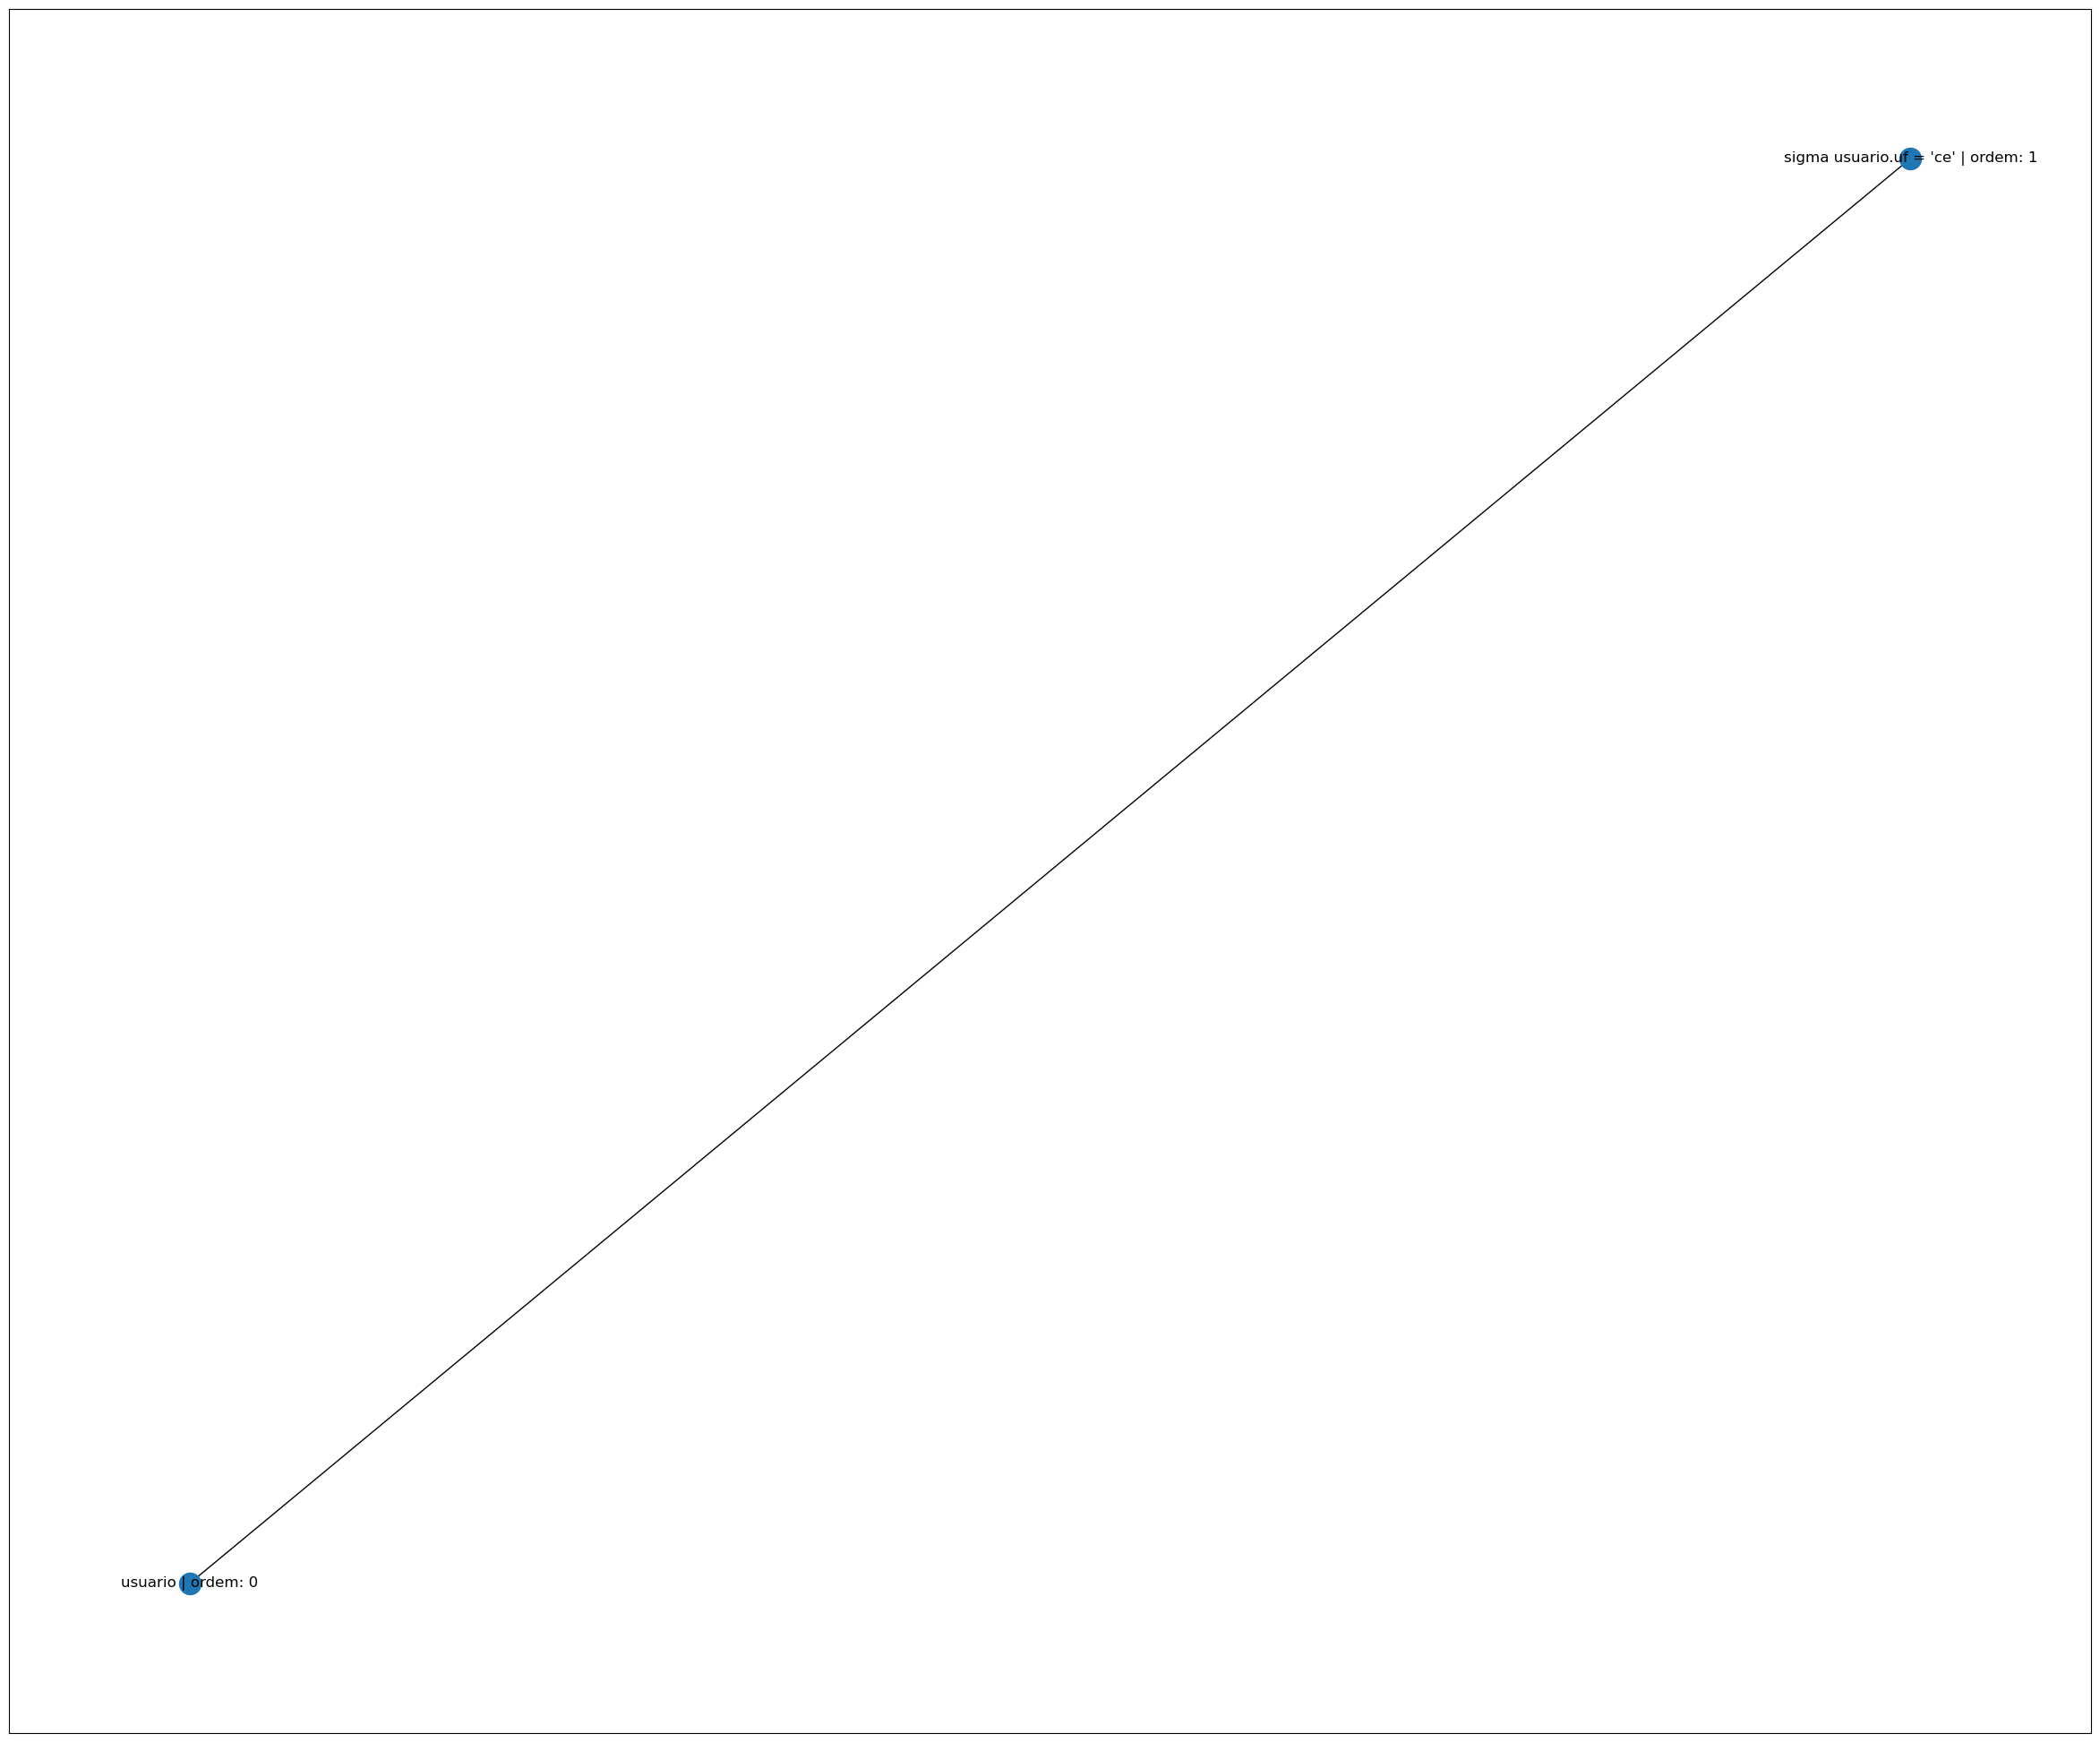

['usuario', "sigma usuario.uf = 'ce' $$"]
Deu erro!
['usuario', "sigma usuario.uf = 'ce' $"]


ValueError: 
sigma usuario.uf = 'ce' $$ | ordem: 1
                        ^
ParseException: Expected end of text, found '$'  (at char 24), (line:1, col:25)

<Figure size 3000x2500 with 1 Axes>

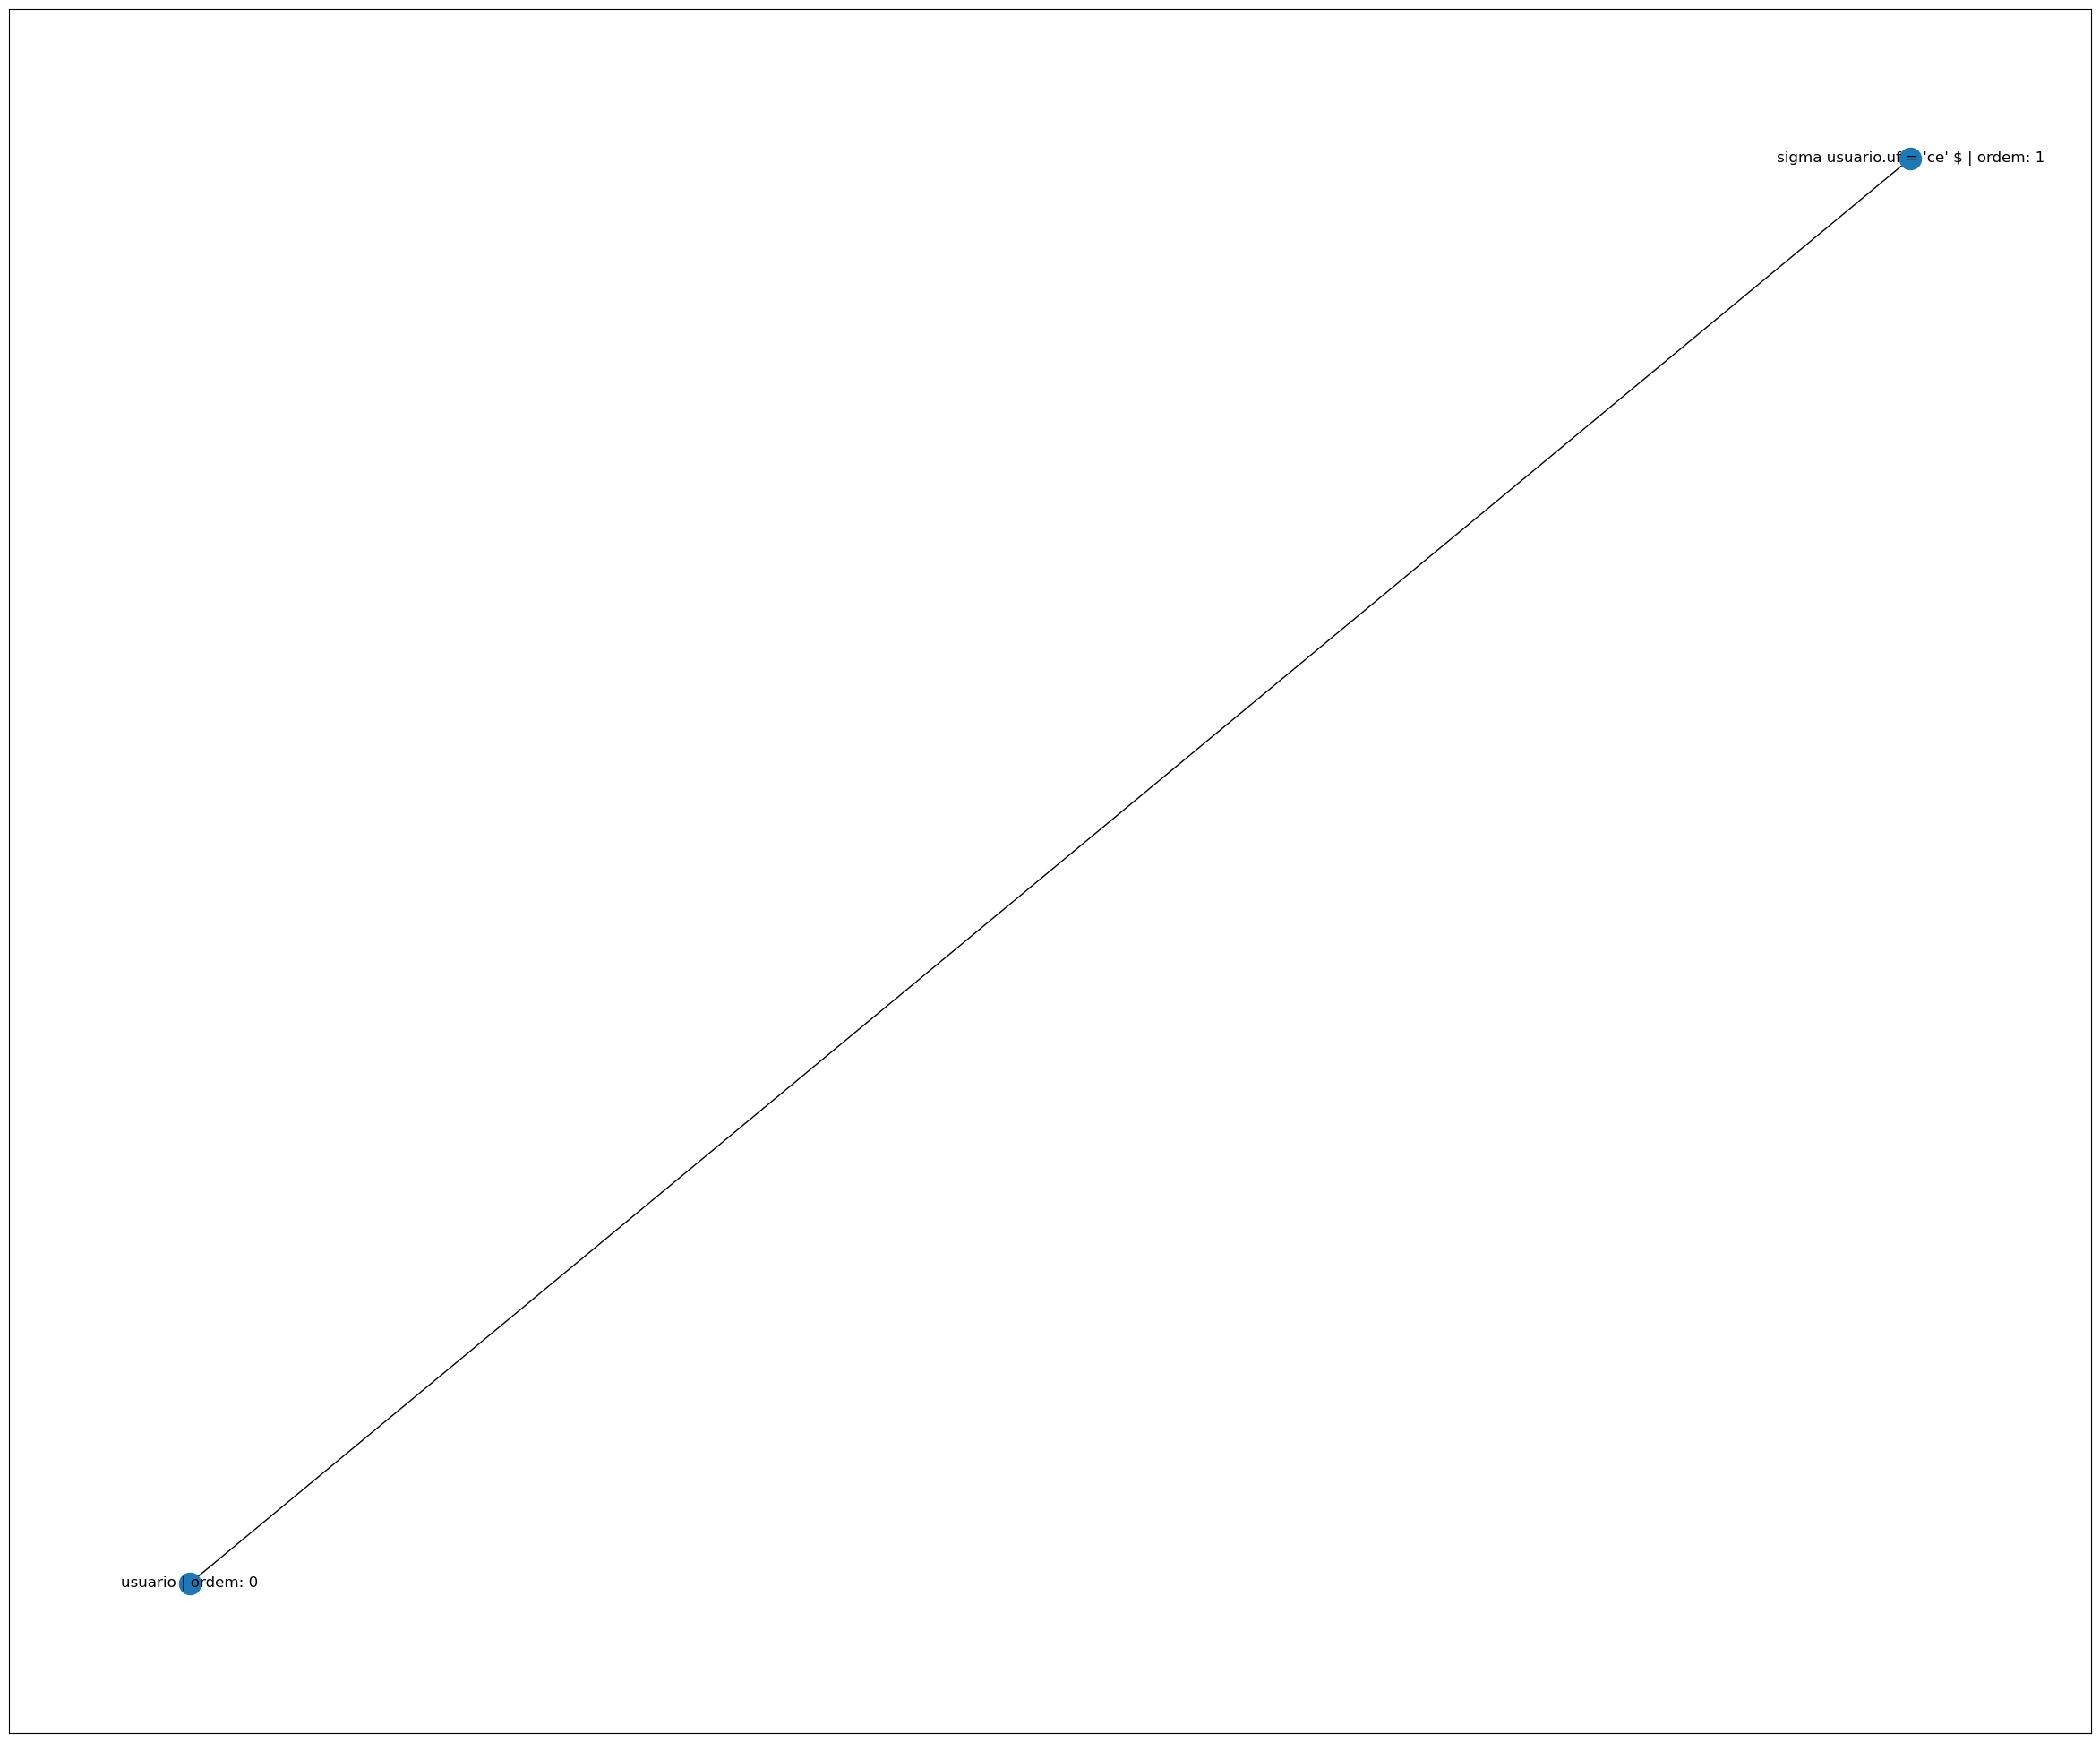

['usuario', "sigma usuario.uf = 'ce' $##"]


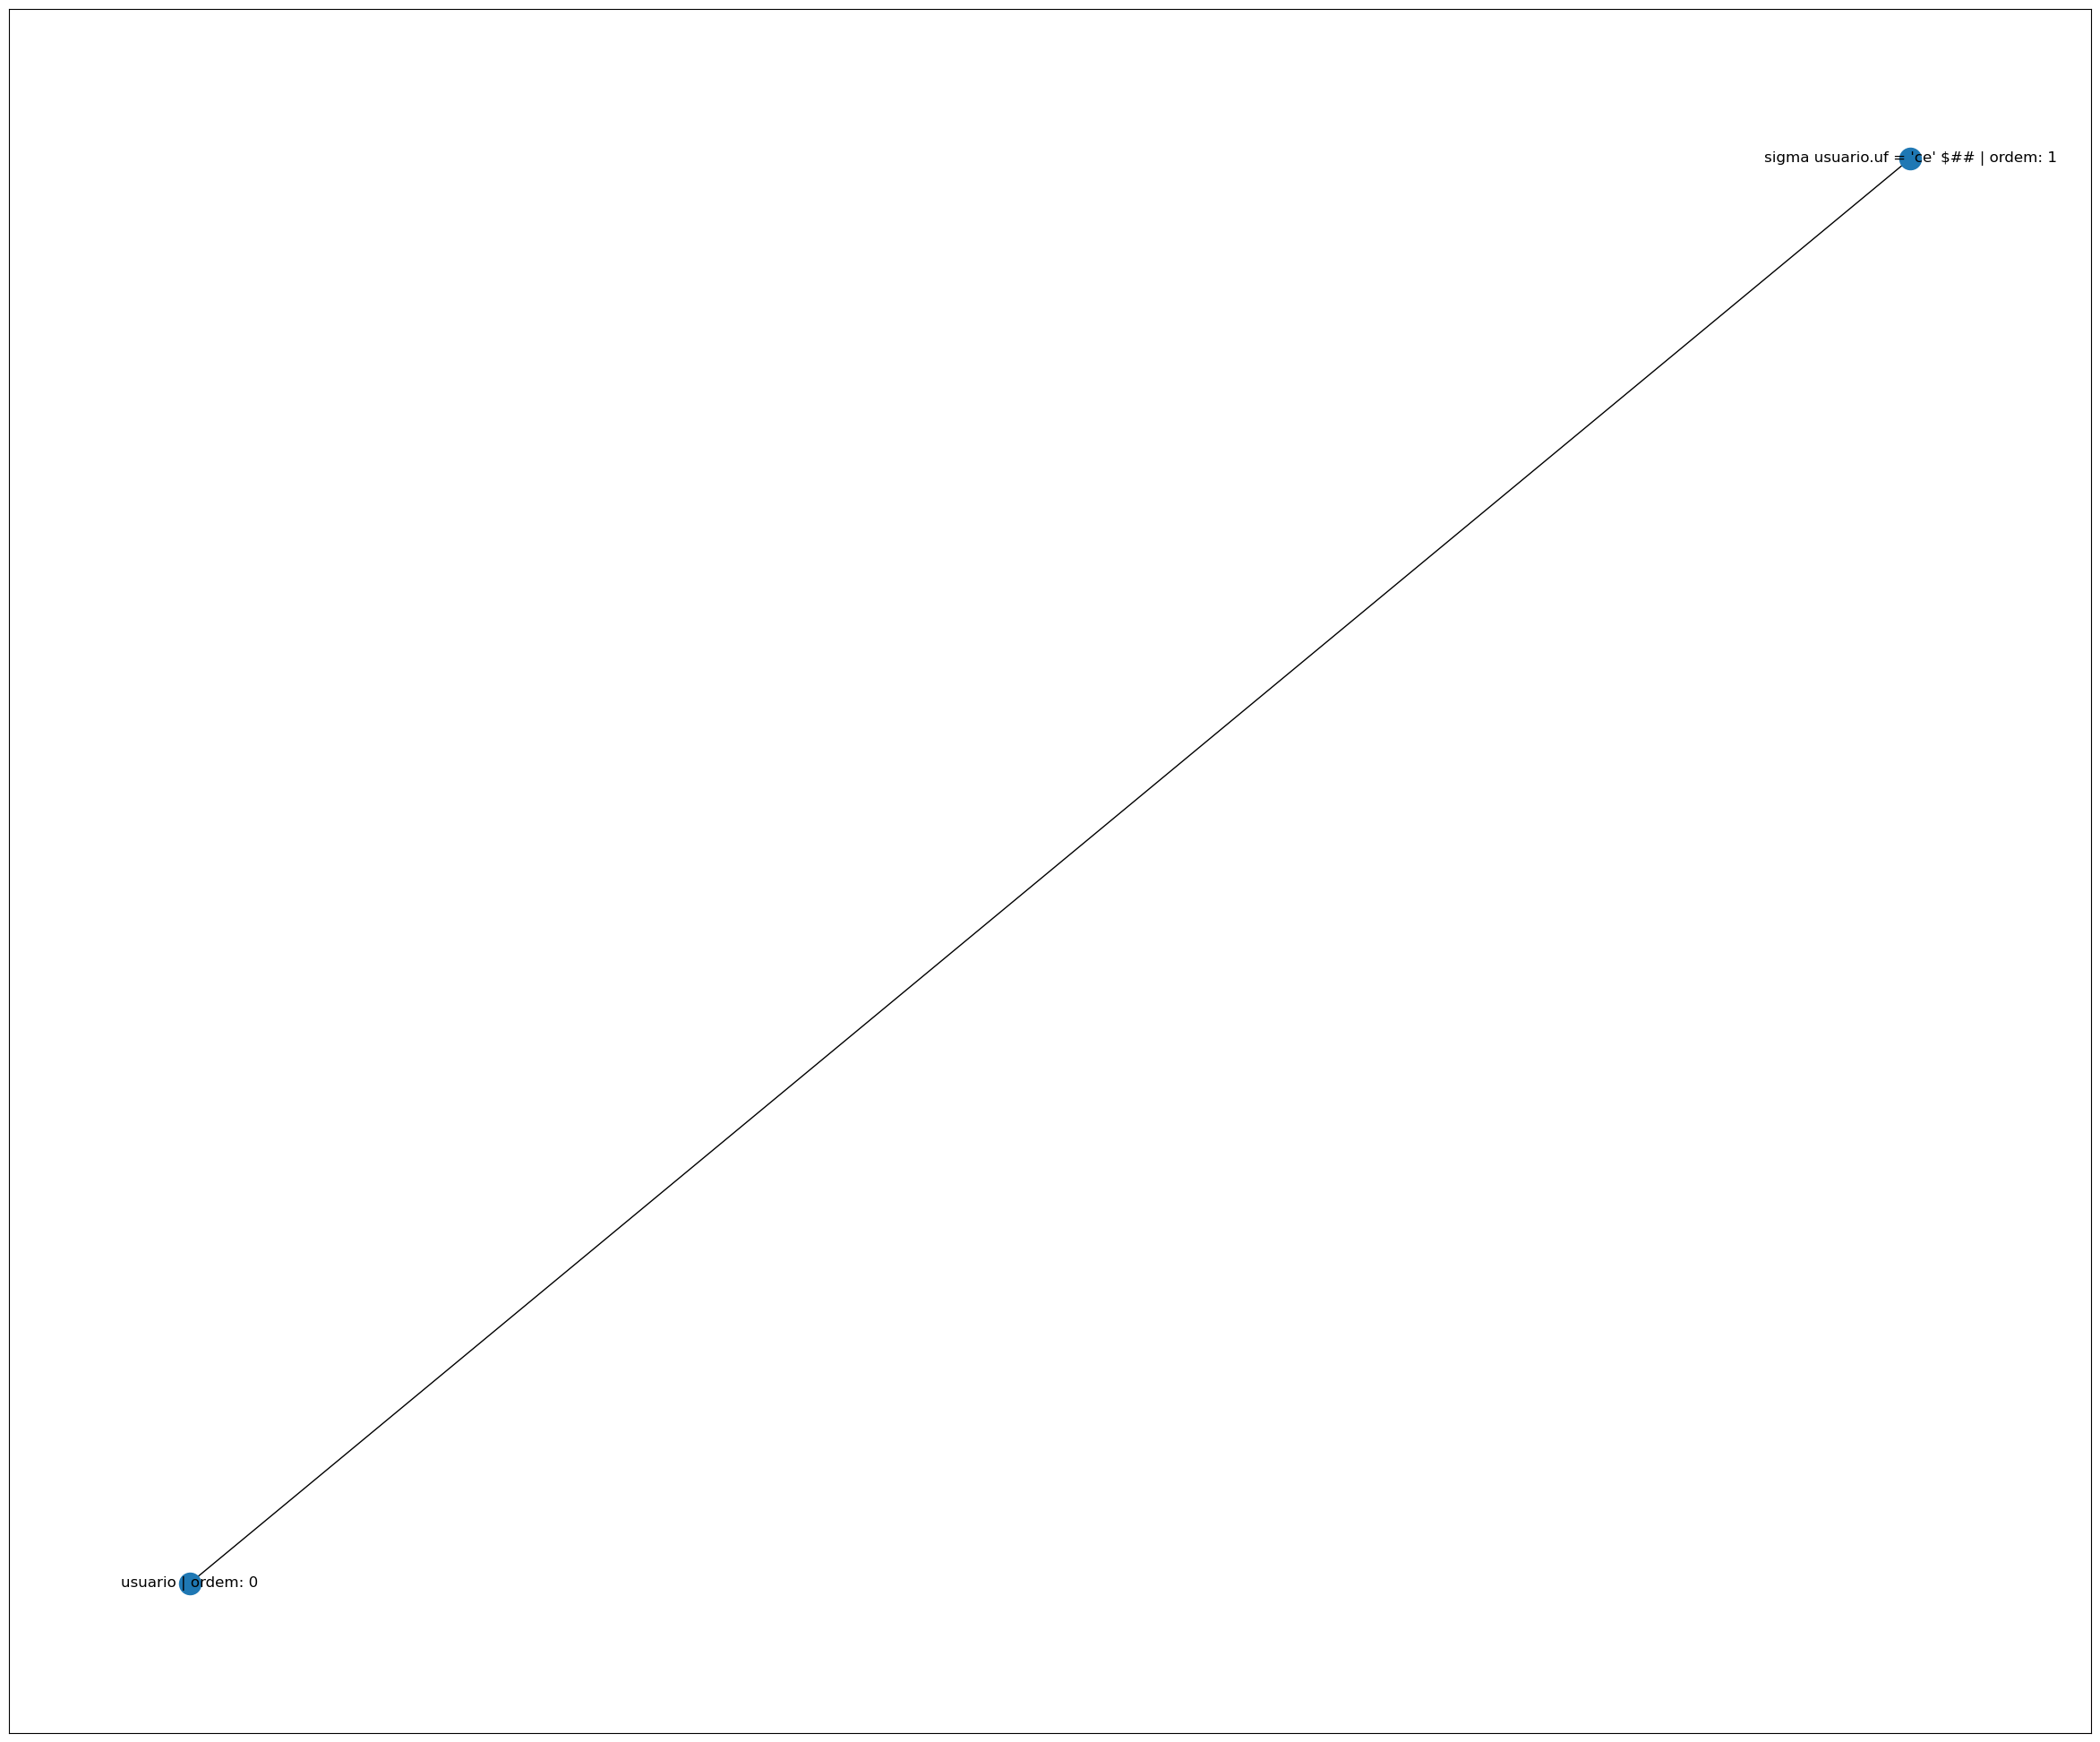

['usuario', "sigma usuario.uf = 'ce' $##"]


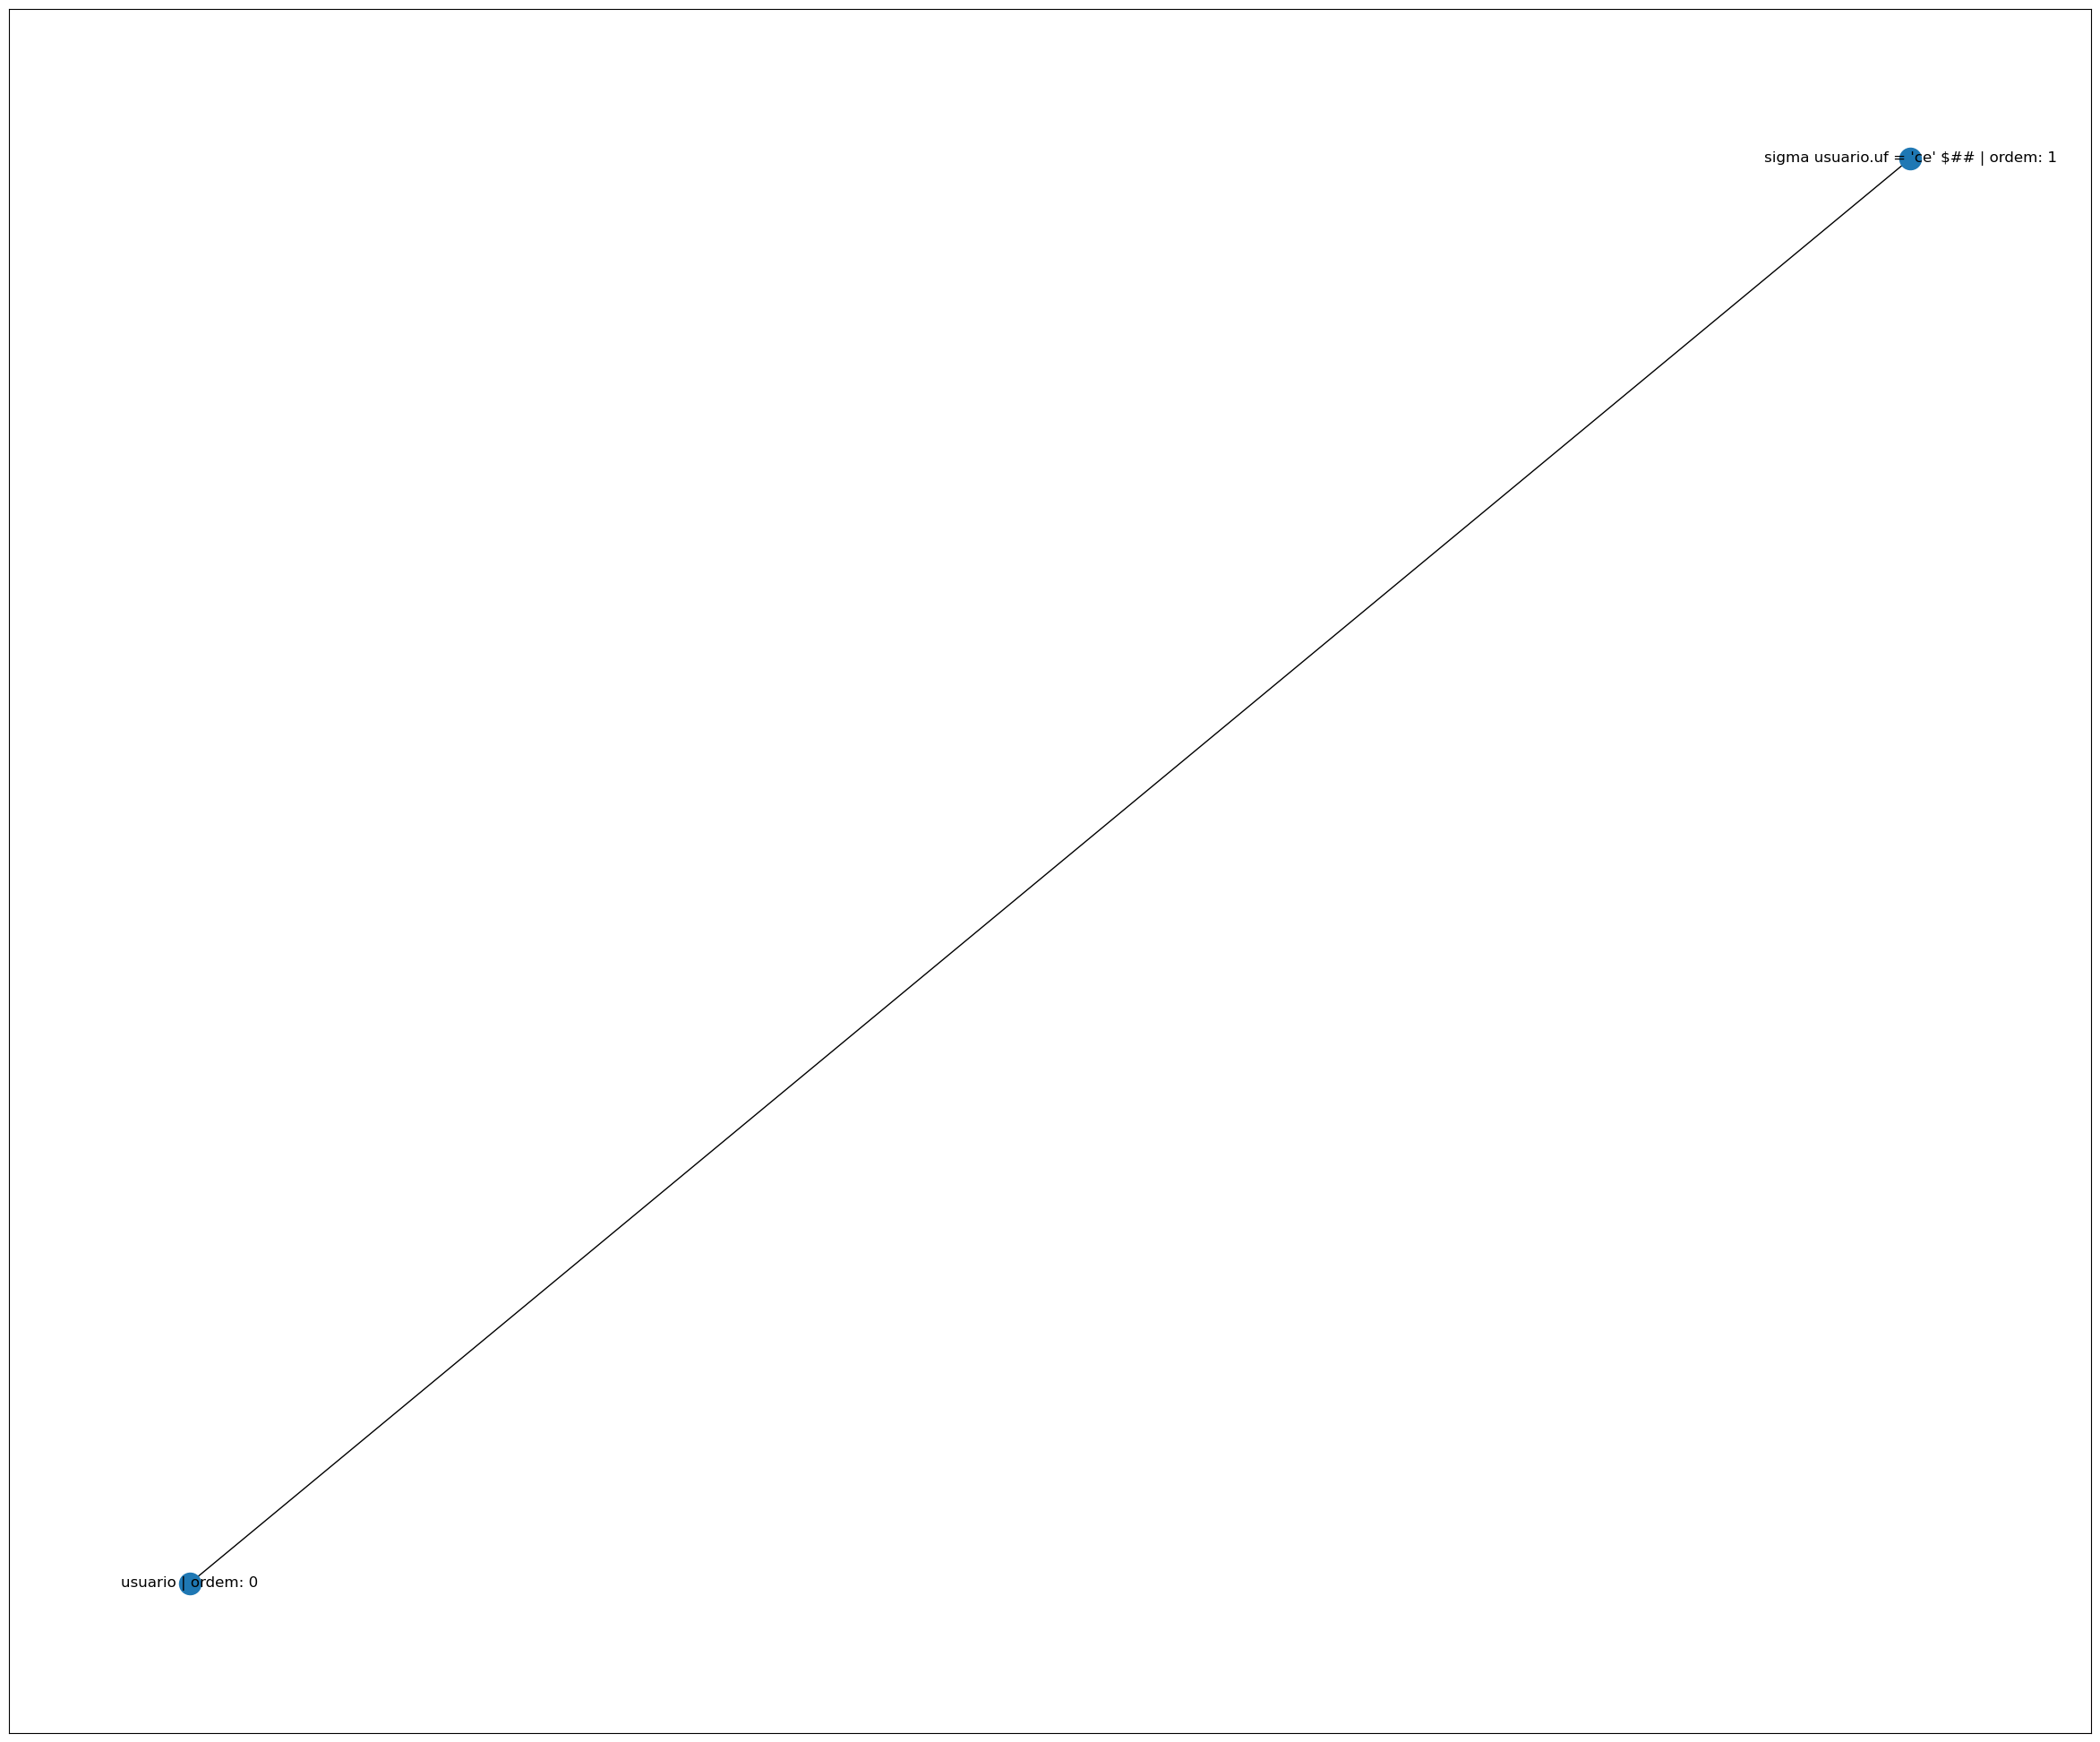

Deu erro!
Deu erro!
Deu erro!
Deu erro!
Deu erro!
Deu erro!
Deu erro!
Deu erro!
Deu erro!
Deu erro!
['usuario', "sigma usuario.uf = 'ce'"]


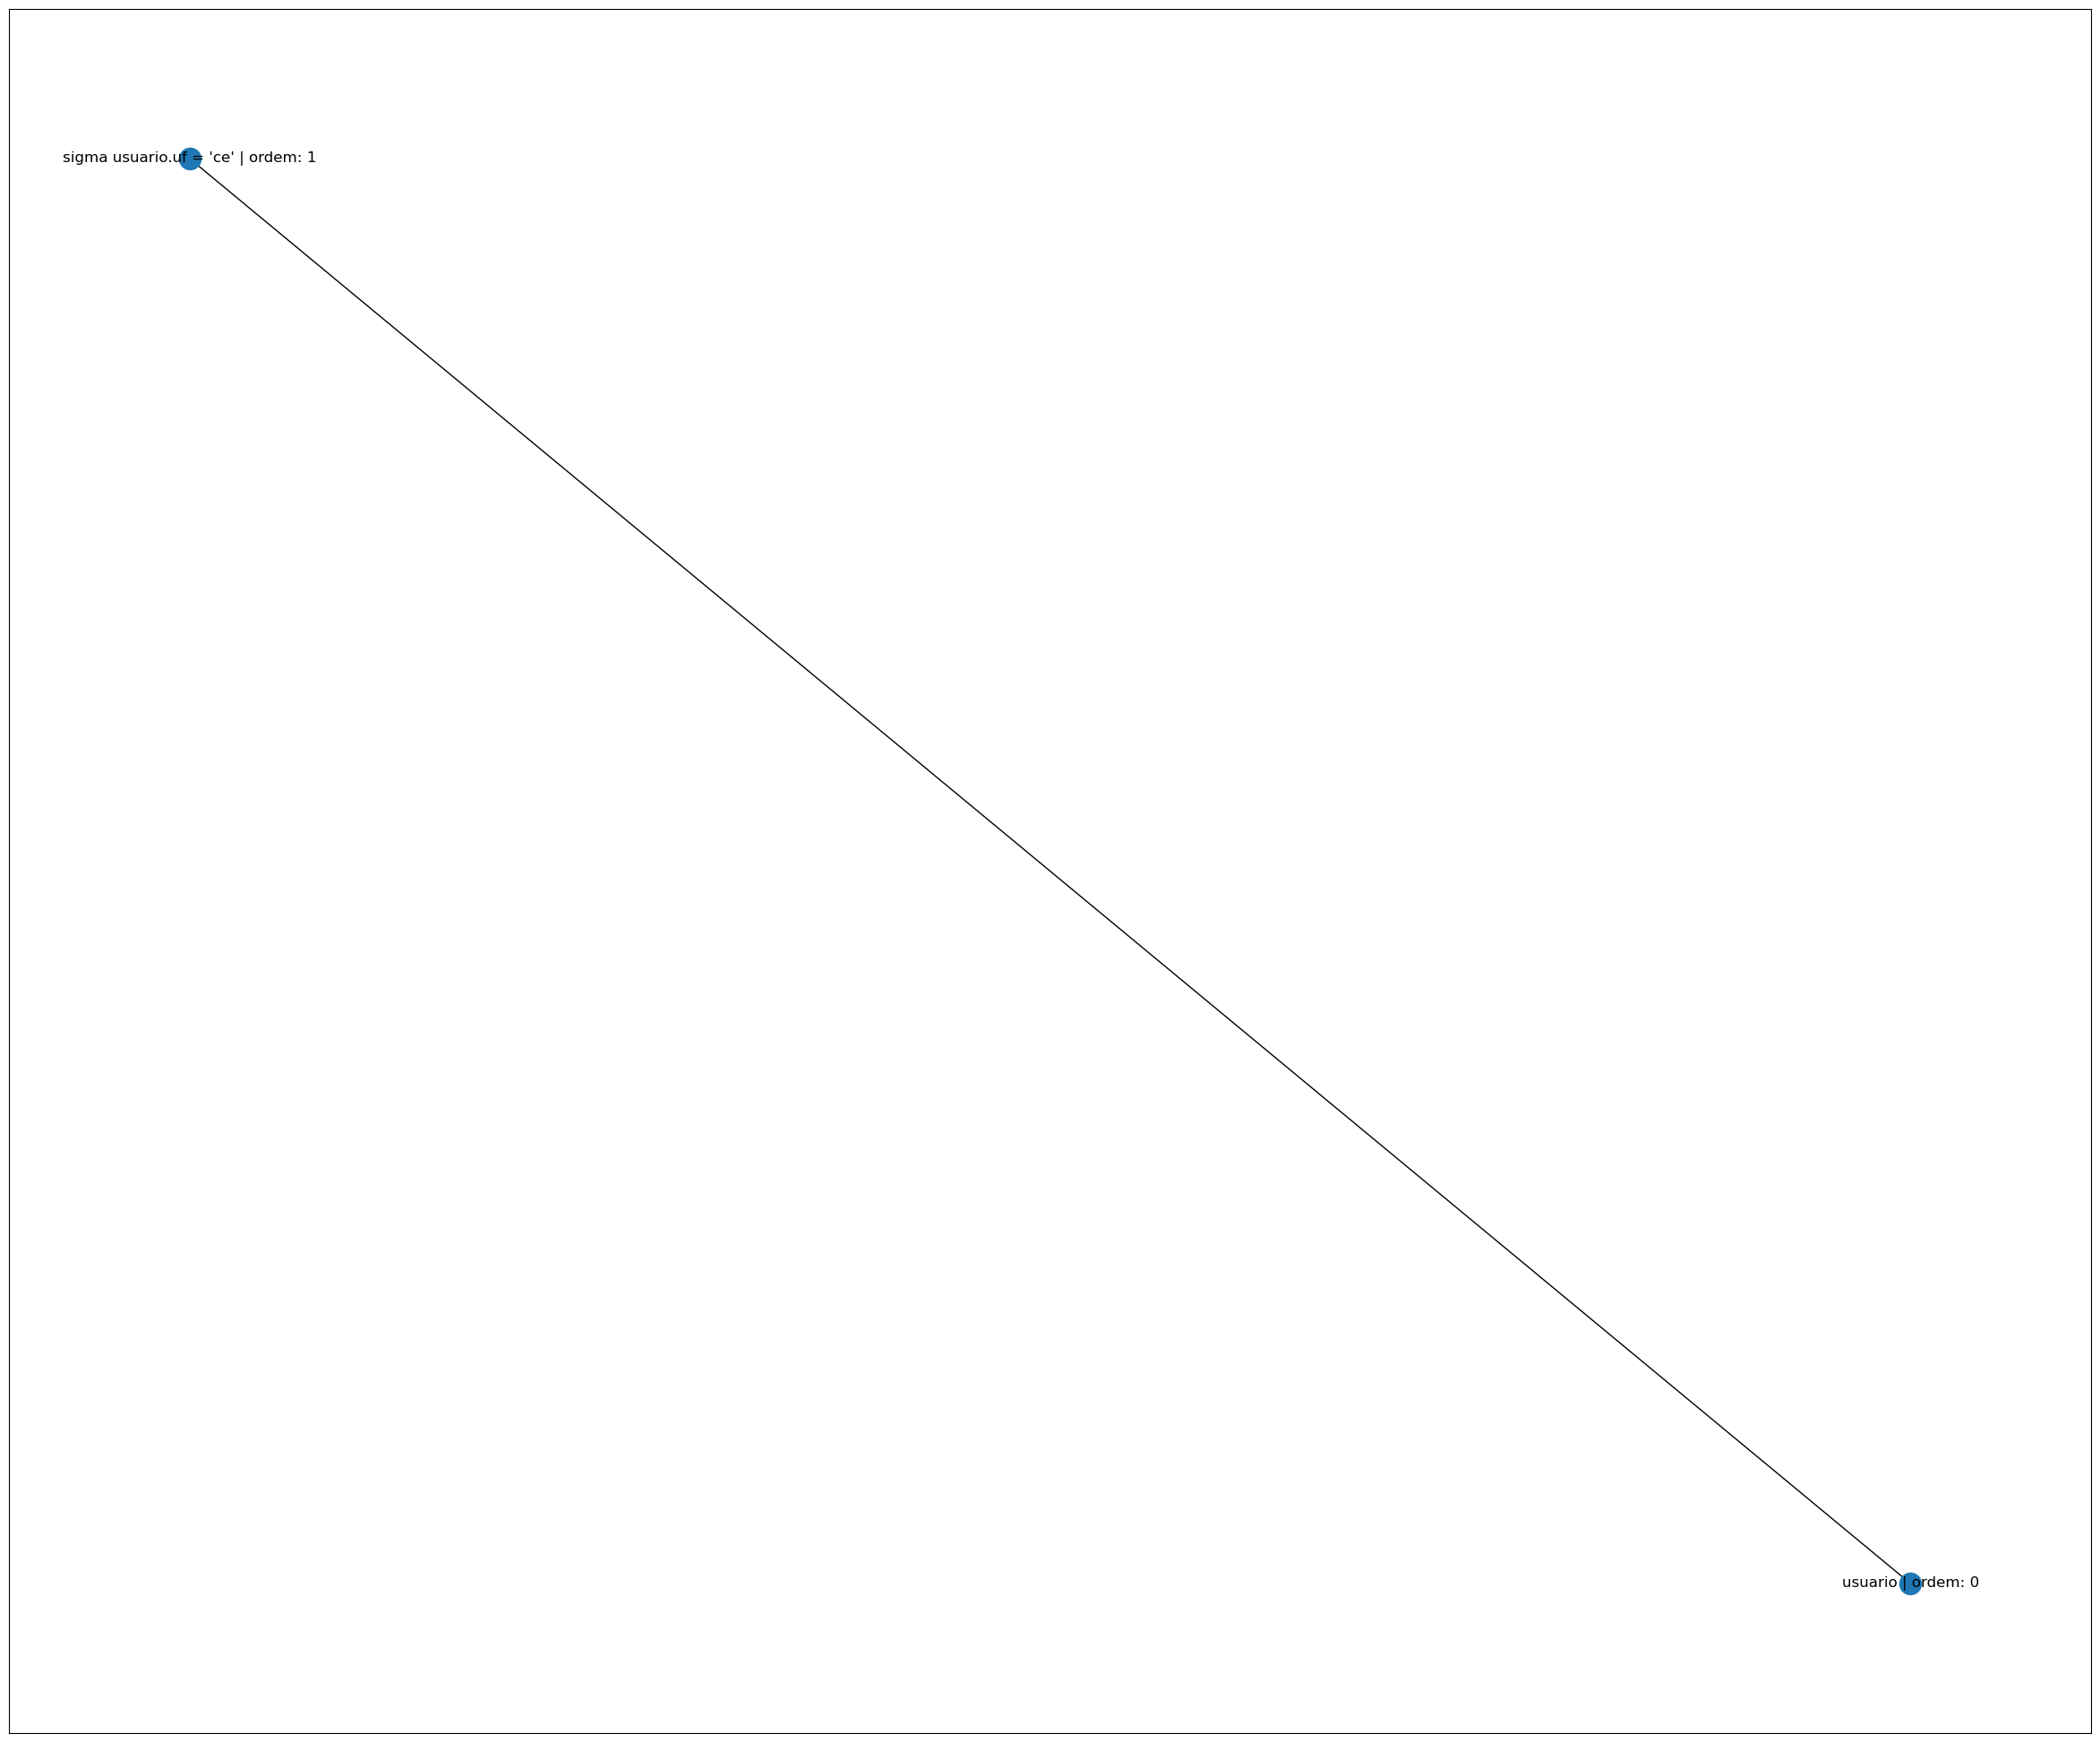

['contas', 'pi usuario_idusuario', 'usuario', "sigma usuario.uf = 'ce' join  on usuario.idusuario = contas.usuario_idusuario", 'pi idusuario', 'contas', 'pi usuario_idusuario', '|x| usuario.idusuario = contas.usuario_idusuario']


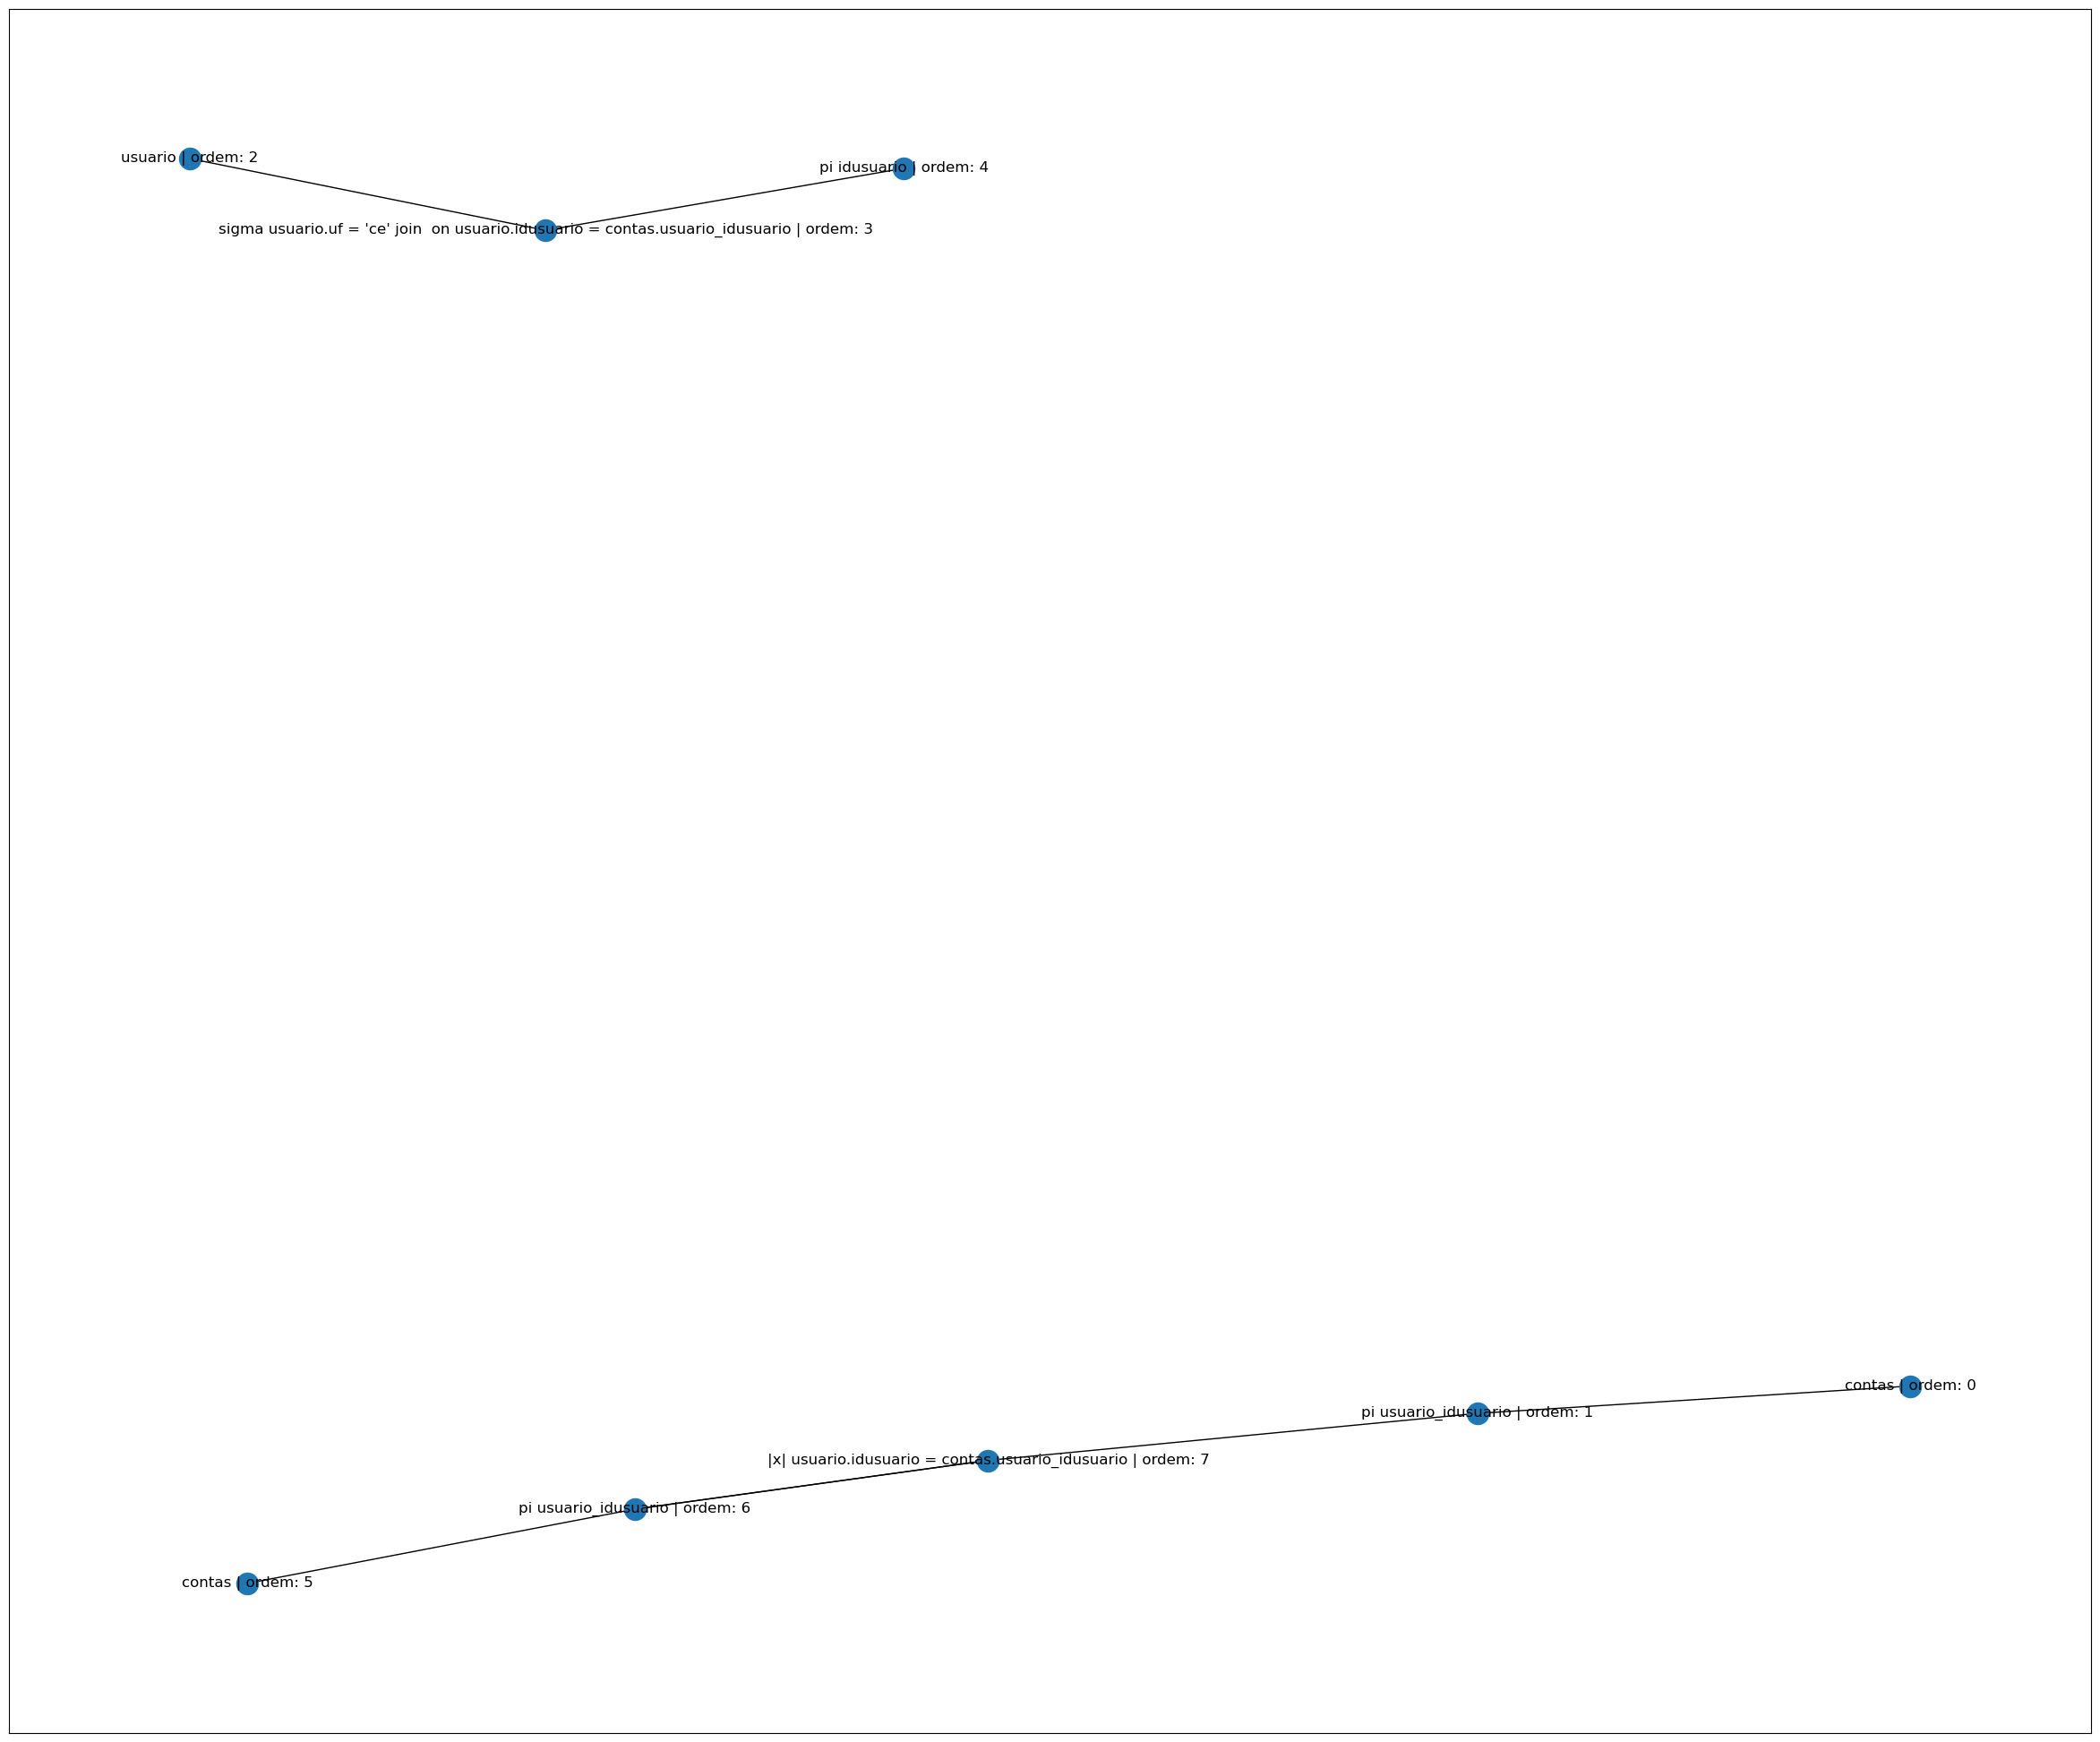

['contas', 'pi usuario_idusuario', 'usuario', "sigma usuario.uf = 'ce' join  on usuario.idusuario = contas.usuario_idusuario", 'pi idusuario', 'contas', 'pi usuario_idusuario', '|x| usuario.idusuario = contas.usuario_idusuario']


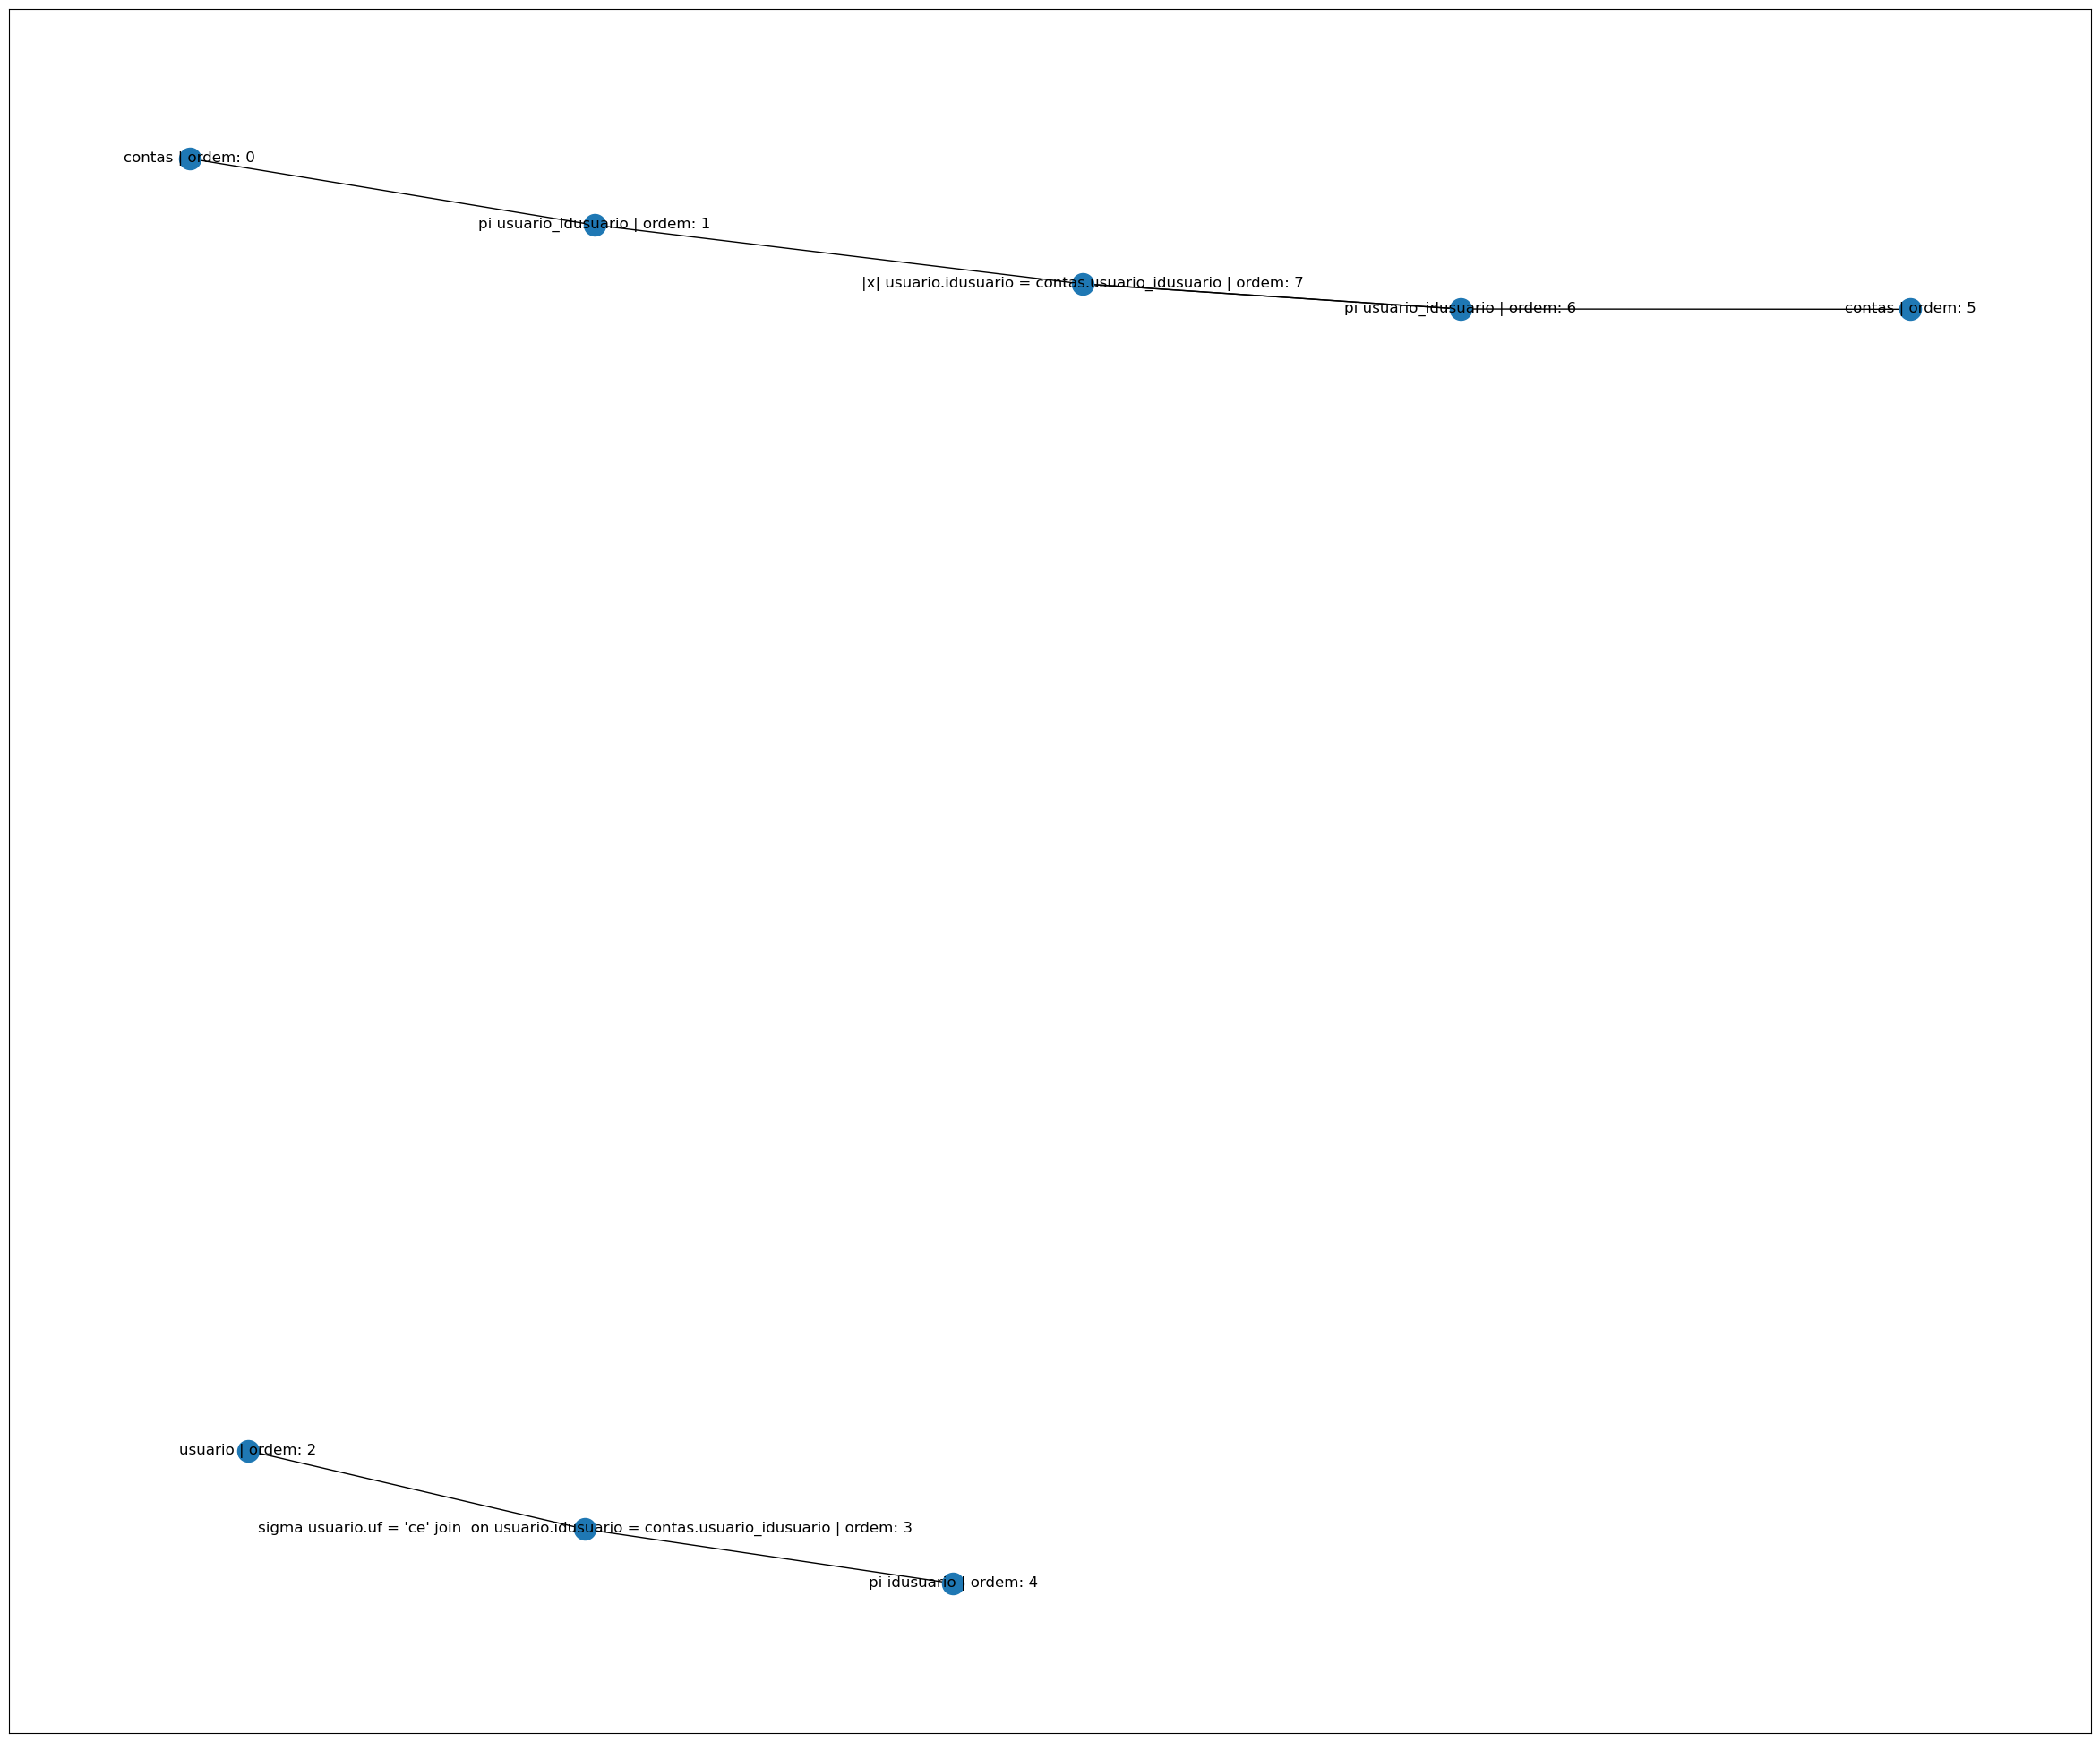

In [17]:
customtkinter.set_appearance_mode("dark")
customtkinter.set_default_color_theme("dark-blue")

root = customtkinter.CTk()
root.geometry("900x640")
root.title("Projeto de Banco de Dados")
    
frame = customtkinter.CTkFrame(master=root)
frame.pack(pady=20, padx=50, fill="both", expand=True)

# inicializar algumas variáveis para não dar erro
sql_sentence = customtkinter.StringVar(value="")
msg_error = customtkinter.StringVar(value="")


def buttonVerifySQL():
    msg = steps_execution(sql_sentence.get())
    msg_error.set(msg)
    
    

labelTitle = customtkinter.CTkLabel(master=frame, text="Projeto de Banco de Dados", font=customtkinter.CTkFont(size=20, weight="bold")).grid(row=1,column=2)

labelWhite = customtkinter.CTkLabel(master=frame, text=" ").grid(row=2,column=1)
labelWhite = customtkinter.CTkLabel(master=frame, text=" ").grid(row=3,column=1)
labelWhite = customtkinter.CTkLabel(master=frame, text=" ").grid(row=4,column=1)

labelTitle = customtkinter.CTkLabel(master=frame, text="SQL", font=customtkinter.CTkFont(size=16)).grid(row=5,column=1)
entryWordsPerPage = customtkinter.CTkEntry(master=frame, textvariable=sql_sentence, width=700).grid(row=5,column=2)
labelWhite = customtkinter.CTkLabel(master=frame, text=" ").grid(row=6,column=2)
buttonWordsPerPage = customtkinter.CTkButton(master=frame, text="Confirmar", command=buttonVerifySQL).grid(row=8,column=2)

labelTitle = customtkinter.CTkLabel(master=frame, text="", textvariable=msg_error ,font=customtkinter.CTkFont(size=16)).grid(row=10,column=2)


root.mainloop()
    